In [1970]:
import sys
sys.path.append('/private/home/qiantong/wav2letter_experiments/wav2letter/bindings/python')
print('\n'.join(sys.path))
print('-----')

/private/home/qiantong/notebook
/private/home/qiantong/.conda/envs/pip/lib/python37.zip
/private/home/qiantong/.conda/envs/pip/lib/python3.7
/private/home/qiantong/.conda/envs/pip/lib/python3.7/lib-dynload

/private/home/qiantong/.local/lib/python3.7/site-packages
/private/home/qiantong/.conda/envs/pip/lib/python3.7/site-packages
/private/home/qiantong/fl_org/flashlight_master/bindings/python
/private/home/qiantong/.conda/envs/pip/lib/python3.7/site-packages/IPython/extensions
/private/home/qiantong/.ipython
/private/home/qiantong/wav2letter_experiments/wav2letter/bindings/python
-----


In [1971]:
import numpy as np                                                             
import soundfile as sf
import os
import sys
import matplotlib.pyplot as plt
from multiprocessing import Pool

from wav2letter.feature import FeatureParams, Mfsc, Mfcc

ModuleNotFoundError: No module named 'soundfile'

In [3]:
f_8khz = '/checkpoint/vineelkpratap/hub05/audio/8KHz/000004465.flac'
f_16khz = '/checkpoint/vineelkpratap/hub05/audio/16KHz/000004465.flac'

data_8, samplerate = sf.read(f_8khz)                                            
print(len(data_8), samplerate)
data_16, samplerate = sf.read(f_16khz)                                            
print(len(data_16), samplerate)

4352 8000
8704 16000


In [56]:
params = FeatureParams()
# define parameters of the featurization
params.sampling_freq = 8000
params.low_freq_filterbank = 0
params.high_freq_filterbank = 4000
params.num_filterbank_chans = 20
params.num_cepstral_coeffs = 13
params.use_energy = False
params.zero_mean_frame = False
params.use_power = False
params.acc_window = 0
params.delta_window = 0
# apply MFSC featurization
mfsc = Mfsc(params)
features_8 = mfsc.apply(data_8)

In [57]:
params = FeatureParams()
# define parameters of the featurization
params.sampling_freq = 16000
params.low_freq_filterbank = 0
params.high_freq_filterbank = 4000
params.num_filterbank_chans = 20
params.num_cepstral_coeffs = 13
params.use_energy = False
params.zero_mean_frame = False
params.use_power = False
params.acc_window = 0
params.delta_window = 0
# apply MFSC featurization
mfsc = Mfsc(params)
features_16 = mfsc.apply(data_16)

In [58]:
print(len(features_8))
print(len(features_16))

1040
1040


In [61]:
for i in range(len(features_8)):
    if abs(features_16[i] - features_8[i]) / features_8[i] > 0.2:
        print(abs(features_16[i] - features_8[i]) / features_8[i])

0.3277767617639042
0.2616896932221692
0.33146067587533645
0.4919554992232651
0.32190095611647773
0.31541681466906585
0.2924551008719038
0.2653943802162424
0.232253737907191
0.2121559964834578
0.20309665782673642
0.22379699012901672
0.2179650363437767
0.26424438196159444
0.2359252236058313
0.354636235143502
0.2233804055040079
0.22509352681722142
0.2057067244524627
0.23480202333293215
0.2592284456800498
0.2706959714330252
0.2923307574514866
0.30160665613895077
0.26445757475473
0.2142074274650293
0.3135730619521251
0.2556317146332623
0.21937941917134865
0.25667715210469655
0.268402853344138


In [4]:
librispeech_dev_clean_list = '/private/home/qiantong/push_numbers/lists/dev-clean.lst'
librispeech_dev_other_list = '/private/home/qiantong/push_numbers/lists/dev-other.lst'
hub05_swbd_list = '/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst'
hub05_ch_list = '/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst'
rt03_list = '/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst'
cv_list = '/private/home/qiantong/tmp/commonvoice_dev.lst'
test_ads_list = '/private/home/qiantong/test_ads/test_ads/test_ads.lst'
test_pages_lst = '/private/home/qiantong/test_ads/test_ads/test_pages.lst'
test_liveAPI_lst = '/private/home/qiantong/test_ads/test_ads/test_liveAPI.lst'
test_userLive_lst = '/private/home/qiantong/test_ads/test_ads/test_userLive.lst'
test_userVOD_lst = '/private/home/qiantong/test_ads/test_ads/test_userVOD.lst'
nov92_list = '/checkpoint/qiantong/wsj/nov92.lst'
nov93_list = '/checkpoint/antares/datasets/wsj/lists/nov93dev.lst.fixed'
tedlium_dev_list = '/checkpoint/wav2letter/data/tedlium/lists/dev.lst.fixed'


In [20]:
raw_input_dict = {}
mfsc_dict = {}

In [6]:
lists = [librispeech_dev_clean_list, 
         librispeech_dev_other_list, 
         hub05_swbd_list, 
         hub05_ch_list, 
         rt03_list, 
         cv_list, 
         test_ads_list,
        test_pages_lst,
        test_liveAPI_lst,
        test_userLive_lst,
        test_userVOD_lst,
        nov92_list]
for l in lists:  
    ml = 0
    md = 0.
    
    with open(l) as f:
        for line in f:
            sp = line.split('\t')
            if len(sp) == 1:
                sp = line.split()
                trans = ' '.join(sp[3:]).strip()
            else:
                trans = sp[-1].strip()
            
            duration = float(sp[2])
            ml = max(ml, len(trans))
            md = max(md, duration)
            #print(sp, trans)
            #break
    print(l, ml, md)
    print('---')

/private/home/qiantong/push_numbers/lists/dev-clean.lst 516 32645.000000000004
---
/private/home/qiantong/push_numbers/lists/dev-other.lst 427 35155.0
---
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst 329 15610.0
---
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst 258 11720.0
---
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst 639 34590.0
---
/private/home/qiantong/tmp/commonvoice_dev.lst 186 66120.0
---
/private/home/qiantong/test_ads/test_ads/test_ads.lst 992 45090.0
---
/private/home/qiantong/test_ads/test_ads/test_pages.lst 1028 45080.0
---
/private/home/qiantong/test_ads/test_ads/test_liveAPI.lst 1002 45040.0
---
/private/home/qiantong/test_ads/test_ads/test_userLive.lst 949 45090.0
---
/private/home/qiantong/test_ads/test_ads/test_userVOD.lst 1033 45090.0
---
/checkpoint/qiantong/wsj/nov92.lst 194 14485.563
---


In [6]:
lists = [
    librispeech_dev_clean_list, 
    librispeech_dev_other_list, 
    hub05_swbd_list, 
    hub05_ch_list, 
    rt03_list, 
    cv_list, 
    nov93_list,
    tedlium_dev_list
]

raw_input_dict = {}
mfsc_dict = {}

def split_line(line):
    sp = line.strip().split('\t')
    if len(sp) == 4:
        return sp

    if len(sp) != 1:
        return []
    
    return line.strip().split()

for data_list in lists:    
    raw_input = []
    with open(data_list) as f:
        for line in f:
            sp = split_line(line)
            if len(sp) == 0:
                continue
            data, _ = sf.read(sp[1])                                            
            raw_input.append(data)

    raw_input_c = np.concatenate(raw_input)
    print(data_list)
    print(raw_input_c.shape)
    print(np.mean(raw_input_c), np.min(raw_input_c), np.max(raw_input_c), np.std(raw_input_c))
    raw_input_dict[data_list] = raw_input
    print('----')

/private/home/qiantong/push_numbers/lists/dev-clean.lst
(310337932,)
0.00013237358892177688 -0.999969482421875 0.9996337890625 0.06838094000312493
----
/private/home/qiantong/push_numbers/lists/dev-other.lst
(294980246,)
-0.00012309647695098327 -0.999969482421875 0.99993896484375 0.06441907586229689
----
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst
(120780928,)
-0.00034256141111811906 -1.0 0.999969482421875 0.038340325765792375
----
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst
(97533280,)
-0.00027419373075544703 -1.0 0.999969482421875 0.07371858508840648
----
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst
(357426912,)
-9.899306215470664e-05 -1.0 0.999969482421875 0.07475532611544154
----
/private/home/qiantong/tmp/commonvoice_dev.lst
(1560341049,)
-3.934445730880133e-06 -1.0 0.999969482421875 0.0983333870162432
----
/checkpoint/antares/datasets/wsj/lists/nov93dev.lst.fixed
(62588903,)
0.0002933624752002826 -0.

In [8]:
lists = [librispeech_dev_clean_list, librispeech_dev_other_list, hub05_swbd_list, hub05_ch_list, rt03_list, cv_list, test_ads_list]

for data_list in [test_ads_list]:    
    raw_input = []
        
    with open(data_list) as f:
        for line in f:
            try:
                sp = line.split('\t')
                data, _ = sf.read('/private/home/qiantong/test_ads/test_ads/' + sp[1])                                            
                raw_input.append(data)
            except:
                print(sp)

    raw_input_c = np.concatenate(raw_input)
    print(data_list)
    print(raw_input_c.shape)
    print(np.mean(raw_input_c), np.min(raw_input_c), np.max(raw_input_c), np.std(raw_input_c))
    raw_input_dict[data_list] = raw_input
    print('----')

['477647', '', '0.0', '\n']
['17065', '', '0.0', '\n']
['1265417', '', '0.0', '\n']
['927300', '', '0.0', '\n']
['1113804', '', '0.0', '\n']
/private/home/qiantong/test_ads/test_ads/test_ads.lst
(1380026928,)
0.00021015461265377224 -1.0 0.999969482421875 0.08834809393754708
----


In [55]:
params = FeatureParams()
# define parameters of the featurization
params.sampling_freq = 16000
params.low_freq_filterbank = 0
params.high_freq_filterbank = 8000
params.num_filterbank_chans = 80
params.num_cepstral_coeffs = 13
params.use_energy = False
params.zero_mean_frame = False
params.use_power = False
params.acc_window = 0
params.delta_window = 0
# apply MFSC featurization
mfsc = Mfsc(params)

for data_list in lists:
    print(data_list, flush=True)
    raw_input_c = np.concatenate(raw_input_dict[data_list])
    features = mfsc.apply(raw_input_c)
    mfsc_dict[data_list] = features


/private/home/qiantong/push_numbers/lists/dev-clean.lst
/private/home/qiantong/push_numbers/lists/dev-other.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst


MemoryError: std::bad_alloc

In [56]:
data_list = cv_list
raw_input_c = np.concatenate(raw_input_dict[data_list])[:361066112]
print(raw_input_c.shape)
features = mfsc.apply(raw_input_c)
mfsc_dict[data_list] = features

(361066112,)


In [57]:
raw_input_stat_dict = {}

for k, v in mfsc_dict.items():
    print(k)
    feat = np.array(v)
    nframes = len(v) // 80
    feat = feat.reshape(nframes, 80)
    mean_feat = np.mean(feat, 0)
    std_feat = np.std(feat, 0)
    raw_input_stat_dict[k] = {}
    raw_input_stat_dict[k]["mean"] = mean_feat
    raw_input_stat_dict[k]["std"] = std_feat
    print(mean_feat)
    print(std_feat)
    print('-----')

/private/home/qiantong/push_numbers/lists/dev-clean.lst
[4.66703461 4.98356702 5.15193257 5.75619255 5.87268761 6.22938523
 6.51011916 6.6986524  6.76275368 6.70665427 6.65055982 6.70590526
 6.84107148 6.98935707 7.09381178 7.15516392 7.17727623 7.21736822
 7.28557145 7.07812247 6.99964184 7.12744872 6.86989539 7.01114921
 6.88054171 7.0076577  6.89053942 6.99251339 7.00303867 7.00952755
 7.05916615 7.10226354 7.15001768 7.21333304 7.31460289 7.36822299
 7.43689409 7.5019141  7.61820828 7.59886144 7.67562454 7.67412418
 7.75697299 7.73595436 7.75322158 7.75814389 7.76356834 7.77849752
 7.79937511 7.83667643 7.90070784 7.9176715  8.00736577 8.06837666
 8.10687147 8.13171083 8.13499219 8.11198738 8.11988619 8.12501991
 8.16614591 8.14902541 8.11955234 8.07606293 8.02529401 7.98573268
 7.9824378  7.96266293 7.92935726 7.90147624 7.88826942 7.92133163
 7.94215451 7.96351796 7.95961319 7.95092591 7.92021719 7.84092562
 7.80558022 7.78836998]
[1.46813481 1.4765854  1.62031498 1.86217732 2.00

[3.66040179 4.04864815 4.33379843 5.20590944 5.36381256 5.60230809
 5.77244824 5.88824296 5.99130527 6.0514609  6.08215767 6.12841655
 6.18917667 6.25598385 6.30621627 6.32049191 6.30272418 6.30588255
 6.35384539 6.17497987 6.13918287 6.29695293 6.08026093 6.25348101
 6.153197   6.28028556 6.18536606 6.30370166 6.30326564 6.29786689
 6.32559781 6.36025531 6.39989148 6.45254777 6.51525313 6.58353128
 6.64647431 6.70643056 6.81518318 6.80095699 6.86542846 6.84291969
 6.90064699 6.8799121  6.91238732 6.95263567 7.0077041  7.05942422
 7.09166082 7.11075007 7.132715   7.09901724 7.12111374 7.12407298
 7.16833924 7.22676835 7.27715325 7.3080078  7.33342411 7.30786407
 7.31994716 7.29007803 7.27438642 7.27185929 7.27391956 7.2609276
 7.2534936  7.24849488 7.2485517  7.24970737 7.25811859 7.30684168
 7.33375067 7.35673919 7.35640523 7.31690267 7.23434507 7.0836548
 6.78035222 5.92373876]
[2.25945246 2.33402236 2.43306462 2.68898924 2.78699778 2.8066013
 2.82962897 2.85698792 2.89556728 2.91538

/private/home/qiantong/push_numbers/lists/dev-clean.lst
/private/home/qiantong/push_numbers/lists/dev-other.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst


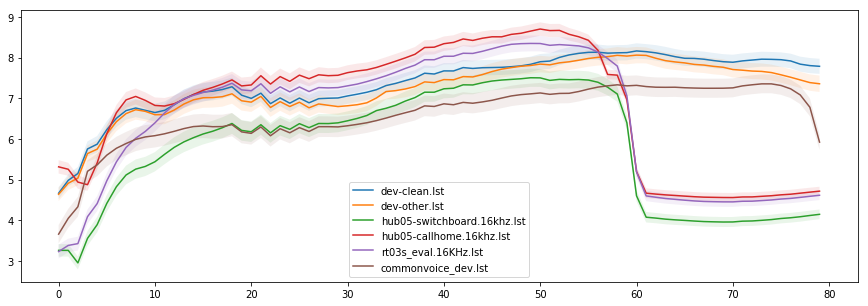

In [58]:
Coefficient = 0.1
fig, ax = plt.subplots(figsize=(15,5))

for k, v in raw_input_stat_dict.items():
    print(k)
    
    x = np.array(range(80))
    y = v["mean"]
    ax.plot(x, y, label=k.split('/')[-1])
    
    y_up = v["mean"] + Coefficient * v["std"]
    y_low = v["mean"] - Coefficient * v["std"]
    ax.fill_between(x, y_low, y_up, alpha=.1)
#     break
ax.legend()

In [59]:
new_mfsc_dict = {}

In [60]:
params = FeatureParams()
# define parameters of the featurization
params.sampling_freq = 16000
params.low_freq_filterbank = 0
params.high_freq_filterbank = 8000
params.num_filterbank_chans = 80
params.num_cepstral_coeffs = 13
params.use_energy = False
params.zero_mean_frame = False
params.use_power = False
params.acc_window = 0
params.delta_window = 0
# apply MFSC featurization
mfsc = Mfsc(params)

def gen_features(input):
    return mfsc.apply(input)

for data_list in lists:
    print(data_list, flush=True)
    p = Pool(40)
    features = p.map(gen_features, raw_input_dict[data_list][:4000])
    p.close()
    new_mfsc_dict[data_list] = features

/private/home/qiantong/push_numbers/lists/dev-clean.lst
/private/home/qiantong/push_numbers/lists/dev-other.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst


In [70]:
def gen_noram_features(value):
    feat = np.array(value)
    mean_feat = np.mean(feat)
    std_feat = np.std(feat)
    feat = (feat - mean_feat) / std_feat
    
    return feat

for k, v in new_mfsc_dict.items():
    print(k)
    p = Pool(40)
    normalized_feat = p.map(gen_noram_features, v)
    p.close()
    
    feat = np.concatenate(normalized_feat)
    nframes = len(feat) // 80
    feat = feat.reshape(nframes, 80)
    mean_feat = np.mean(feat, 0)
    std_feat = np.std(feat, 0)
    raw_input_stat_dict[k] = {}
    raw_input_stat_dict[k]["mean"] = mean_feat
    raw_input_stat_dict[k]["std"] = std_feat
    print(mean_feat)
    print(std_feat)
    print('-----')

/private/home/qiantong/push_numbers/lists/dev-clean.lst
[-1.37272824 -1.21429095 -1.13110217 -0.82532882 -0.76434998 -0.58157009
 -0.43751179 -0.34093364 -0.3089681  -0.33774299 -0.36553368 -0.3364439
 -0.2675169  -0.19243054 -0.14004147 -0.10848356 -0.09510622 -0.07331675
 -0.03921157 -0.1464227  -0.18805998 -0.12390243 -0.25597176 -0.18537936
 -0.25327651 -0.18791404 -0.24894913 -0.19806802 -0.19218302 -0.18826677
 -0.16377438 -0.14219697 -0.11828964 -0.08909209 -0.03867055 -0.00883318
  0.02659465  0.0599776   0.11911551  0.10839094  0.14645391  0.14508345
  0.1879261   0.17845133  0.18907048  0.19237618  0.19435224  0.20032078
  0.20880336  0.22688824  0.26044532  0.26997301  0.31651942  0.34806551
  0.36726177  0.37924755  0.38023931  0.36897442  0.3745084   0.37802742
  0.39960747  0.3910302   0.37814349  0.35656369  0.33123336  0.31264486
  0.31229435  0.3029406   0.28543421  0.26992626  0.26246726  0.27935017
  0.29059292  0.30185265  0.30037669  0.2964843   0.28227017  0.24251

[-1.3215022  -1.13732045 -1.00372854 -0.60423767 -0.54220235 -0.43896447
 -0.36710922 -0.31824718 -0.27185723 -0.24499924 -0.2327542  -0.21177517
 -0.18198207 -0.15049767 -0.1276415  -0.1223993  -0.13131629 -0.13023658
 -0.10839739 -0.19189419 -0.20857042 -0.13529793 -0.23633176 -0.15446714
 -0.2001304  -0.14021673 -0.18444519 -0.12867225 -0.12901245 -0.13198164
 -0.11954702 -0.1030985  -0.08533608 -0.06220047 -0.03433064 -0.00435026
  0.02359221  0.04991782  0.09908704  0.09178868  0.12156808  0.11035396
  0.13764102  0.12722814  0.14115551  0.15887737  0.18335569  0.20622357
  0.22008953  0.2283424   0.23775318  0.22099887  0.23146415  0.23289349
  0.25223793  0.279376    0.30236561  0.31619789  0.32728455  0.31504162
  0.3211061   0.30722601  0.30051496  0.29995861  0.3014277   0.29593063
  0.29337919  0.29215535  0.29269339  0.29340287  0.29825684  0.32184596
  0.33470977  0.34524722  0.34571575  0.32903142  0.29467754  0.2309708
  0.09721181 -0.31324446]
[0.85602986 0.86213841 0.9

/private/home/qiantong/push_numbers/lists/dev-clean.lst
/private/home/qiantong/push_numbers/lists/dev-other.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst


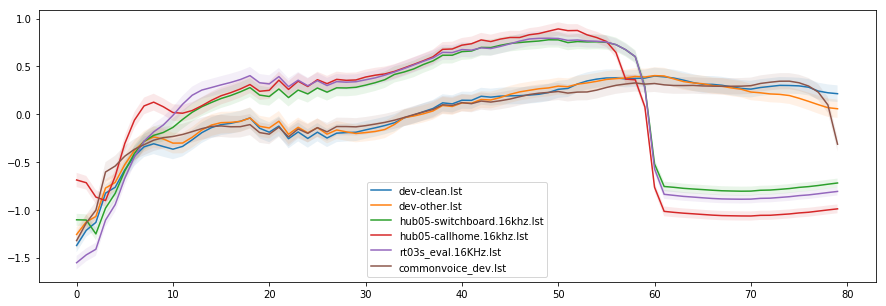

In [71]:
Coefficient = 0.1
fig, ax = plt.subplots(figsize=(15,5))

for k, v in raw_input_stat_dict.items():
    print(k)
    
    x = np.array(range(80))
    y = v["mean"]
    ax.plot(x, y, label=k.split('/')[-1])
    
    y_up = v["mean"] + Coefficient * v["std"]
    y_low = v["mean"] - Coefficient * v["std"]
    ax.fill_between(x, y_low, y_up, alpha=.1)
#     break
ax.legend()

In [19]:
new_mfsc_dict = {}
raw_input_stat_dict = {}

params = FeatureParams()
# define parameters of the featurization
params.sampling_freq = 16000
params.low_freq_filterbank = 0
params.high_freq_filterbank = 8000
params.num_filterbank_chans = 80
params.num_cepstral_coeffs = 13
params.use_energy = False
params.zero_mean_frame = False
params.use_power = False
params.acc_window = 0
params.delta_window = 0
# apply MFSC featurization
mfsc = Mfsc(params)

def gen_features(input):
    return mfsc.apply(input)

def gen_noram_features(value):
    feat = np.array(value)
    mean_feat = np.mean(feat)
    std_feat = np.std(feat)
    feat = (feat - mean_feat) / std_feat
    
    return feat

for data_list in lists:
    print(data_list, flush=True)
    p = Pool(40)
    features = p.map(gen_features, raw_input_dict[data_list][:4000])
    p.close()
    new_mfsc_dict[data_list] = features
    
for k, v in new_mfsc_dict.items():
    print(k)
    p = Pool(40)
    normalized_feat = p.map(gen_noram_features, v)
    p.close()
    
    feat = np.concatenate(normalized_feat)
    nframes = len(feat) // 80
    feat = feat.reshape(nframes, 80)
    mean_feat = np.mean(feat, 0)
    std_feat = np.std(feat, 0)
    raw_input_stat_dict[k] = {}
    raw_input_stat_dict[k]["mean"] = mean_feat
    raw_input_stat_dict[k]["std"] = std_feat
    print(mean_feat)
    print(std_feat)
    print('-----')

/private/home/qiantong/push_numbers/lists/dev-clean.lst
/private/home/qiantong/push_numbers/lists/dev-other.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst
/checkpoint/antares/datasets/wsj/lists/nov93dev.lst.fixed
/checkpoint/wav2letter/data/tedlium/lists/dev.lst.fixed
/private/home/qiantong/push_numbers/lists/dev-clean.lst
[-1.37272824 -1.21429095 -1.13110217 -0.82532882 -0.76434998 -0.58157009
 -0.43751179 -0.34093364 -0.3089681  -0.33774299 -0.36553368 -0.3364439
 -0.2675169  -0.19243054 -0.14004147 -0.10848356 -0.09510622 -0.07331675
 -0.03921157 -0.1464227  -0.18805998 -0.12390243 -0.25597176 -0.18537936
 -0.25327651 -0.18791404 -0.24894913 -0.19806802 -0.19218302 -0.18826677
 -0.16377438 -0.14219697 -0.11828964 -0.08909209 -0.03867055 -0.00883318
  0.02659465  0.0599

[-1.55431472 -1.47162712 -1.41208507 -1.10415576 -0.94212567 -0.66623348
 -0.44178221 -0.27670334 -0.17902581 -0.10696517 -0.00621906  0.11046859
  0.20422984  0.25838729  0.28558267  0.31286343  0.33740199  0.36729739
  0.40777017  0.33242678  0.32001295  0.39606383  0.28894193  0.35658414
  0.29770242  0.35055869  0.29969891  0.34005927  0.33411995  0.33865351
  0.35959346  0.37961034  0.40816774  0.44078429  0.47762083  0.51479636
  0.55309095  0.58793981  0.64605738  0.64373749  0.67464457  0.66852616
  0.6925363   0.68577454  0.70863605  0.73629044  0.76547359  0.78773059
  0.79425006  0.79512746  0.79209629  0.77173431  0.77640614  0.76781845
  0.76547759  0.75759062  0.72973766  0.67700497  0.60392168  0.27574658
 -0.5731805  -0.84100163 -0.85214498 -0.86317707 -0.87039265 -0.8781283
 -0.8852181  -0.89003642 -0.89194255 -0.8930589  -0.89215723 -0.88425337
 -0.88236147 -0.87481307 -0.86706572 -0.85596422 -0.84826379 -0.83643864
 -0.8239161  -0.8119943 ]
[0.70319272 0.67626762 0.6

/private/home/qiantong/push_numbers/lists/dev-clean.lst
[-1.37272824 -1.21429095 -1.13110217 -0.82532882 -0.76434998 -0.58157009
 -0.43751179 -0.34093364 -0.3089681  -0.33774299 -0.36553368 -0.3364439
 -0.2675169  -0.19243054 -0.14004147 -0.10848356 -0.09510622 -0.07331675
 -0.03921157 -0.1464227  -0.18805998 -0.12390243 -0.25597176 -0.18537936
 -0.25327651 -0.18791404 -0.24894913 -0.19806802 -0.19218302 -0.18826677
 -0.16377438 -0.14219697 -0.11828964 -0.08909209 -0.03867055 -0.00883318
  0.02659465  0.0599776   0.11911551  0.10839094  0.14645391  0.14508345
  0.1879261   0.17845133  0.18907048  0.19237618  0.19435224  0.20032078
  0.20880336  0.22688824  0.26044532  0.26997301  0.31651942  0.34806551
  0.36726177  0.37924755  0.38023931  0.36897442  0.3745084   0.37802742
  0.39960747  0.3910302   0.37814349  0.35656369  0.33123336  0.31264486
  0.31229435  0.3029406   0.28543421  0.26992626  0.26246726  0.27935017
  0.29059292  0.30185265  0.30037669  0.2964843   0.28227017  0.24251

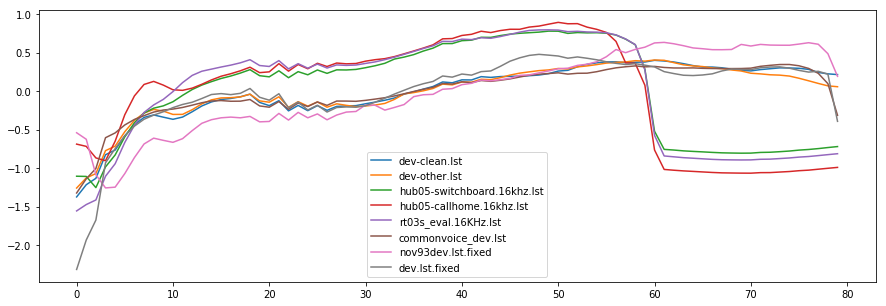

In [20]:
Coefficient = 0.0
fig, ax = plt.subplots(figsize=(15,5))

for k in lists:
    print(k)
    v = raw_input_stat_dict[k]
    x = np.array(range(80))
    y = v["mean"]
    ax.plot(x, y, label=k.split('/')[-1])
    
    y_up = v["mean"] + Coefficient * v["std"]
    y_low = v["mean"] - Coefficient * v["std"]
    ax.fill_between(x, y_low, y_up, alpha=.1)
    print(v["mean"])
#     break
ax.legend()

In [22]:
for k in lists:
    print('\n ---------- ' + k)
    v = raw_input_stat_dict[k]
    for i in range(80):
        print('({}, {})'.format(i, v["mean"][i]), end=' ')
        


 ---------- /private/home/qiantong/push_numbers/lists/dev-clean.lst
(0, -1.3727282387676452) (1, -1.214290952320733) (2, -1.13110217352635) (3, -0.8253288230304632) (4, -0.7643499844574788) (5, -0.5815700948183554) (6, -0.4375117934540398) (7, -0.34093363854698955) (8, -0.30896809601760833) (9, -0.33774299100526445) (10, -0.365533681470235) (11, -0.33644389593685653) (12, -0.2675168979020182) (13, -0.1924305357476732) (14, -0.14004147428499858) (15, -0.10848355659626575) (16, -0.09510622078885476) (17, -0.07331674516758517) (18, -0.03921157150273221) (19, -0.14642270456329207) (20, -0.18805998318846612) (21, -0.12390242887996647) (22, -0.25597175876253514) (23, -0.18537936388194445) (24, -0.2532765103800438) (25, -0.187914042537995) (26, -0.24894913478450822) (27, -0.19806801584405864) (28, -0.1921830185428998) (29, -0.18826677027549135) (30, -0.16377438155051946) (31, -0.14219696574798515) (32, -0.11828963591995505) (33, -0.0890920870498098) (34, -0.03867055486828224) (35, -0.0088331

In [10]:
new_mfsc_dict = {}
raw_input_stat_dict = {}

params = FeatureParams()
# define parameters of the featurization
params.sampling_freq = 16000
params.low_freq_filterbank = 0
params.high_freq_filterbank = 4000
params.num_filterbank_chans = 80
params.num_cepstral_coeffs = 13
params.use_energy = False
params.zero_mean_frame = False
params.use_power = False
params.acc_window = 0
params.delta_window = 0
# apply MFSC featurization
mfsc = Mfsc(params)

def gen_features(input):
    return mfsc.apply(input)

def gen_noram_features(value):
    feat = np.array(value)
    mean_feat = np.mean(feat)
    std_feat = np.std(feat)
    feat = (feat - mean_feat) / std_feat
    
    return feat

for data_list in lists:
    print(data_list, flush=True)
    p = Pool(40)
    features = p.map(gen_features, raw_input_dict[data_list][:4000])
    p.close()
    new_mfsc_dict[data_list] = features
    
for k, v in new_mfsc_dict.items():
    print(k)
    p = Pool(40)
    normalized_feat = p.map(gen_noram_features, v)
    p.close()
    
    feat = np.concatenate(normalized_feat)
    nframes = len(feat) // 80
    feat = feat.reshape(nframes, 80)
    mean_feat = np.mean(feat, 0)
    std_feat = np.std(feat, 0)
    raw_input_stat_dict[k] = {}
    raw_input_stat_dict[k]["mean"] = mean_feat
    raw_input_stat_dict[k]["std"] = std_feat
    print(mean_feat)
    print(std_feat)
    print('-----')

/private/home/qiantong/push_numbers/lists/dev-clean.lst
/private/home/qiantong/push_numbers/lists/dev-other.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst
/checkpoint/antares/datasets/wsj/lists/nov93dev.lst.fixed
/checkpoint/wav2letter/data/tedlium/lists/dev.lst.fixed
/private/home/qiantong/push_numbers/lists/dev-clean.lst
[-1.75306831e+00 -8.82842424e-01 -1.17458716e+00 -9.02602581e-01
 -7.17387140e-01 -9.98989169e-01 -3.45782642e-01 -6.01500018e-01
 -4.67893582e-01 -1.10392163e-01 -3.14249430e-01 -2.94011467e-01
 -7.38439244e-02 -3.42604413e-01 -2.62634612e-01 -2.85701940e-01
 -7.57691905e-02 -1.55566079e-01 -6.89256288e-02 -2.23503424e-02
 -6.57746131e-04  2.63345876e-03  1.21062236e-02  3.37890805e-02
 -6.66413602e-03 -1.15060083e-02 -3.18361106e-02 -6.36189469e-02
 -

[-2.27212232 -1.55938994 -1.87425563 -1.63803751 -1.42173208 -1.66664776
 -0.96543315 -1.03252402 -0.91129885 -0.4773574  -0.60309026 -0.56740868
 -0.27349666 -0.38291987 -0.26246466 -0.22471691  0.01054885 -0.070499
 -0.0047809   0.02708992  0.04478902  0.05880014  0.07861881  0.10551154
  0.0756999   0.08202764  0.0782693   0.07248455  0.06557398  0.06728858
  0.08052583  0.05405787  0.05100717  0.04919515  0.0475684   0.0601318
  0.09686493  0.03793218  0.04007603  0.13025056  0.06676436  0.10424369
  0.14727894  0.12563111  0.20114941  0.18819814  0.23431308  0.27632131
  0.27786781  0.33005137  0.36632438  0.37115097  0.3946274   0.40693141
  0.41486554  0.41950369  0.42153815  0.42843067  0.44152903  0.45653654
  0.47531422  0.50402096  0.53107677  0.5235083   0.54710752  0.53403362
  0.5386653   0.51268596  0.53109876  0.51134767  0.50855974  0.51074332
  0.50984946  0.50379736  0.48642569  0.45320476  0.40731329  0.35181402
  0.1901776  -0.41013785]
[0.67321087 0.73189133 0.700

/private/home/qiantong/push_numbers/lists/dev-clean.lst
[-1.75306831e+00 -8.82842424e-01 -1.17458716e+00 -9.02602581e-01
 -7.17387140e-01 -9.98989169e-01 -3.45782642e-01 -6.01500018e-01
 -4.67893582e-01 -1.10392163e-01 -3.14249430e-01 -2.94011467e-01
 -7.38439244e-02 -3.42604413e-01 -2.62634612e-01 -2.85701940e-01
 -7.57691905e-02 -1.55566079e-01 -6.89256288e-02 -2.23503424e-02
 -6.57746131e-04  2.63345876e-03  1.21062236e-02  3.37890805e-02
 -6.66413602e-03 -1.15060083e-02 -3.18361106e-02 -6.36189469e-02
 -8.61575487e-02 -8.87799205e-02 -8.09434901e-02 -1.15511426e-01
 -1.16699735e-01 -1.14235314e-01 -1.15382505e-01 -1.05954948e-01
 -6.09049366e-02 -1.12910555e-01 -1.08255291e-01 -1.31766842e-02
 -8.11436668e-02 -4.05906852e-02  3.41972877e-03 -3.00689734e-02
  4.66406591e-02  4.17746304e-02  8.83619238e-02  1.20589213e-01
  1.19716981e-01  1.72476332e-01  2.06721400e-01  2.05431665e-01
  2.26001485e-01  2.40796949e-01  2.52865060e-01  2.64774873e-01
  2.80075358e-01  2.86612118e-01  

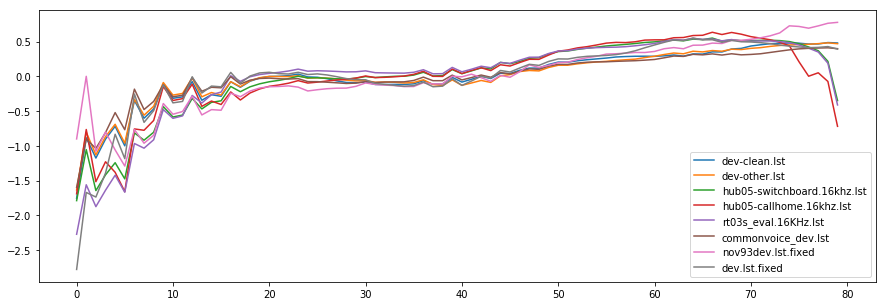

In [13]:
Coefficient = 0.0
fig, ax = plt.subplots(figsize=(15,5))

for k in lists:
    print(k)
    v = raw_input_stat_dict[k]
    x = np.array(range(80))
    y = v["mean"]
    ax.plot(x, y, label=k.split('/')[-1])
    
    y_up = v["mean"] + Coefficient * v["std"]
    y_low = v["mean"] - Coefficient * v["std"]
    ax.fill_between(x, y_low, y_up, alpha=.1)
    print(v["mean"])
#     break
ax.legend()

In [18]:
for k in lists:
    print(' ---------- ' + k)
    v = raw_input_stat_dict[k]
    for i in range(80):
        print('({}, {})'.format(i, v["mean"][i]))

 ---------- /private/home/qiantong/push_numbers/lists/dev-clean.lst
(0, -1.7530683145962103)
(1, -0.8828424241979276)
(2, -1.1745871629639175)
(3, -0.9026025806296399)
(4, -0.7173871403910053)
(5, -0.9989891689311081)
(6, -0.34578264229507194)
(7, -0.6015000176369922)
(8, -0.46789358199761855)
(9, -0.11039216252547754)
(10, -0.3142494297032034)
(11, -0.29401146701469816)
(12, -0.07384392437728676)
(13, -0.3426044132658229)
(14, -0.26263461160451845)
(15, -0.2857019399509667)
(16, -0.0757691904648168)
(17, -0.15556607899622354)
(18, -0.06892562875716324)
(19, -0.02235034239787889)
(20, -0.0006577461307447292)
(21, 0.0026334587583916004)
(22, 0.012106223609334204)
(23, 0.033789080503864394)
(24, -0.006664136020921868)
(25, -0.011506008300697307)
(26, -0.03183611056974107)
(27, -0.06361894685920876)
(28, -0.08615754873375438)
(29, -0.08877992050351945)
(30, -0.08094349006445198)
(31, -0.11551142604925346)
(32, -0.11669973474509922)
(33, -0.11423531445234748)
(34, -0.11538250478042268)
(35

In [28]:
mfcc_dict = {}
raw_input_stat_dict = {}

params = FeatureParams()
# define parameters of the featurization
params.sampling_freq = 16000
params.low_freq_filterbank = 0
params.high_freq_filterbank = 4000
params.num_filterbank_chans = 80
params.num_cepstral_coeffs = 80
params.use_energy = False
params.zero_mean_frame = False
params.use_power = False
params.acc_window = 0
params.delta_window = 0
# apply MFSC featurization
mfcc = Mfcc(params)

def gen_features(input):
    return mfcc.apply(input)

def gen_noram_features(value):
    feat = np.array(value)
    mean_feat = np.mean(feat)
    std_feat = np.std(feat)
    feat = (feat - mean_feat) / std_feat
    
    return feat

for data_list in lists:
    print(data_list, flush=True)
    p = Pool(40)
    features = p.map(gen_features, raw_input_dict[data_list][:4000])
    p.close()
    mfcc_dict[data_list] = features
    
for k, v in mfcc_dict.items():
    print(k)
    p = Pool(40)
    normalized_feat = p.map(gen_noram_features, v)
    p.close()
    
    feat = np.concatenate(normalized_feat)
    nframes = len(feat) // 80
    feat = feat.reshape(nframes, 80)
    mean_feat = np.mean(feat, 0)
    std_feat = np.std(feat, 0)
    raw_input_stat_dict[k] = {}
    raw_input_stat_dict[k]["mean"] = mean_feat
    raw_input_stat_dict[k]["std"] = std_feat
    print(mean_feat)
    print(std_feat)
    print('-----')

/private/home/qiantong/push_numbers/lists/dev-clean.lst
/private/home/qiantong/push_numbers/lists/dev-other.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst
/checkpoint/qiantong/wsj/nov92.lst
/private/home/qiantong/push_numbers/lists/dev-clean.lst
[ 6.67854605e+00 -1.13994865e+00 -2.53326212e-01 -8.28932420e-01
 -1.02532917e+00 -9.64135055e-01 -3.65670940e-01 -4.46657743e-01
 -5.50636564e-01 -4.37605342e-01 -6.30475993e-01 -4.33231925e-01
 -3.32162421e-01 -9.80149022e-02 -2.37868530e-02  1.98410717e-02
  4.34731086e-02  1.97745102e-02  1.31260415e-03 -1.70991617e-02
 -4.36194984e-03  3.51113182e-03  3.47178724e-02  6.21020515e-02
  8.43793840e-02  9.82974021e-02  9.95220905e-02  1.08813910e-01
  1.10004892e-01  1.49804783e-01  1.65166935e-01  1.54657707e-01
  1.69697513e-01

[ 6.34697949 -1.66025277 -1.33422544 -1.28036104 -2.21004009 -0.96101091
 -1.16666683 -0.19229569 -0.9153752   0.08101472 -0.53510385  0.09995617
 -0.40172088  0.34388697 -0.29282818  0.40483444 -0.11041345  0.3199088
 -0.01328126  0.22026934  0.01147208  0.13335826  0.0681124   0.09063731
  0.1604821   0.08190532  0.22257392  0.05169161  0.26483045  0.06160524
  0.33186972  0.06328229  0.34163936  0.10091443  0.35699293  0.06158176
  0.2571091   0.04576795  0.23261416  0.07053632  0.18162449  0.0891915
  0.14609134  0.09862302  0.07404283  0.09084701  0.02910089  0.14145734
  0.09802161  0.24007706  0.05473049  0.14318571 -0.04674207  0.04104045
 -0.20212679 -0.21697912 -0.3491464  -0.18350933 -0.34294368 -0.29176613
 -0.26739443 -0.09011192 -0.12209945 -0.02523288  0.02967367  0.09422827
  0.08845573  0.09123303  0.08315082  0.06361591  0.09757258  0.10845563
  0.10933675  0.09168324  0.07878508  0.01087828  0.00674758 -0.03616368
  0.01670881  0.02340573]
[1.5550645  0.80266034 1.01

/private/home/qiantong/push_numbers/lists/dev-clean.lst
/private/home/qiantong/push_numbers/lists/dev-other.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.16khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.16KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst
/checkpoint/qiantong/wsj/nov92.lst


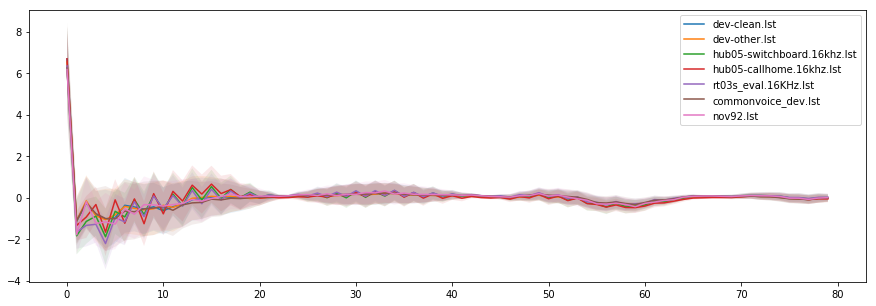

In [30]:
Coefficient = 1
fig, ax = plt.subplots(figsize=(15,5))

for k in lists:
    print(k)
    v = raw_input_stat_dict[k]
    x = np.array(range(80))
    y = v["mean"]
    ax.plot(x, y, label=k.split('/')[-1])
    
    y_up = v["mean"] + Coefficient * v["std"]
    y_low = v["mean"] - Coefficient * v["std"]
    ax.fill_between(x, y_low, y_up, alpha=.1)
#     break
ax.legend()

In [79]:
new_mfsc_dict = {}

params = FeatureParams()
# define parameters of the featurization
params.sampling_freq = 16000
params.low_freq_filterbank = 0
params.high_freq_filterbank = 4000
params.num_filterbank_chans = 40
params.num_cepstral_coeffs = 13
params.use_energy = False
params.zero_mean_frame = False
params.use_power = False
params.acc_window = 2
params.delta_window = 2
# apply MFSC featurization
mfsc = Mfsc(params)

def gen_features(input):
    return mfsc.apply(input)

for data_list in lists:
    print(data_list, flush=True)
    p = Pool(40)
    features = p.map(gen_features, raw_input_dict[data_list][:4000])
    p.close()
    new_mfsc_dict[data_list] = features
    
for k, v in new_mfsc_dict.items():
    feat = np.concatenate(v)
    nframes = len(feat) // 120
    feat = feat.reshape(nframes, 120)
    mean_feat = np.mean(feat, 0)
    std_feat = np.std(feat, 0)
    raw_input_stat_dict[k] = {}
    raw_input_stat_dict[k]["mean"] = mean_feat
    raw_input_stat_dict[k]["std"] = std_feat
    print(mean_feat)
    print(std_feat)
    print('-----')

/private/home/qiantong/push_numbers/lists/dev-clean.lst.ds
/private/home/qiantong/push_numbers/lists/dev-other.lst.ds
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.8khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.8khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.8KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst.ds
[ 5.02871110e+00  5.15843824e+00  5.37998735e+00  5.61278842e+00
  6.06370721e+00  6.42023748e+00  6.57363308e+00  6.95258571e+00
  7.19687516e+00  7.42965121e+00  7.54517121e+00  7.45084518e+00
  7.49439720e+00  7.60762189e+00  7.79502867e+00  7.95334828e+00
  8.14268663e+00  8.18791264e+00  8.27754824e+00  8.30321566e+00
  8.32248552e+00  8.23510278e+00  8.17586862e+00  8.17507797e+00
  8.15821674e+00  8.13985007e+00  8.18703144e+00  8.19359691e+00
  8.23528719e+00  8.28981133e+00  8.35030789e+00  8.40475240e+00
  8.47762104e+00  8.58375753e+00  8.68192497e+00  8.79048461e+00
  8.88745722e+00  8.96267924e+00  9.

[ 6.00566415e+00  5.79400381e+00  5.19139692e+00  4.69824320e+00
  5.21462766e+00  5.72721057e+00  6.26096899e+00  7.08922933e+00
  7.55776202e+00  7.80780975e+00  7.87499825e+00  7.70180291e+00
  7.69306240e+00  7.74144789e+00  7.81483446e+00  7.92775207e+00
  8.15912730e+00  8.26676493e+00  8.40950983e+00  8.46524134e+00
  8.51217122e+00  8.52788640e+00  8.60205916e+00  8.66902223e+00
  8.70305037e+00  8.70141168e+00  8.77822707e+00  8.82013874e+00
  8.83138840e+00  8.86583707e+00  8.94332349e+00  8.99834923e+00
  9.04997570e+00  9.14180880e+00  9.24585571e+00  9.36915142e+00
  9.50315669e+00  9.63224370e+00  9.69686956e+00  9.77606515e+00
  6.04194707e-06  6.62405872e-04  1.14633533e-03  1.26929593e-03
  1.50362218e-03  1.84851171e-03  2.00410143e-03  2.13814216e-03
  2.08073526e-03  2.09967827e-03  2.00928857e-03  2.56055642e-03
  2.40069580e-03  2.12437616e-03  1.91123680e-03  1.81295097e-03
  1.94939197e-03  2.04179005e-03  1.77409714e-03  1.63557589e-03
  1.84647086e-03  1.89341

/private/home/qiantong/push_numbers/lists/dev-clean.lst.ds
/private/home/qiantong/push_numbers/lists/dev-other.lst.ds
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.8khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.8khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.8KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst.ds


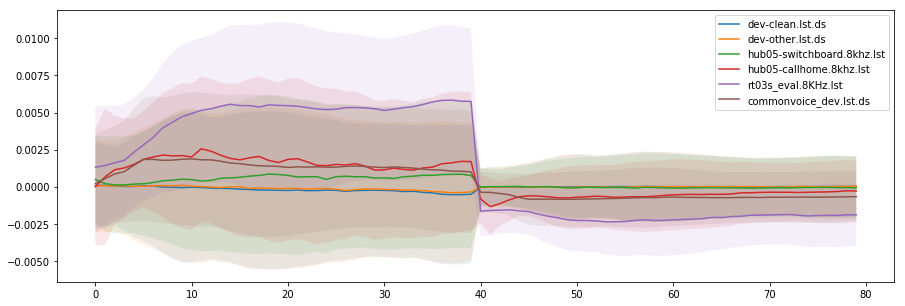

In [90]:
Coefficient = 0.01
fig, ax = plt.subplots(figsize=(15,5))

for k, v in raw_input_stat_dict.items():
    print(k)
    
    x = np.array(range(80))
    y = v["mean"][40:]
    ax.plot(x, y, label=k.split('/')[-1])
    
    y_up = v["mean"][40:] + Coefficient * v["std"][40:]
    y_low = v["mean"][40:] - Coefficient * v["std"][40:]
    ax.fill_between(x, y_low, y_up, alpha=.1)
ax.legend()

In [82]:
!head -n3 /private/home/qiantong/push_numbers/lists/dev-clean.lst
!echo '---' 
!head -n3 /private/home/qiantong/push_numbers/lists/dev-other.lst
!echo '---' 
!head -n3 /private/home/qiantong/tmp/commonvoice_dev.lst
!echo '---' 
!cat /private/home/qiantong/push_numbers/lists/dev-clean.lst /private/home/qiantong/push_numbers/lists/dev-other.lst /private/home/qiantong/tmp/commonvoice_dev.lst | wc -l

dev-clean-1272-128104-0000 /datasets01/librispeech/062419/dev-clean/1272/128104/1272-128104-0000.flac 5855.0 mister quilter is the apostle of the middle classes and we are glad to welcome his gospel
dev-clean-1272-128104-0001 /datasets01/librispeech/062419/dev-clean/1272/128104/1272-128104-0001.flac 4815.0 nor is mister quilter's manner less interesting than his matter
dev-clean-1272-128104-0002 /datasets01/librispeech/062419/dev-clean/1272/128104/1272-128104-0002.flac 12485.0 he tells us that at this festive season of the year with christmas and roast beef looming before us similes drawn from eating and its results occur most readily to the mind
---
dev-other-116-288045-0000 /datasets01/librispeech/062419/dev-other/116/288045/116-288045-0000.flac 10650.0 as i approached the city i heard bells ringing and a little later i found the streets astir with throngs of well dressed people in family groups wending their way hither and thither
dev-other-116-288045-0001 /datasets01/librispeech/06

Process ForkPoolWorker-2200:
Traceback (most recent call last):
  File "/private/home/qiantong/.conda/envs/fairseq-fp16-20200116/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/private/home/qiantong/.conda/envs/fairseq-fp16-20200116/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/private/home/qiantong/.conda/envs/fairseq-fp16-20200116/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/private/home/qiantong/.conda/envs/fairseq-fp16-20200116/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/private/home/qiantong/.conda/envs/fairseq-fp16-20200116/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


In [7]:
downsample_lists = [librispeech_dev_clean_list, librispeech_dev_other_list, cv_list]

ds_data_root = '/scratch/qiantong/downsample/'

# for dl in downsample_lists:
#     seperator = '\t'
#     if 'dev' in dl:
#         seperator = ' '
        
#     out_list = dl + '.ds'
#     with open(dl) as f, open(out_list, 'w') as fout:
#         for line in f:
#             sp = line.split(seperator)
#             path = sp[1]
#             new_path = ds_data_root + path.split('/')[-1]
#             print(path, new_path)
#             sp[1] = new_path
#             fout.write(seperator.join(sp))


def downsample(line):
    sp = line.split(seperator)
    path = sp[1]
    new_path = ds_data_root + path.split('/')[-1]
    os.system("sox {} --rate 8000 {}".format(path, new_path))

for dl in downsample_lists:
    seperator = '\t'
    if 'dev' in dl:
        seperator = ' '
        
    with open(dl) as f:
        p = Pool(40)
        p.map(downsample, f.readlines())
        p.close()
            
            

In [9]:
new_librispeech_dev_clean_list = '/private/home/qiantong/push_numbers/lists/dev-clean.lst.ds' 
new_librispeech_dev_other_list = '/private/home/qiantong/push_numbers/lists/dev-other.lst.ds' 
new_cv_list = '/private/home/qiantong/tmp/commonvoice_dev.lst.ds'

new_hub05_swbd_list = '/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.8khz.lst'
new_hub05_ch_list = '/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.8khz.lst'
new_rt03_list = '/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.8KHz.lst'


In [12]:
params = FeatureParams()
# define parameters of the featurization
params.sampling_freq = 8000
params.low_freq_filterbank = 0
params.high_freq_filterbank = 4000
params.num_filterbank_chans = 80
params.num_cepstral_coeffs = 13
params.use_energy = False
params.zero_mean_frame = False
params.use_power = False
params.acc_window = 0
params.delta_window = 0
# apply MFSC featurization
mfsc = Mfsc(params)

def gen_features(input):
    return mfsc.apply(input)

def gen_noram_features(value):
    feat = np.array(value)
    mean_feat = np.mean(feat)
    std_feat = np.std(feat)
    feat = (feat - mean_feat) / std_feat
    
    return feat

lists = [new_librispeech_dev_clean_list, new_librispeech_dev_other_list, new_hub05_swbd_list, new_hub05_ch_list, new_rt03_list, new_cv_list]

raw_input_dict = {}
for data_list in lists:    
    raw_input = []
    seperator = '\t'
    if 'dev' in data_list:
        seperator = ' '
        
    with open(data_list) as f:
        for line in f:
            sp = line.split(seperator)
            data, _ = sf.read(sp[1])                                            
            raw_input.append(data)

    raw_input_c = np.concatenate(raw_input)
    print(data_list)
    print(raw_input_c.shape)
    print(np.mean(raw_input_c), np.min(raw_input_c), np.max(raw_input_c), np.std(raw_input_c))
    raw_input_dict[data_list] = raw_input
    print('----')
    
mfsc_dict = {}
for data_list in lists:
    print(data_list, flush=True)
    p = Pool(40)
    features = p.map(gen_features, raw_input_dict[data_list][:4000])
    p.close()
    mfsc_dict[data_list] = features
    
raw_input_stat_dict = {}
for k, v in mfsc_dict.items():
    print(k)
    p = Pool(40)
    normalized_feat = p.map(gen_noram_features, v)
    p.close()
    
    feat = np.concatenate(normalized_feat)
    nframes = len(feat) // 80
    feat = feat.reshape(nframes, 80)
    mean_feat = np.mean(feat, 0)
    std_feat = np.std(feat, 0)
    raw_input_stat_dict[k] = {}
    raw_input_stat_dict[k]["mean"] = mean_feat
    raw_input_stat_dict[k]["std"] = std_feat
    print(mean_feat)
    print(std_feat)
    print('-----')

/private/home/qiantong/push_numbers/lists/dev-clean.lst.ds
(155168989,)
0.0001323721506970066 -1.0 0.999969482421875 0.06759181662837396
----
/private/home/qiantong/push_numbers/lists/dev-other.lst.ds
(147490150,)
-0.00012310270173027498 -1.0 0.999969482421875 0.06370529466237852
----
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.8khz.lst
(60390464,)
-0.00034265448118351205 -0.9803466796875 0.9803466796875 0.03836108019428726
----
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.8khz.lst
(48766640,)
-0.0002724468135148972 -0.9490966796875 0.9803466796875 0.07376471840540691
----
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.8KHz.lst
(180533056,)
-9.874013475054223e-05 -0.9803466796875 0.9803466796875 0.07471194877062069
----
/private/home/qiantong/tmp/commonvoice_dev.lst.ds
(780170529,)
-3.942711954066182e-06 -1.0 0.999969482421875 0.09653924362424077
----
/private/home/qiantong/push_numbers/lists/dev-clean.lst.ds
/private/home/qiantong/push_n

[-2.26476378 -1.57171111 -1.88713066 -1.65463409 -1.43910178 -1.68309015
 -0.98121058 -1.04240204 -0.92092799 -0.48305868 -0.60608769 -0.56925592
 -0.26965846 -0.37659235 -0.25512857 -0.21641089  0.02176433 -0.05812821
  0.00748834  0.03981645  0.05823338  0.07350671  0.09449947  0.1218206
  0.09223483  0.09916027  0.09564185  0.08980357  0.08339004  0.08615696
  0.09953702  0.07271446  0.06990529  0.06794799  0.0656014   0.07824954
  0.11516088  0.05525891  0.05712359  0.14668837  0.08143549  0.11858783
  0.1609431   0.13808358  0.21318357  0.19824805  0.24379767  0.28481876
  0.28492921  0.33668115  0.37143463  0.374835    0.39644289  0.40762106
  0.41373121  0.41663549  0.41629351  0.42078713  0.43088943  0.44282818
  0.45824472  0.48390751  0.50771353  0.49665361  0.51706728  0.50054748
  0.50187989  0.47175861  0.48543096  0.46020902  0.45174784  0.44765785
  0.44013635  0.42766752  0.40390691  0.36405825  0.31133069  0.2539664
  0.2055858   0.14591155]
[0.67812491 0.75829492 0.71

/private/home/qiantong/push_numbers/lists/dev-clean.lst.ds
/private/home/qiantong/push_numbers/lists/dev-other.lst.ds
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-switchboard.8khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/hub05-callhome.8khz.lst
/checkpoint/vineelkpratap/rt03s_eval/original/lists/rt03s_eval.8KHz.lst
/private/home/qiantong/tmp/commonvoice_dev.lst.ds


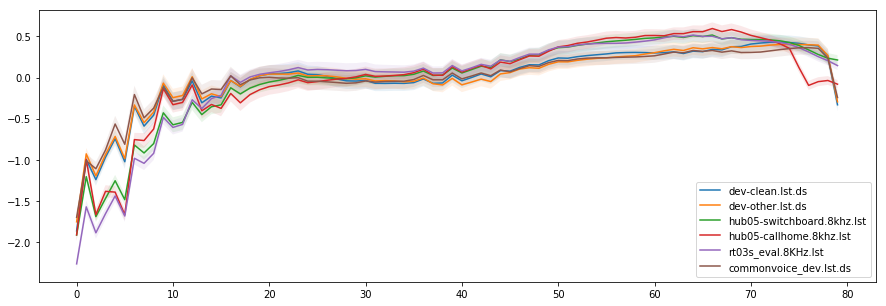

In [13]:
Coefficient = 0.1
fig, ax = plt.subplots(figsize=(15,5))

for k, v in raw_input_stat_dict.items():
    print(k)
    
    x = np.array(range(80))
    y = v["mean"]
    ax.plot(x, y, label=k.split('/')[-1])
    
    y_up = v["mean"] + Coefficient * v["std"]
    y_low = v["mean"] - Coefficient * v["std"]
    ax.fill_between(x, y_low, y_up, alpha=.1)
#     break
ax.legend()

# Targets

In [174]:
ls_train = [
    '/private/home/qiantong/push_numbers/lists/train-clean-100.lst', 
    '/private/home/qiantong/push_numbers/lists/train-clean-360.lst', 
    '/private/home/qiantong/push_numbers/lists/train-other-500.lst',
]

swbd_train = [
    '/checkpoint/wav2letter/data/swbd_lists/noNL/fisher.16khz.lst',
    '/checkpoint/wav2letter/data/swbd_lists/noNL/switchboard.16khz.lst',
]

cv_train = ['/checkpoint/wav2letter/data/commonvoice/lists/train.lst']

lv_train = ['/private/home/qiantong/push_numbers/lists/librivox.cut.sub36s.w2v_pl_rescore.lst']

ads_test = ['/private/home/qiantong/test_ads/test_ads/test_ads.lst']

In [175]:
swbd_lexicon = {}
with open('/checkpoint/wav2letter/data/swbd_lists/noNL/fisher+swbd-train-all-unigram.lex') as f:
    for line in f:
        sp = line.strip().split('\t')
        swbd_lexicon[sp[0]] = sp[1]

In [65]:
words_cnt = {}
letters_cnt = {}

def add_word(word, part):
    if not word in words_cnt:
        words_cnt[word] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0}
        
    words_cnt[word][part] += 1
    
def add_letter(char, part):
    if char == '_':
        char = '|'
    if not char in letters_cnt:
        letters_cnt[char] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0}
        
    letters_cnt[char][part] += 1


for ll in lv_train:
    print(ll)
    with open(ll) as f:
        cnt = 0
        for line in f:
            cnt += 1
            if cnt == 164001:
                break
            sp = line.strip().split()
            for word in sp[3:]:
                add_word(word, 'lv')
                for char in list(word):
                    add_letter(char, 'lv')
#             print(sp)
#             break
                    
for ll in ls_train:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split()
            for word in sp[3:]:
                add_word(word, 'ls')
                for char in list(word):
                    add_letter(char, 'ls')
#             print(sp)
#             break
   
for ll in swbd_train:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split('\t')
            if len(sp) < 4:
                continue
            for word in sp[-1].strip().split():
                add_word(word, 'swbd')
                if word not in swbd_lexicon:
                    continue
                for char in swbd_lexicon[word].strip().split():
                    add_letter(char, 'swbd')
#             print(sp)
#             break
            
for ll in cv_train:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split()
            if len(sp) < 4:
                continue
            for word in sp[3:]:
                add_word(word, 'cv')
                for char in list(word):
                    add_letter(char, 'cv')
#             print(sp)
#             break

/private/home/qiantong/push_numbers/lists/librivox.cut.sub36s.w2v_pl_rescore.lst
/private/home/qiantong/push_numbers/lists/train-clean-100.lst
/private/home/qiantong/push_numbers/lists/train-clean-360.lst
/private/home/qiantong/push_numbers/lists/train-other-500.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/fisher.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/switchboard.16khz.lst
/checkpoint/wav2letter/data/commonvoice/lists/train.lst


In [177]:
def add_word(word, part):
    if not word in words_cnt:
        words_cnt[word] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0, 'ads': 0}
    if not part in words_cnt[word]:
        words_cnt[word][part] = 0
        
    words_cnt[word][part] += 1
    
def add_letter(char, part):
    if char == '_':
        char = '|'
    if not char in letters_cnt:
        letters_cnt[char] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0, 'ads': 0}
    if not part in letters_cnt[char]:
        letters_cnt[char][part] = 0
        
    letters_cnt[char][part] += 1
    
for ll in ads_test:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split('\t')
            if len(sp) < 4:
                continue
            for word in sp[-1].strip().split():
                add_word(word, 'ads')
                if word not in swbd_lexicon:
                    continue
                for char in swbd_lexicon[word].strip().split():
                    add_letter(char, 'ads')

/private/home/qiantong/test_ads/test_ads/test_ads.lst


In [178]:
# print(words_cnt)
print(letters_cnt.keys())
print(len(letters_cnt))
print(letters_cnt)

dict_keys(['e', 'g', 'w', 'n', 'd', 'o', 'f', 'i', 't', 'r', 'u', 'c', 'h', 'a', 'p', 's', 'b', 'l', 'm', 'y', 'j', 'v', 'k', 'q', 'x', 'z', "'", '|'])
28
{'e': {'ls': 5132069, 'swbd': 9880152, 'cv': 2772201, 'lv': 1482238, 'ads': 102799}, 'g': {'ls': 820721, 'swbd': 1842616, 'cv': 431121, 'lv': 233548, 'ads': 19922}, 'w': {'ls': 958911, 'swbd': 2409810, 'cv': 389728, 'lv': 211146, 'ads': 20291}, 'n': {'ls': 2796872, 'swbd': 5737104, 'cv': 1595600, 'lv': 919912, 'ads': 59456}, 'd': {'ls': 1798239, 'swbd': 2998638, 'cv': 876499, 'lv': 565771, 'ads': 29167}, 'o': {'ls': 3076122, 'swbd': 7475006, 'cv': 1619778, 'lv': 938295, 'ads': 75123}, 'f': {'ls': 923419, 'swbd': 1396318, 'cv': 457927, 'lv': 342252, 'ads': 18010}, 'i': {'ls': 2766388, 'swbd': 6324668, 'cv': 1710091, 'lv': 809955, 'ads': 55436}, 't': {'ls': 3740731, 'swbd': 8711608, 'cv': 1913346, 'lv': 978965, 'ads': 83238}, 'r': {'ls': 2351014, 'swbd': 3884147, 'cv': 1525238, 'lv': 727871, 'ads': 47308}, 'u': {'ls': 1142513, 'swbd': 

In [179]:
sorted_d = sorted(words_cnt.items(), key=lambda x: x[1]['ls'])

In [180]:
print(sorted_d[:10])

[('adrien', {'ls': 0, 'swbd': 0, 'cv': 2, 'lv': 2}), ('stann', {'ls': 0, 'swbd': 0, 'cv': 1, 'lv': 150}), ('penfold', {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 266}), ('esqre', {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 1}), ('nichol', {'ls': 0, 'swbd': 1, 'cv': 0, 'lv': 21}), ('kilmer', {'ls': 0, 'swbd': 3, 'cv': 3, 'lv': 432}), ('teen', {'ls': 0, 'swbd': 110, 'cv': 58, 'lv': 9, 'ads': 2}), ('gagin', {'ls': 0, 'swbd': 0, 'cv': 1, 'lv': 44}), ('blog', {'ls': 0, 'swbd': 3, 'cv': 61, 'lv': 968, 'ads': 5}), ('hoover', {'ls': 0, 'swbd': 26, 'cv': 27, 'lv': 6})]


/private/home/qiantong/test_ads/test_ads/test_ads.lst
/private/home/qiantong/test_ads/test_ads/test_ads.lst
/private/home/qiantong/test_ads/test_ads/test_ads.lst
/private/home/qiantong/test_ads/test_ads/test_ads.lst
/private/home/qiantong/test_ads/test_ads/test_ads.lst


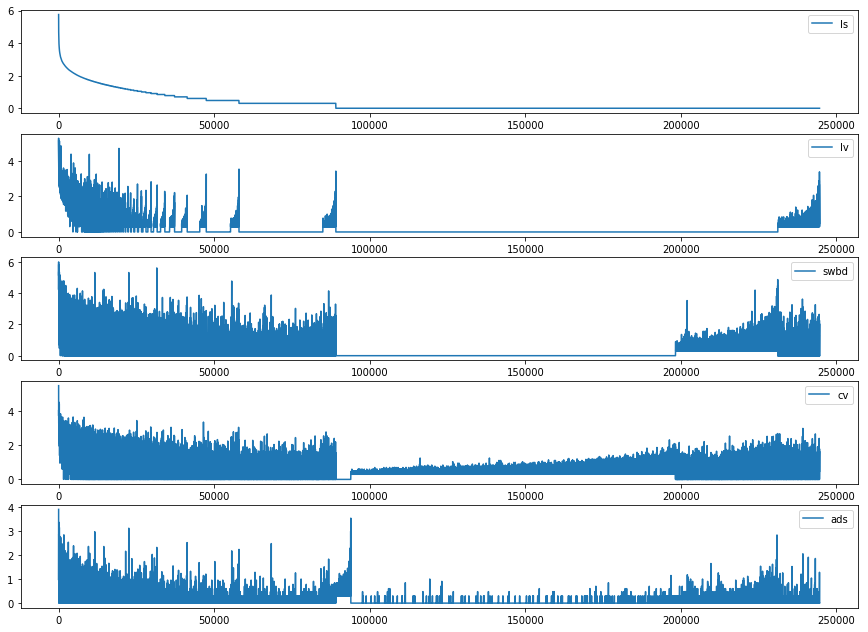

In [183]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,11))

for i, part in enumerate(['ls', 'lv', 'swbd', 'cv', 'ads']):
    print(k)
#     ax = axes[i, 0]
    
    x = np.array(list(reversed(range(len(sorted_d)))))
    y = []
#     sum_y = 0.
    for w, v in sorted_d:
        if not part in v:
            n = 0
        else:
            n = v[part]
        sum_y += n
        y.append(n)
    y = [np.log10(i + 1) for i in y]
    axes[i].plot(x, y, label=part) 
    axes[i].legend()

In [75]:
sorted_d = sorted(words_cnt.items(), key=lambda x: x[1]['swbd'])

/private/home/qiantong/tmp/commonvoice_dev.lst.ds
/private/home/qiantong/tmp/commonvoice_dev.lst.ds
/private/home/qiantong/tmp/commonvoice_dev.lst.ds
/private/home/qiantong/tmp/commonvoice_dev.lst.ds


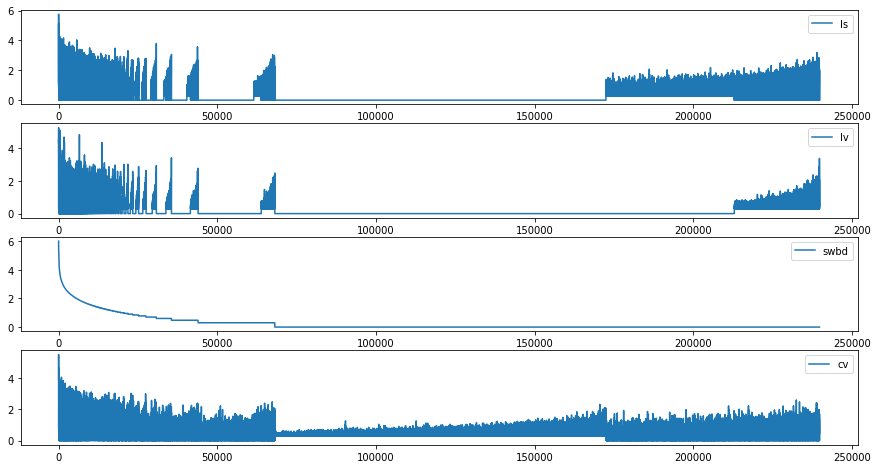

In [76]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,8))

for i, part in enumerate(['ls', 'lv', 'swbd', 'cv']):
    print(k)
#     ax = axes[i, 0]
    
    x = np.array(list(reversed(range(len(sorted_d)))))
    y = []
#     sum_y = 0.
    for w, v in sorted_d:
        n = v[part]
        sum_y += n
        y.append(n)
    y = [np.log10(i + 1) for i in y]
    axes[i].plot(x, y, label=part) 
    axes[i].legend()

In [77]:
sorted_d = sorted(words_cnt.items(), key=lambda x: x[1]['cv'])

/private/home/qiantong/tmp/commonvoice_dev.lst.ds
/private/home/qiantong/tmp/commonvoice_dev.lst.ds
/private/home/qiantong/tmp/commonvoice_dev.lst.ds
/private/home/qiantong/tmp/commonvoice_dev.lst.ds


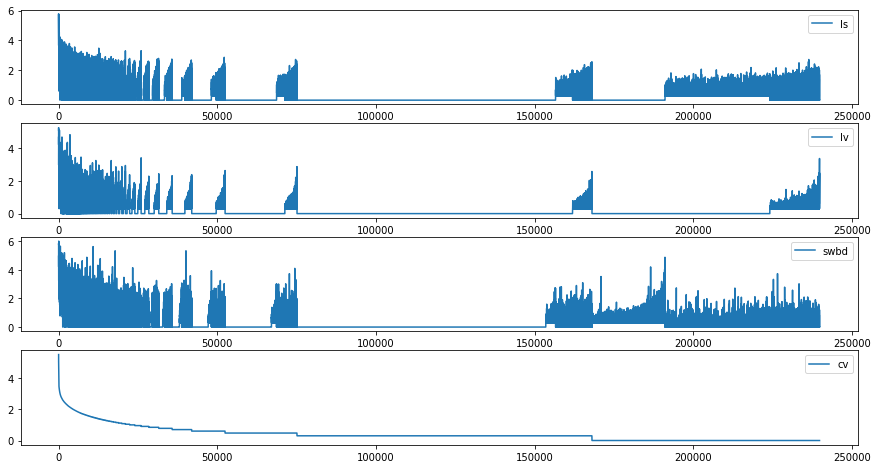

In [78]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,8))

for i, part in enumerate(['ls', 'lv', 'swbd', 'cv']):
    print(k)
#     ax = axes[i, 0]
    
    x = np.array(list(reversed(range(len(sorted_d)))))
    y = []
#     sum_y = 0.
    for w, v in sorted_d:
        n = v[part]
        sum_y += n
        y.append(n)
    y = [np.log10(i + 1) for i in y]
    axes[i].plot(x, y, label=part) 
    axes[i].legend()

('e', '|')
40659898.0 40659898
('e', '|')
11446393.0 11446393
('e', '|')
88980655.0 88980655
('e', '|')
22597928.0 22597928
('e', '|')
859816.0 859816


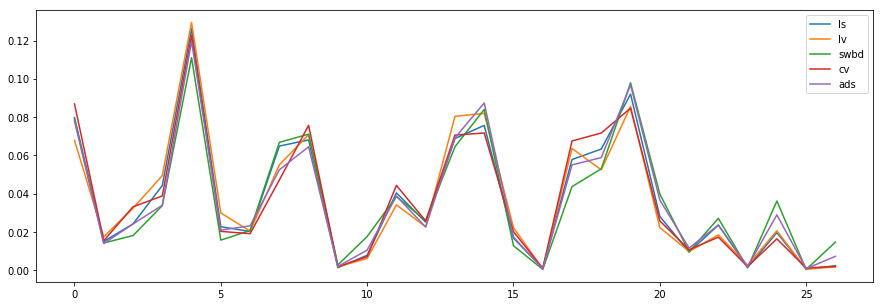

In [206]:
fig, ax = plt.subplots(figsize=(15,5))

for part in ['ls', 'lv', 'swbd', 'cv', 'ads']:
    print(k)
    
    x = np.array(range(27))
    y = []
    sum_y = 0.
    for char in list('abcdefghijklmnopqrstuvwxyz') + ['\'']:
        n = letters_cnt[char][part]
        sum_y += n
        y.append(n)
    print(sum_y, sum(y))
    y = [i / sum_y for i in y]
    ax.plot(x, y, label=part)
    
ax.legend()

In [87]:
from nltk.util import ngrams # function for making ngrams
import nltk, re, string, collections


In [193]:
letter_bigram = {}

## ls
trans = []
for ll in ls_train:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split()
            tran = ' '.join(sp[3:]).replace(' ', '|')
            trans.append(tran)

text = '$'.join(trans)
esBigrams = ngrams(text, 2)
esBigramFreq = collections.Counter(esBigrams)
print(len(dict(esBigramFreq)))
for k, v in dict(esBigramFreq).items():
    if not k in letter_bigram:
        letter_bigram[k] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0, 'ads': 0}
    letter_bigram[k]['ls'] += v
        
# swbd        
trans = []
for ll in swbd_train:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split('\t')
            if len(sp) < 4:
                continue
                
            tran = ""
            for word in sp[-1].strip().split():
                if word not in swbd_lexicon:
                    continue
                for char in swbd_lexicon[word].strip().split():
                    tran += char
            tran = tran.replace('_', '|')
            if len(tran) < 2:
                continue
            trans.append(tran[:-1])

text = '$'.join(trans)
esBigrams = ngrams(text, 2)
esBigramFreq = collections.Counter(esBigrams)
print(len(dict(esBigramFreq)))
for k, v in dict(esBigramFreq).items():
    if not k in letter_bigram:
        letter_bigram[k] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0, 'ads': 0}
    letter_bigram[k]['swbd'] += v
        
        
## CV   
trans = []
for ll in cv_train:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split()
            if len(sp) < 4:
                continue
            tran = ' '.join(sp[3:]).replace(' ', '|')
            trans.append(tran)
            
text = '$'.join(trans)
esBigrams = ngrams(text, 2)
esBigramFreq = collections.Counter(esBigrams)
print(len(dict(esBigramFreq)))
for k, v in dict(esBigramFreq).items():
    if not k in letter_bigram:
        letter_bigram[k] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0, 'ads': 0}
    letter_bigram[k]['cv'] += v
    
    
# ads        
trans = []
for ll in ads_test:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split('\t')
            if len(sp) < 4:
                continue
                
            tran = sp[-1].strip().lower()
            tran = tran.replace(' ', '|')
            trans.append(tran[:-1])

text = '$'.join(trans)
esBigrams = ngrams(text, 2)
esBigramFreq = collections.Counter(esBigrams)
print(len(dict(esBigramFreq)))
for k, v in dict(esBigramFreq).items():
    if not k in letter_bigram:
        letter_bigram[k] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0, 'ads': 0}
    letter_bigram[k]['ads'] += v

/private/home/qiantong/push_numbers/lists/train-clean-100.lst
/private/home/qiantong/push_numbers/lists/train-clean-360.lst
/private/home/qiantong/push_numbers/lists/train-other-500.lst
749
/checkpoint/wav2letter/data/swbd_lists/noNL/fisher.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/switchboard.16khz.lst
762
/checkpoint/wav2letter/data/commonvoice/lists/train.lst
815
/private/home/qiantong/test_ads/test_ads/test_ads.lst
793


In [194]:
sorted_letter_bigram = sorted(letter_bigram.items(), key=lambda x: x[1]['ls'])
print(letter_bigram)

{('c', 'h'): {'ls': 172188, 'swbd': 268819, 'cv': 102968, 'lv': 0, 'ads': 3463}, ('h', 'a'): {'ls': 412762, 'swbd': 1220127, 'cv': 121698, 'lv': 0, 'ads': 9801}, ('a', 'p'): {'ls': 55739, 'swbd': 61444, 'cv': 32639, 'lv': 0, 'ads': 1080}, ('p', 't'): {'ls': 24796, 'swbd': 18101, 'cv': 14024, 'lv': 0, 'ads': 329}, ('t', 'e'): {'ls': 315645, 'swbd': 452387, 'cv': 237561, 'lv': 0, 'ads': 6604}, ('e', 'r'): {'ls': 691055, 'swbd': 1070249, 'cv': 396521, 'lv': 0, 'ads': 12708}, ('r', '|'): {'ls': 560022, 'swbd': 843037, 'cv': 243050, 'lv': 0, 'ads': 13131}, ('|', 'o'): {'ls': 580951, 'swbd': 1042271, 'cv': 255937, 'lv': 0, 'ads': 12206}, ('o', 'n'): {'ls': 430055, 'swbd': 804192, 'cv': 295300, 'lv': 0, 'ads': 10534}, ('n', 'e'): {'ls': 239738, 'swbd': 401638, 'cv': 126725, 'lv': 0, 'ads': 5839}, ('e', '|'): {'ls': 1833315, 'swbd': 3472130, 'cv': 819167, 'lv': 0, 'ads': 41239}, ('|', 'm'): {'ls': 401808, 'swbd': 770730, 'cv': 163240, 'lv': 0, 'ads': 7734}, ('m', 'i'): {'ls': 104166, 'swbd': 1

ls
50063451
swbd
111912329
cv
27120244
ads
1167852


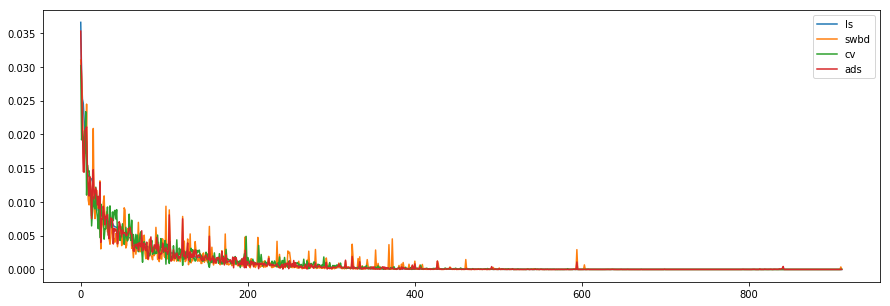

In [205]:
fig, ax = plt.subplots(figsize=(15,5))

for part in ['ls', 'swbd', 'cv', 'ads']:
    print(part)
    
    x = np.array(list(reversed(range(len(sorted_letter_bigram)))))
    y = []
    
    sum_y += 0.
    for k, v in sorted_letter_bigram:
#         print(v)
        n = v[part]
        sum_y += n
        y.append(n)
    print(sum(y))
    y = [i / sum(y) for i in y]
    ax.plot(x, y, label=part)
    
ax.legend()

In [136]:
letter_trigram = {}

## ls
trans = []
for ll in ls_train:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split()
            tran = ' '.join(sp[3:]).replace(' ', '|')
            trans.append(tran)

text = '$'.join(trans)
esBigrams = ngrams(text, 3)
esBigramFreq = collections.Counter(esBigrams)
print(len(dict(esBigramFreq)))
for k, v in dict(esBigramFreq).items():
    if not k in letter_trigram:
        letter_trigram[k] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0}
    letter_trigram[k]['ls'] += v
        
# swbd        
trans = []
for ll in swbd_train:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split('\t')
            if len(sp) < 4:
                continue
                
            tran = ""
            for word in sp[-1].strip().split():
                if word not in swbd_lexicon:
                    continue
                for char in swbd_lexicon[word].strip().split():
                    tran += char
            tran = tran.replace('_', '|')
            if len(tran) < 2:
                continue
            trans.append(tran[:-1])

text = '$'.join(trans)
esBigrams = ngrams(text, 3)
esBigramFreq = collections.Counter(esBigrams)
print(len(dict(esBigramFreq)))
for k, v in dict(esBigramFreq).items():
    if not k in letter_trigram:
        letter_trigram[k] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0}
    letter_trigram[k]['swbd'] += v
        
        
## CV   
trans = []
for ll in cv_train:
    print(ll)
    with open(ll) as f:
        for line in f:
            sp = line.strip().split()
            if len(sp) < 4:
                continue
            tran = ' '.join(sp[3:]).replace(' ', '|')
            trans.append(tran)
            
text = '$'.join(trans)
esBigrams = ngrams(text, 3)
esBigramFreq = collections.Counter(esBigrams)
print(len(dict(esBigramFreq)))
for k, v in dict(esBigramFreq).items():
    if not k in letter_trigram:
        letter_trigram[k] = {'ls': 0, 'swbd': 0, 'cv': 0, 'lv': 0}
    letter_trigram[k]['cv'] += v

/private/home/qiantong/push_numbers/lists/train-clean-100.lst
/private/home/qiantong/push_numbers/lists/train-clean-360.lst
/private/home/qiantong/push_numbers/lists/train-other-500.lst
10808
/checkpoint/wav2letter/data/swbd_lists/noNL/fisher.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/switchboard.16khz.lst
10279
/checkpoint/wav2letter/data/commonvoice/lists/train.lst
13667


In [137]:
sorted_letter_trigram = sorted(letter_trigram.items(), key=lambda x: x[1]['ls'])

swbd
ls
cv


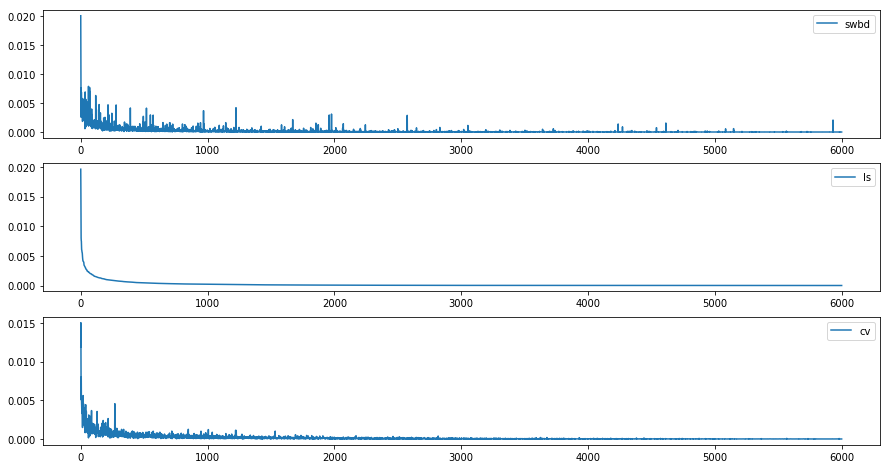

In [209]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,8))

for i, part in enumerate(['swbd', 'ls', 'cv']):
    print(part)
    x = np.array(list(reversed(range(len(sorted_letter_trigram)))))
    y = []
    
    sum_y += 0.
    for k, v in sorted_letter_trigram:
        n = v[part]
        sum_y += n
        y.append(n)
#     print(sum_y, sum(y))
    y = [i / sum(y) for i in y]
    axes[i].plot(x[-6000:], y[-6000:], label=part) 
    axes[i].legend()
#     plt.ylim(0,0.0004)


In [16]:
with open('/checkpoint/qiantong/wsj/si284.lst') as f:
    for line in f:
        sp = line.split(' ')
        audio = sp[1]
        duration = float(sp[2])
        data, samplerate = sf.read(audio)  
        true_duration = len(data) * 1000. / samplerate
        # print(audio, duration, true_duration)
        if abs(duration - true_duration) > 1:
            print(audio, duration, true_duration)
#             print('---')

# wav2vec

In [170]:
lists = {
    "960h" : {
        "train" : [
            '/private/home/qiantong/push_numbers/lists/train-clean-100.lst', 
            '/private/home/qiantong/push_numbers/lists/train-clean-360.lst', 
            '/private/home/qiantong/push_numbers/lists/train-other-500.lst',
        ],
        "pl" : [
            '/private/home/qiantong/push_numbers/lists/librivox.cut.sub36s.w2v_pl_960h_rescore.lst'
        ]
    },
    "100h" : {
        "train" : [
            '/private/home/qiantong/push_numbers/lists/train-clean-100.lst', 
        ],
        "pl" : [
            '/private/home/qiantong/push_numbers/lists/librivox.cut.sub36s.w2v_pl_100h_rescore.lst'
        ]
    },
    "10m" : {
        "train" : [
            '/private/home/qiantong/abdo/data/10min_0.lst', 
        ],
        "pl" : [
            '/private/home/qiantong/push_numbers/lists/librivox.cut.sub36s.w2v_pl_10m_rescore.lst'
        ]
    },
    ## new
    "10h" : {
        "train" : [
            '/private/home/qiantong/abdo/data/10h.lst', 
        ],
    },
    "1h" : {
        "train" : [
            '/private/home/qiantong/abdo/data/1h.lst', 
        ],
    },
}

In [59]:
parts_all = []

for part1 in ["10m", "100h", "960h"]:
    for part2 in ["train", "pl"]:
        parts_all.append(part1 + '_' + part2)

print(parts_all)

['10m_train', '10m_pl', '100h_train', '100h_pl', '960h_train', '960h_pl']


In [60]:
words_cnt = {}
letters_cnt = {}

def add_word(word, part):
    if not word in words_cnt:
        words_cnt[word] = {}
        for part in parts_all:
            words_cnt[word][part] = 0
        
    words_cnt[word][part] += 1
    
def add_letter(char, part):
    if not char in letters_cnt:
        letters_cnt[char] = {}
        for part in parts_all:
            letters_cnt[char][part] = 0
        
    letters_cnt[char][part] += 1

    
for part1 in ["10m"]:
    for part2 in ["train", "pl"]:
        for ll in lists[part1][part2]:
            print(ll)
            with open(ll) as f:
                for i, line in enumerate(f.readlines()):
                    if i % 1000000 == 0:
                        print(i)

                    sp = line.strip().split()
                    for word in sp[3:]:
                        add_word(word, part1 + '_' + part2)
                        for char in word:
                            add_letter(char, part1 + '_' + part2)


/private/home/qiantong/abdo/data/10min_0.lst
0
/private/home/qiantong/push_numbers/lists/librivox.cut.sub36s.w2v_pl_10m_rescore.lst
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000


In [61]:
for part1 in ["100h", "960h"]:
    for part2 in ["train", "pl"]:
        for ll in lists[part1][part2]:
            print(ll)
            with open(ll) as f:
                for i, line in enumerate(f.readlines()):
                    if i % 1000000 == 0:
                        print(i)

                    sp = line.strip().split()
                    for word in sp[3:]:
                        add_word(word, part1 + '_' + part2)
                        for char in word:
                            add_letter(char, part1 + '_' + part2)

/private/home/qiantong/push_numbers/lists/train-clean-100.lst
0
/private/home/qiantong/push_numbers/lists/librivox.cut.sub36s.w2v_pl_100h_rescore.lst
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
/private/home/qiantong/push_numbers/lists/train-clean-100.lst
0
/private/home/qiantong/push_numbers/lists/train-clean-360.lst
0
/private/home/qiantong/push_numbers/lists/train-other-500.lst
0
/private/home/qiantong/push_numbers/lists/librivox.cut.sub36s.w2v_pl_960h_rescore.lst
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000


10m_train
10m_pl
100h_train
100h_pl
960h_train
960h_pl


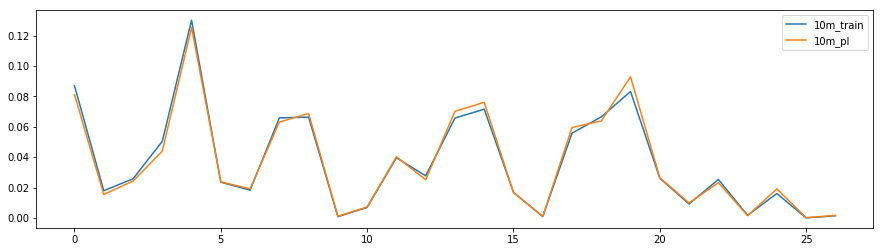

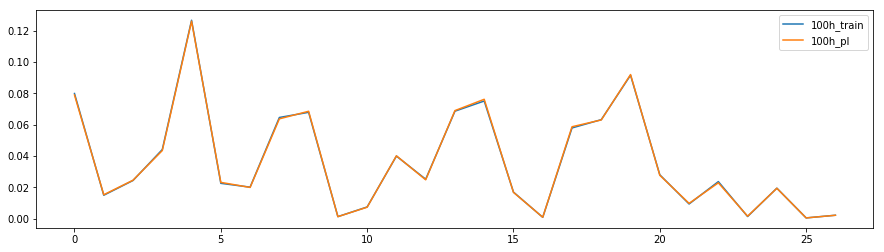

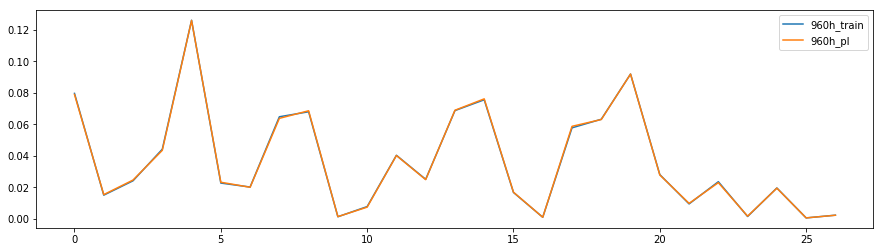

In [62]:
for part1 in ["10m", "100h", "960h"]:
    fig, ax = plt.subplots(figsize=(15,4))
    for part2 in ["train", "pl"]:
        part = part1 + '_' + part2
        print(part)

        x = np.array(range(27))
        y = []
        for char in list('abcdefghijklmnopqrstuvwxyz') + ['\'']:
            n = letters_cnt[char][part]
            y.append(n)
        sum_y = sum(y)
        y = [i / sum_y for i in y]
        ax.plot(x, y, label=part)
    
    ax.legend()

In [179]:
import scipy
import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

for part1 in ["960h"]:
    for part2 in ["train"]:
        part = part1 + '_' + part2
        print(part)

        x = np.array(range(27))
        y = []
        for char in list('abcdefghijklmnopqrstuvwxyz') + ['\'']:
            n = letters_cnt[char][part]
            y.append(n)
        sum_y = sum(y)
        groud_truth = [i / sum_y for i in y]
      
# for part1 in ["10m", "100h", "960h"]:
#     for part2 in ["train", "pl"]:
#         part = part1 + '_' + part2
#         print(part)

#         x = np.array(range(27))
#         y = []
#         for char in list('abcdefghijklmnopqrstuvwxyz') + ['\'']:
#             n = letters_cnt[char][part]
#             y.append(n)
#         sum_y = sum(y)
#         y = [i / sum_y for i in y]
#         print(scipy.special.kl_div(y, groud_truth))
        
for part1 in ["1h", "10h"]:
    for part2 in ["train"]:
        part = part1 + '_' + part2
        print(part)

        x = np.array(range(27))
        y = []
        for char in list('abcdefghijklmnopqrstuvwxyz') + ['\'']:
            n = new_letter_gram[1][(char,)][part]
            y.append(n)
        sum_y = sum(y)
        y = [i / sum_y for i in y]
        print(KL(y, groud_truth))

960h_train
1h_train
0.0004770401854800625
10h_train
0.0002481535659038202


960h_train


NameError: name 'sorted_d' is not defined

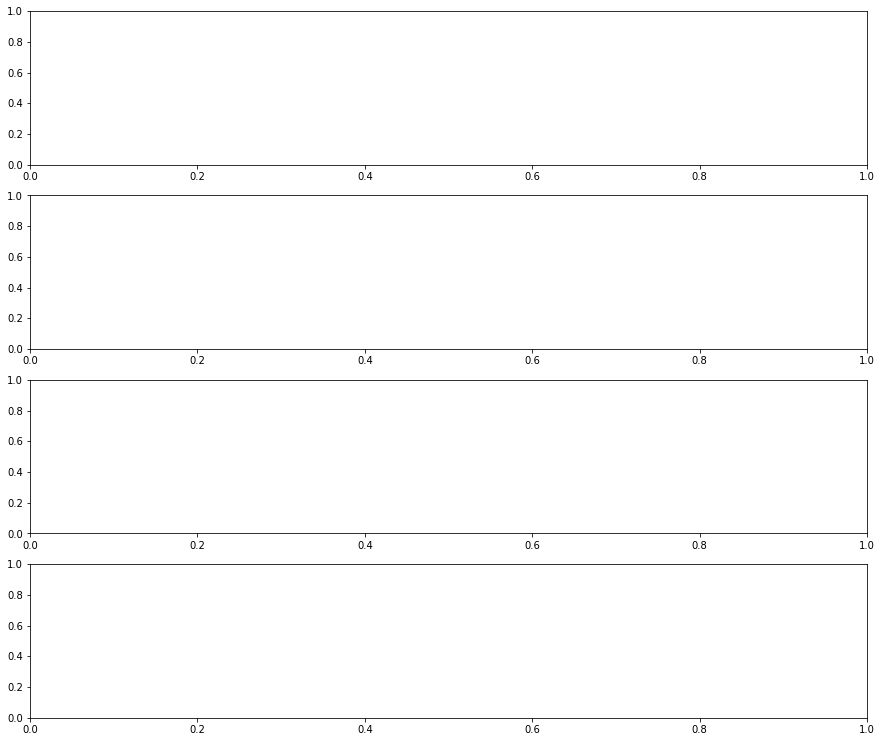

In [66]:
sorted_words_cnt = sorted(words_cnt.items(), key=lambda x: x[1]['960h_train'])

960h_train
960h_pl
100h_train
100h_pl
10m_train
10m_pl


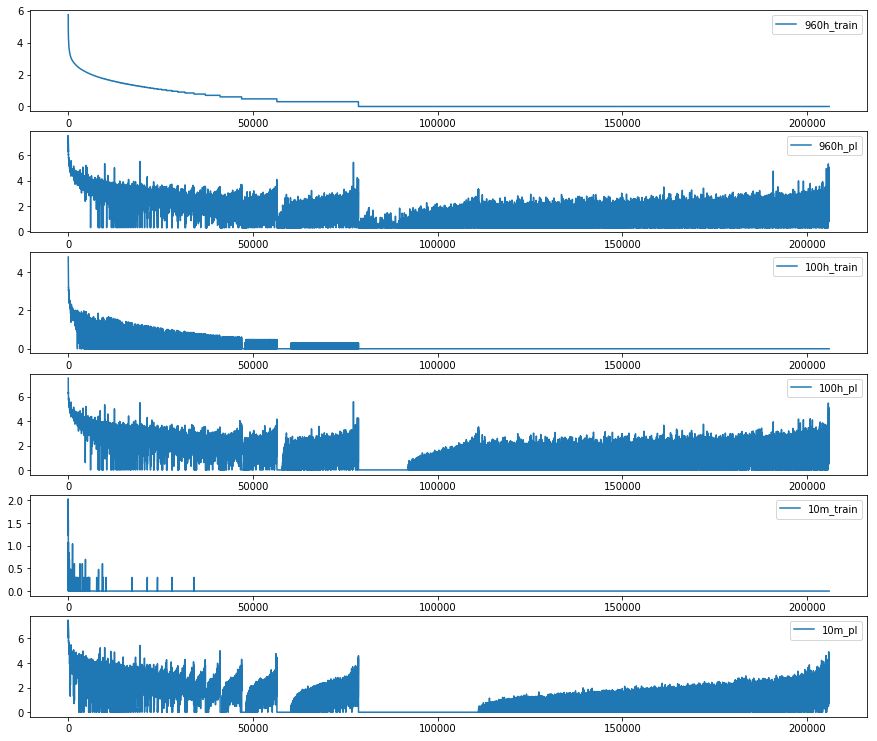

In [69]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15,13))

i = 0
for part1 in ["960h", "100h" , "10m"]:
    for part2 in ["train", "pl"]:
        part = part1 + '_' + part2
        print(part)
    
        x = np.array(list(reversed(range(len(sorted_words_cnt)))))
        y = []
        for w, v in sorted_words_cnt:
            n = v[part]
            y.append(n)
        y = [np.log10(i + 1) for i in y]
        axes[i].plot(x, y, label=part) 
        axes[i].legend()
        i += 1

In [77]:
from nltk.util import ngrams # function for making ngrams
import nltk, re, string, collections
import pickle

letter_gram = {}
letter_gram[2] = {}
letter_gram[3] = {}
letter_gram[4] = {}
letter_gram[5] = {}

for part1 in ["10m", "100h", "960h"]:
    for part2 in ["train", "pl"]:
        part = part1 + '_' + part2
        trans = []
        for ll in lists[part1][part2]:
            print(ll)
            with open(ll) as f:
                for i, line in enumerate(f.readlines()):
                    sp = line.strip().split()
                    trans.append('|'.join(sp[3:]))
                            
        text = '$'.join(trans)
        
        for i in [2,3,4,5]:
            grams = ngrams(text, i)
            gramFreq = collections.Counter(grams)
            print(part, len(dict(gramFreq)))
            for k, v in dict(gramFreq).items():
                if not k in letter_gram[i]:
                    letter_gram[i][k] = {}
                    for p in parts_all:
                        letter_gram[i][k][p] = 0
                letter_gram[i][k][part] += v
                
# pickle.dump(letter_gram, open("/private/home/qiantong/tmp/letter_gram.pkl", "wb"))

/private/home/qiantong/abdo/data/10min_0.lst
10m_train 401
10m_train 1993
10m_train 4296
10m_train 6103
/private/home/qiantong/push_numbers/lists/train-clean-100.lst
100h_train 695
100h_train 8069
100h_train 47047
100h_train 166166
/private/home/qiantong/push_numbers/lists/train-clean-100.lst
/private/home/qiantong/push_numbers/lists/train-clean-360.lst
/private/home/qiantong/push_numbers/lists/train-other-500.lst
960h_train 749
960h_train 10808
960h_train 80018
960h_train 347309


In [175]:
new_letter_gram = {}
new_letter_gram[1] = {}
new_letter_gram[2] = {}
new_letter_gram[3] = {}
new_letter_gram[4] = {}
new_letter_gram[5] = {}

for part1 in ["1h", "10h"]:
    for part2 in ["train"]:
        part = part1 + '_' + part2
        trans = []
        for ll in lists[part1][part2]:
            print(ll)
            with open(ll) as f:
                for i, line in enumerate(f.readlines()):
                    sp = line.strip().split()
                    trans.append('|'.join(sp[3:]))
                            
        text = '$'.join(trans)
        
        for i in [1,2,3,4,5]:
            grams = ngrams(text, i)
            gramFreq = collections.Counter(grams)
            print(part, len(dict(gramFreq)))
            for k, v in dict(gramFreq).items():
                if not k in new_letter_gram[i]:
                    new_letter_gram[i][k] = {}
                    for p in ["1h_train", "10h_train"]:
                        new_letter_gram[i][k][p] = 0
                new_letter_gram[i][k][part] += v
                
# pickle.dump(new_letter_gram, open("/private/home/qiantong/tmp/new_letter_gram.pkl", "wb"))

/private/home/qiantong/abdo/data/1h.lst
1h_train 29
1h_train 506
1h_train 3601
1h_train 11259
1h_train 21593
/private/home/qiantong/abdo/data/10h.lst
10h_train 29
10h_train 599
10h_train 5544
10h_train 24128
10h_train 66037


In [177]:
print(new_letter_gram[1])

{('c',): {'1h_train': 1124, '10h_train': 9844}, ('h',): {'1h_train': 2812, '10h_train': 27187}, ('a',): {'1h_train': 3623, '10h_train': 33152}, ('p',): {'1h_train': 755, '10h_train': 6890}, ('t',): {'1h_train': 3925, '10h_train': 38431}, ('e',): {'1h_train': 5591, '10h_train': 51860}, ('r',): {'1h_train': 2531, '10h_train': 23546}, ('|',): {'1h_train': 9875, '10h_train': 94802}, ('n',): {'1h_train': 3034, '10h_train': 28855}, ('i',): {'1h_train': 3060, '10h_train': 28794}, ('o',): {'1h_train': 3271, '10h_train': 31495}, ('s',): {'1h_train': 2745, '10h_train': 26071}, ('f',): {'1h_train': 991, '10h_train': 9062}, ('k',): {'1h_train': 350, '10h_train': 3456}, ('u',): {'1h_train': 1275, '10h_train': 12400}, ('l',): {'1h_train': 1765, '10h_train': 16308}, ('d',): {'1h_train': 1980, '10h_train': 18289}, ('y',): {'1h_train': 813, '10h_train': 8226}, ('b',): {'1h_train': 748, '10h_train': 6339}, ('v',): {'1h_train': 394, '10h_train': 3936}, ('m',): {'1h_train': 1153, '10h_train': 10685}, ('g'

In [86]:
letter_gram = pickle.load(open("/private/home/qiantong/tmp/letter_gram.pkl", 'rb'))

print(new_letter_gram[2])

{('c', 'h'): {'10m_train': 41, '10m_pl': 8325835, '100h_train': 18396, '100h_pl': 10548184, '960h_train': 172188, '960h_pl': 10553549}, ('h', 'a'): {'10m_train': 89, '10m_pl': 20119130, '100h_train': 44107, '100h_pl': 24261160, '960h_train': 412762, '960h_pl': 24293300}, ('a', 'p'): {'10m_train': 11, '10m_pl': 2866300, '100h_train': 6226, '100h_pl': 3515114, '960h_train': 55739, '960h_pl': 3502348}, ('p', 't'): {'10m_train': 6, '10m_pl': 1506841, '100h_train': 2644, '100h_pl': 1786416, '960h_train': 24796, '960h_pl': 1776186}, ('t', 'e'): {'10m_train': 61, '10m_pl': 15783981, '100h_train': 34196, '100h_pl': 19560112, '960h_train': 315645, '960h_pl': 19445082}, ('e', 'r'): {'10m_train': 126, '10m_pl': 33563890, '100h_train': 74443, '100h_pl': 40552910, '960h_train': 691055, '960h_pl': 40479597}, ('r', '|'): {'10m_train': 101, '10m_pl': 27826797, '100h_train': 58804, '100h_pl': 33510996, '960h_train': 560022, '960h_pl': 33451176}, ('|', 'n'): {'10m_train': 28, '10m_pl': 10413298, '100h_t

In [ ]:
for part1 in ["10m", "100h", "960h"]:
    for part2 in ["train", "pl"]:
        part = part1 + '_' + part2
        trans = []
        for ll in lists[part1][part2]:
            print(ll)
            with open(ll) as f:
                for i, line in enumerate(f.readlines()):
                    sp = line.strip().split()
                    trans.append('|'.join(sp[3:]))
                            
        text = '$'.join(trans)
        
        for i in [2,3,4,5]:
            grams = ngrams(text, i)
            gramFreq = collections.Counter(grams)
            print(part, len(dict(gramFreq)))
            for k, v in dict(gramFreq).items():
                if not k in letter_gram[i]:
                    letter_gram[i][k] = {}
                    for p in parts_all:
                        letter_gram[i][k][p] = 0
                letter_gram[i][k][part] += v

In [174]:
def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float) + 1e-20

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

for n in [2,3,4,5]:
    print(' --- {} --- '.format(n))
    nword = len(letter_gram[n])
    for part1 in ["960h"]:
        for part2 in ["train"]:
            part = part1 + '_' + part2

            y = []
            for _, v in letter_gram[n].items():
                y.append(v[part])
            sum_y = sum(y)
            groud_truth = [i / sum_y for i in y]
            
    for part1 in ["1h", "10h"]:
        for part2 in ["train"]:
            part = part1 + '_' + part2

            y = []
            for k, _ in letter_gram[n].items():
                if k in new_letter_gram[n]:
                    y.append(new_letter_gram[n][k][part])
                else:
                    y.append(0)
            sum_y = sum(y)
            y = [i / sum_y for i in y]
            print(part, KL(y, groud_truth))

 --- 2 --- 
1h_train 0.009120322404442573
10h_train 0.003950253164695196
 --- 3 --- 
1h_train 0.0732609222100848
10h_train 0.024143576144532938
 --- 4 --- 


/private/home/qiantong/.conda/envs/fairseq-fp16-20200116/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/private/home/qiantong/.conda/envs/fairseq-fp16-20200116/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


1h_train 0.28784689402311203
10h_train 0.08789503202311248
 --- 5 --- 
1h_train 0.7015189874479025
10h_train 0.22189697763244


In [193]:
new_word_dict = {
    "1h": set([]),
    "10h": set([]),
}

for part1 in ["1h", "10h"]:
    for part2 in ["train"]:
        part = part1 + '_' + part2
        
        with open(lists[part1][part2][0]) as f:
            for line in f:
                sp = line.split()
                for w in sp[3:]:
                    new_word_dict[part1].add(w)
                

In [182]:
kl_div_value = np.array([
[0.00352,0.03702,0.25494,0.79389,1.57708],
[0.00048,0.00912,0.07326,0.28785,0.70152],
[0.00025,0.00395,0.02414,0.0879,0.2219],
[1.81E-05,0.00038,0.00314,0.0147,0.04218],
[0.0005420670349614052,0.00249,0.00837,0.03449,0.13118],
[9.15E-05,0.00094,0.00669,0.03517,0.15279],
[8.91E-05,0.00089,0.00596,0.03262,0.1452],
])
print(kl_div_value[1])

[4.8000e-04 9.1200e-03 7.3260e-02 2.8785e-01 7.0152e-01]


Text(0.5, 0.98, 'n-gram discrepancy')

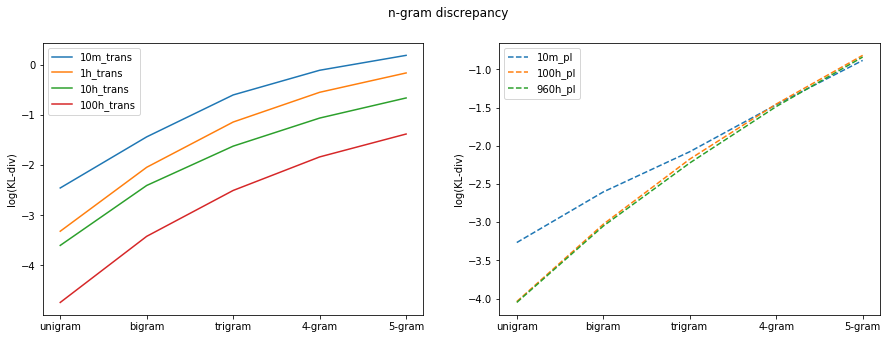

In [196]:
legend = [
    '10m_trans',
    '1h_trans',
    '10h_trans',
    '100h_trans',
    '10m_pl',
    '100h_pl',
    '960h_pl',
]

formats = ['b-', 'r-', 'b--', 'r--', 'g--']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        
for i in range(4):
    x = np.array(range(1,6), dtype=np.int)
    y = kl_div_value[i]
    y = [np.log10(i) for i in y]
    axes[0].plot(x, y, label=legend[i]) 
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(['unigram', 'bigram', 'trigram', '4-gram', '5-gram'])

    axes[0].set_ylabel('log(KL-div)')
    axes[0].legend()
    
    
for i in range(4,7):
    x = np.array(range(1,6), dtype=np.int)
    y = kl_div_value[i]
    y = [np.log10(i) for i in y]
    axes[1].plot(x, y, '--', label=legend[i]) 
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(['unigram', 'bigram', 'trigram', '4-gram', '5-gram'])

    axes[1].set_ylabel('log(KL-div)')
    axes[1].legend()

    
fig.suptitle('n-gram discrepancy')

Text(0.5, 0.98, 'word coverage')

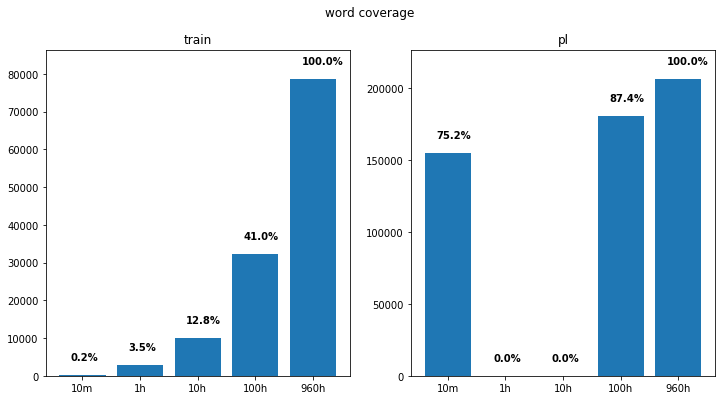

In [197]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, part2 in enumerate(["train", "pl"]):
    y = []
    for part1 in ["10m", "1h", "10h", "100h", "960h"]:
        part = part1 + '_' + part2
        total = 0
        if part1 in ["1h", "10h"]:
            if part2 == "train":
                total = len(new_word_dict[part1])
        else:
            for _, v in words_cnt.items():
                if v[part] > 0:
                    total += 1
        y.append(total)
    
    x = range(5)
    axes[i].bar(x, y) 
    for xx, yy in enumerate(y):
        axes[i].text(xx - 0.2, yy + y[-1]/20, str(
            (1000 * int(yy) // y[-1]) / 10) + '%', color='black', fontweight='bold')
        
    axes[i].set_title(part2) 
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(["10m", "1h", "10h", "100h", "960h"])
    axes[i].set_ylim(0, y[-1] * 1.1)


fig.suptitle('word coverage')
    

In [198]:
a = (1,2)
(b,c) = a
print(b)
print(c)

1
2


In [21]:
import operator
import os
import unicodedata

def get_dict(filenames):
    lexicon = {}
    for filename in filenames:
        gram1_started = False
        with open(filename, "r") as arpa:
            for line in arpa:
                if "2-grams:" in line:
                    break
                if gram1_started:
                    linesplit = line.split()
                    if len(linesplit) < 2:
                        continue
                    ngram = linesplit[1].strip()
                    prob = float(linesplit[0])
                    if ngram == "<unk>" or ngram == "<s>" or ngram == "</s>":
                        continue
                    lexicon[ngram] = prob
                elif "1-grams:" in line:
                    gram1_started = True
    return lexicon


def get_tokens(filename):
    tkns = {}
    with open(filename, "r") as f:
        for line in f:
            tkns[line.strip()] = True
    return tkns


def arpa_to_lexicon(lang):
    gb_lm_tmp = "/private/home/vineelkpratap/scratch/{}/gb_lm.arpa".format(lang)
    trans_lm_tmp = "/private/home/vineelkpratap/scratch/{}/train_lm.arpa".format(lang)
    tknpath_tmp = "/checkpoint/vineelkpratap/data/mls/{}/grapheme.tokens".format(lang)
    outpath_tmp = "/private/home/qiantong/mls/lexicon_{}_trans.txt".format(lang)

#     lexicon = get_dict([gb_lm_tmp, trans_lm_tmp])
    lexicon = get_dict([trans_lm_tmp])
    print("Number of words: ", len(lexicon), flush=True)
    tokens = get_tokens(tknpath_tmp)
    print("Number of tokens : ", len(tokens), flush=True)

    print("Writing lexicon files to ", outpath_tmp, flush=True)
    with open(outpath_tmp, "w") as f:
        for word, _ in sorted(lexicon.items(), key=operator.itemgetter(1)):
            nrml_word = unicodedata.normalize("NFKC", word)
            cur_tokens = []
            for t in nrml_word:
                if t in tokens:
                    cur_tokens.append(t)

            if len(cur_tokens) == 0:
                continue
            f.write(word + "\t" + " ".join(cur_tokens) + " |\n")


In [22]:
languages = [
    "English",
    "German",
    "Dutch",
    "French",
    "Spanish",
    "Italian",
    "Portuguese",
    "Polish",
]

for lang in languages:
    print(" --- {} --- ".format(lang))
    arpa_to_lexicon(lang)

 --- English --- 
Number of words:  1034500
Number of tokens :  29
Writing lexicon files to  /private/home/qiantong/mls/lexicon_English_trans.txt
 --- German --- 
Number of words:  304699
Number of tokens :  33
Writing lexicon files to  /private/home/qiantong/mls/lexicon_German_trans.txt
 --- Dutch --- 
Number of words:  203188
Number of tokens :  45
Writing lexicon files to  /private/home/qiantong/mls/lexicon_Dutch_trans.txt
 --- French --- 
Number of words:  149286
Number of tokens :  45
Writing lexicon files to  /private/home/qiantong/mls/lexicon_French_trans.txt
 --- Spanish --- 
Number of words:  195102
Number of tokens :  36
Writing lexicon files to  /private/home/qiantong/mls/lexicon_Spanish_trans.txt
 --- Italian --- 
Number of words:  89849
Number of tokens :  39
Writing lexicon files to  /private/home/qiantong/mls/lexicon_Italian_trans.txt
 --- Portuguese --- 
Number of words:  75392
Number of tokens :  43
Writing lexicon files to  /private/home/qiantong/mls/lexicon_Portugues

In [23]:
for l in languages:
    with open("/private/home/qiantong/mls/lexicon_{}_join.txt".format(l)) as f:
        lines = f.readlines()
        print(len(lines))

4478210
1298484
635420
937585
560050
711420
396687
122557


In [28]:
datadir="/checkpoint/jacobkahn/data/lists/librispeech/"
# train="train-clean-100.lst,train-clean-360.lst,train-other-500.lst"
train="train-clean-100.lst"

max_d = 0
for ff in train.split(','):
    with open(datadir + ff) as f:
        for line in f:
            sp = line.strip().split()
            max_d = max(max_d, float(sp[2]))
#             print(sp)
#             break
print(max_d)

24525.0


In [27]:
print(max_d)

29735.0


In [32]:
with open('/private/home/qiantong/wav2letter_experiments/256_GPU/join_train_filtered.lst') as f:
    with open('/private/home/qiantong/wav2letter_experiments/256_GPU/join_train_notl_maxlen.25s.lst', 'w') as fout:
        for line in f:
            if "tedlium" in line:
                continue
            sp = line.split('\t')
            duration = float(sp[2])
            if duration > 25000:
                print(line)
                continue
            fout.write(line)

train-clean-360-3972-170212-0014	/datasets01/librispeech/062419/train-clean-360/3972/170212/3972-170212-0014.flac	26205.0	not unfrequently the shepherd was startled by the blare of trumpets and peering out beheld a cohort sometimes a legion in march and when the glittering crests were gone and the excitement incident to the intrusion over he bent himself to evolve the meaning of the eagles and gilded globes of the soldiery and the charm of a life so the opposite of his own yet these men rude and simple as they were had a knowledge and a wisdom of their own

train-clean-360-5239-32139-0047	/datasets01/librispeech/062419/train-clean-360/5239/32139/5239-32139-0047.flac	27140.0	there can be little doubt that a fair skinned light haired bearded race holding the religion which plato says prevailed in atlantis carried an atlantean civilization at an early day up the valley of the amazon to the heights of bolivia and peru precisely as a similar emigration of aryans went westward to the shores 

In [ ]:
lists = "/checkpoint/jacobkahn/data/lists/librispeech/train-clean-100.lst,/checkpoint/jacobkahn/data/lists/librispeech/train-clean-360.lst,/checkpoint/jacobkahn/data/lists/librispeech/train-other-500.lst,/checkpoint/wav2letter/data/swbd_lists/noNL/switchboard.16khz.lst,/checkpoint/wav2letter/data/swbd_lists/noNL/fisher.16khz.lst,/checkpoint/wav2letter/data/commonvoice/lists/train.lst,/checkpoint/qiantong/wsj/si284.lst"

with open('/private/home/qiantong/wav2letter_experiments/256_GPU/join_train_notl_maxlen.25s.lst', 'w') as fout:
    for lst in lists.split(','):
        with open(lst) as f:
            for line in f:
                if "tedlium" in line:
                    continue
                sp = line.strip().split('\t')
                if len(sp) == 1:
                    sp = line.strip().split()
                    
                if len(sp) == 3:
                    print(line)
                    continue
                duration = float(sp[2])
                if duration > 25000:
                    print(line)
                    continue
                fout.write(line)

In [36]:
with open('/private/home/qiantong/wav2letter_experiments/256_GPU/join_train_filtered.lst') as f:
    with open('/private/home/qiantong/wav2letter_experiments/256_GPU/join_train_notl_maxlen.25s.lst', 'w') as fout:
        for line in f:
            if "tedlium" in line:
                continue
            sp = line.split('\t')
            
                    
            if len(sp) == 3:
                print(line)
                continue
            duration = float(sp[2])
            if duration > 25000:
                print(line)
                continue
            fout.write(line)

train-clean-360-3972-170212-0014	/datasets01/librispeech/062419/train-clean-360/3972/170212/3972-170212-0014.flac	26205.0	not unfrequently the shepherd was startled by the blare of trumpets and peering out beheld a cohort sometimes a legion in march and when the glittering crests were gone and the excitement incident to the intrusion over he bent himself to evolve the meaning of the eagles and gilded globes of the soldiery and the charm of a life so the opposite of his own yet these men rude and simple as they were had a knowledge and a wisdom of their own

train-clean-360-5239-32139-0047	/datasets01/librispeech/062419/train-clean-360/5239/32139/5239-32139-0047.flac	27140.0	there can be little doubt that a fair skinned light haired bearded race holding the religion which plato says prevailed in atlantis carried an atlantean civilization at an early day up the valley of the amazon to the heights of bolivia and peru precisely as a similar emigration of aryans went westward to the shores 

In [40]:
rootdir = "/checkpoint/jacobkahn/data/lists/librispeech/"
lists = "train-clean-100.lst,train-clean-360.lst,train-other-500.lst"

with open('/private/home/qiantong/wav2letter_experiments/joint_asr_lm/ls_960h_25s.lst', 'w') as fout:
    for ll in lists.split(','):
        with open(rootdir + ll) as f:
            for line in f:
                sp = line.split()
                duration = float(sp[2])
                if duration > 25000:
                    print(line)
                    continue
                fout.write(line)

train-clean-360-2929-85685-0079 /datasets01/librispeech/062419/train-clean-360/2929/85685/2929-85685-0079.flac 29735.0 it will be forced to develop the autonomy of its rational middle class in the struggles that will render these compromises possible and it will be finally not imperial german ideas but central european ideas possibly more akin to swiss conceptions a civilized republicanism finding its clearest expression in the french language that will be established upon a bilingual basis throughout western europe and increasingly predominant over the whole european mainland and the mediterranean basin as the twentieth century closes

train-clean-360-3972-170212-0014 /datasets01/librispeech/062419/train-clean-360/3972/170212/3972-170212-0014.flac 26205.0 not unfrequently the shepherd was startled by the blare of trumpets and peering out beheld a cohort sometimes a legion in march and when the glittering crests were gone and the excitement incident to the intrusion over he bent himsel

In [8]:
wps_path = "/checkpoint/antares/wav2letter/recipes/models/seq2seq_tds/librispeech/am/librispeech-train-all-unigram-10000.tokens"
# lexicon_path = "/checkpoint/antares/wav2letter/recipes/models/seq2seq_tds/librispeech/am/librispeech-train+dev-unigram-10000-nbest10.lexicon"
lexicon_path = "/checkpoint/antares/wav2letter/recipes/models/seq2seq_tds/librispeech/am/gutenberg-400k-unigram-10000-nbest1.lexicon"

with open(wps_path) as f:
    wps = set([])
    for line in f:
        wps.add(line.strip())
    print("wps", len(wps))
    
with open(lexicon_path) as f:
    lexicon = {}
    for line in f:
        sp = line.split()
        word = sp[0]
#         for wp in sp[1:]:
#             if wp not in wps:
#                 print(wp)
#                 break
        spell = ' '.join(sp[1:])
        if word in lexicon:
            continue
        lexicon[word] = spell
    print("lexicon", len(lexicon))
        

wps 9997
lexicon 395035


In [11]:
root = "/private/home/qiantong/CAPIO_LM/data/librispeech/"
parts = ["train.txt", "dev.txt"]

for part in parts:
    with open(root + part) as f, open(root + "wp_" + part, 'w') as fout:
        for line in f:
            out_line = []
            for word in line.strip().split():
                if word in lexicon:
                    out_line.append(lexicon[word])
                else:
                    spell = ' '.join(list(word))
                    out_line.append('_' + spell)
            fout.write(' '.join(out_line) + '\n')

## Vision Curves

In [43]:
import numpy as np                                                             
import os
import sys
import matplotlib.pyplot as plt

root = "/checkpoint/qiantong/fl_experiments/vision_tr/"

def plot(jobs, print_train=True):
    fig, ax = plt.subplots(figsize=(15,5))
    
    with open('/checkpoint/gab/experiments/35484148/log.txt') as f:
        x = list(range(int(300)))
        if print_train:
            x = [int(i * 12.5) for i in x]
        y = []
        y_train = []
        for line in f:
            dic = eval(line)
            y.append(dic["test_acc1"])
            y_train.append(dic["train_loss"])
        ax.plot(x, y_train, 'k')
        ax.plot(x, y, 'k--', label="deit_base" + ": " + str(max(y)))

    for job in jobs:
        job_name = job[0]
        job_color = job[1]

        train_x = []
        train_y = []
        dev_x = []
        dev_y = []

        cnt = 0
        with open(root + job_name + "/qiantong.err") as f:
            for line in f:
                if not "Epoch" in line:
                    continue

                cnt += 1

                if "Validation Top1 Error (%):" in line:
                    valid_acc = float(line.split(":")[-1].strip())
                    dev_x.append(cnt)
                    dev_y.append(valid_acc)
                    continue

                train_acc = float(line.split(":")[-5].strip())
                train_x.append(cnt)
                train_y.append(train_acc)
        if print_train:
            ax.plot(train_x, train_y, job_color)
        else:
            dev_x = list(range(len(dev_x)))
            
            
        max_y = max(dev_y)
        ax.plot(dev_x, dev_y, job_color + '--', label=job_name + ": " + str(max_y))
    ax.legend()

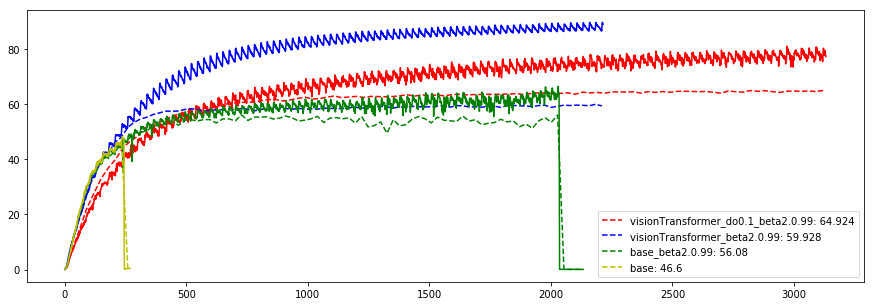

In [109]:
jobs = [
    ("visionTransformer_do0.1_beta2.0.99", 'r'), ## acc = 65%
    ("visionTransformer_beta2.0.99", 'b'),
    ("base_beta2.0.99", 'g'),
    ("base", 'y'),
]

plot(jobs)

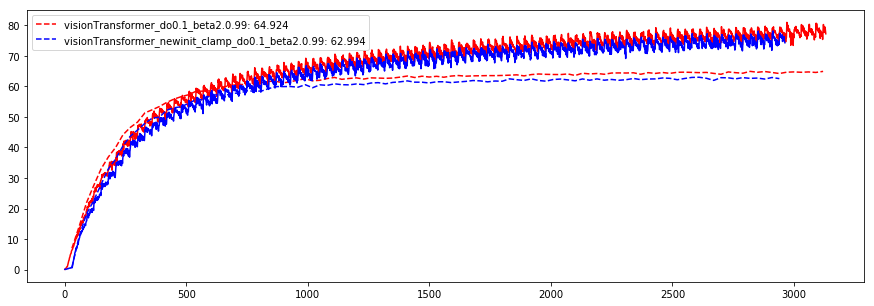

In [110]:
jobs = [
    ("visionTransformer_do0.1_beta2.0.99", 'r'),
    ## trunc_normal (mean=0, std=.02, min=-2., max=2)
    ## 1. trunc_normal linear
    ## 2. trunc_normal pos_emb + class_token
    ## 3. 0 bias in transformer k,q,v
    ## 4. dropout after pos_emb
    ("visionTransformer_newinit_clamp_do0.1_beta2.0.99", 'b'), 
] 

plot(jobs)

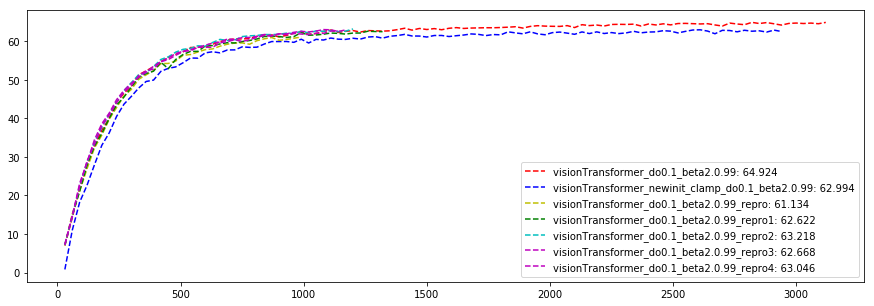

In [111]:
jobs = [
    ("visionTransformer_do0.1_beta2.0.99", 'r'),
    ("visionTransformer_newinit_clamp_do0.1_beta2.0.99", 'b'), 
    
    
    ("visionTransformer_do0.1_beta2.0.99_repro", 'y'), # - linear trunc_normal
    ("visionTransformer_do0.1_beta2.0.99_repro1", 'g'), # - pos_emb trunc_normal
    ("visionTransformer_do0.1_beta2.0.99_repro2", 'c'), # - pos_emb drop
    ("visionTransformer_do0.1_beta2.0.99_repro3", 'm'), # - bias
    ("visionTransformer_do0.1_beta2.0.99_repro4", 'm'),
] 

plot(jobs,False)

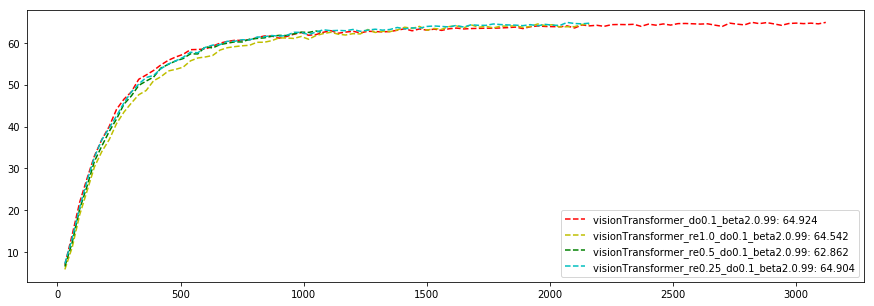

In [112]:
jobs = [
    ("visionTransformer_do0.1_beta2.0.99", 'r'),    
    
    ("visionTransformer_re1.0_do0.1_beta2.0.99", 'y'),
    ("visionTransformer_re0.5_do0.1_beta2.0.99", 'g'),
    ("visionTransformer_re0.25_do0.1_beta2.0.99", 'c'),
]

plot(jobs, False)

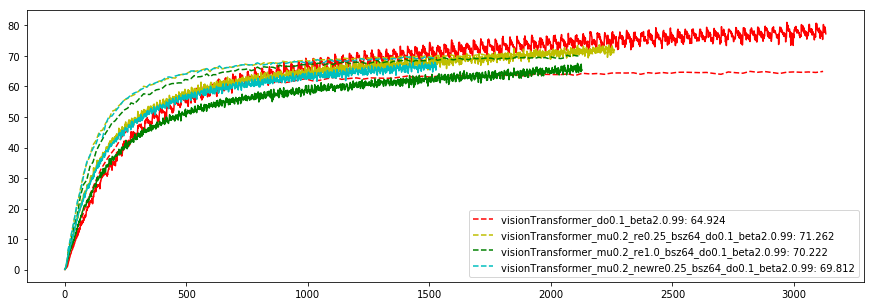

In [113]:
jobs = [
    ("visionTransformer_do0.1_beta2.0.99", 'r'),    
    
    ("visionTransformer_mu0.2_re0.25_bsz64_do0.1_beta2.0.99", 'y'),
    ("visionTransformer_mu0.2_re1.0_bsz64_do0.1_beta2.0.99", 'g'),
    
    ("visionTransformer_mu0.2_newre0.25_bsz64_do0.1_beta2.0.99", 'c')
] 

plot(jobs)

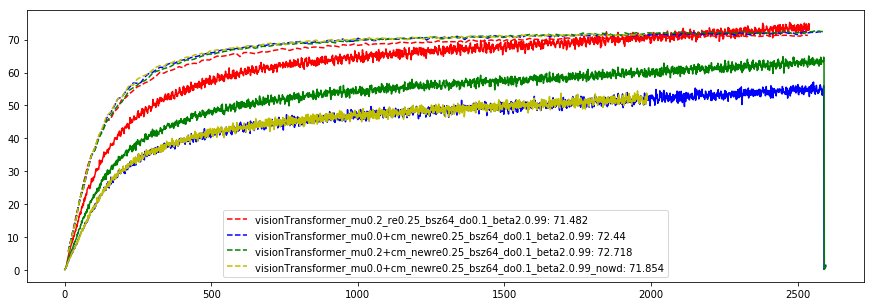

In [147]:
jobs = [
    ("visionTransformer_mu0.2_re0.25_bsz64_do0.1_beta2.0.99", 'r'),
    ("visionTransformer_mu0.0+cm_newre0.25_bsz64_do0.1_beta2.0.99", 'b'),
    
    ("visionTransformer_mu0.2+cm_newre0.25_bsz64_do0.1_beta2.0.99", 'g'),
#     ("visionTransformer_mu0.2+cm_newre0.25_bsz64_beta2.0.99_ld0", 'c'),
#     ("visionTransformer_mu0.2+cm_newre0.25_bsz64_beta2.0.99", 'm'),
    ("visionTransformer_mu0.0+cm_newre0.25_bsz64_do0.1_beta2.0.99_nowd", 'y')
] 

plot(jobs)

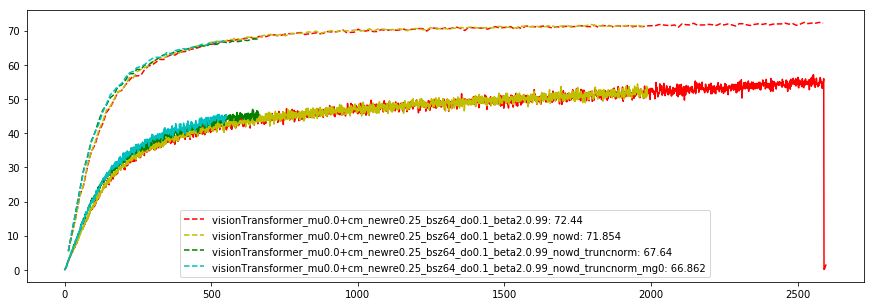

In [148]:
jobs = [
    ("visionTransformer_mu0.0+cm_newre0.25_bsz64_do0.1_beta2.0.99", 'r'),
    
    ("visionTransformer_mu0.0+cm_newre0.25_bsz64_do0.1_beta2.0.99_nowd", 'y'),
    ("visionTransformer_mu0.0+cm_newre0.25_bsz64_do0.1_beta2.0.99_nowd_truncnorm", 'g'),
    ("visionTransformer_mu0.0+cm_newre0.25_bsz64_do0.1_beta2.0.99_nowd_truncnorm_mg0", 'c'),
] 
plot(jobs)

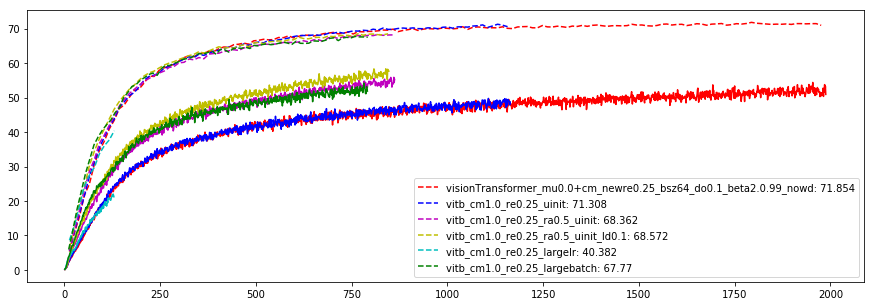

In [174]:
jobs = [
    ("visionTransformer_mu0.0+cm_newre0.25_bsz64_do0.1_beta2.0.99_nowd", 'r'),
    ("vitb_cm1.0_re0.25_uinit", 'b'),

    ("vitb_cm1.0_re0.25_ra0.5_uinit", 'm'),
    ("vitb_cm1.0_re0.25_ra0.5_uinit_ld0.1", 'y'),
    ("vitb_cm1.0_re0.25_largelr", 'c'),
    ("vitb_cm1.0_re0.25_largebatch", 'g'),
    
] 
plot(jobs)

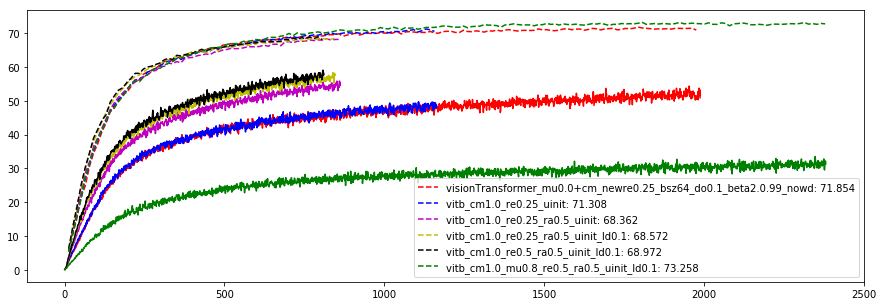

In [175]:
jobs = [
    ("visionTransformer_mu0.0+cm_newre0.25_bsz64_do0.1_beta2.0.99_nowd", 'r'),
    ("vitb_cm1.0_re0.25_uinit", 'b'),

    ("vitb_cm1.0_re0.25_ra0.5_uinit", 'm'),
    ("vitb_cm1.0_re0.25_ra0.5_uinit_ld0.1", 'y'),
    ("vitb_cm1.0_re0.5_ra0.5_uinit_ld0.1", 'k'),
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1", 'g'),
    
] 
plot(jobs)



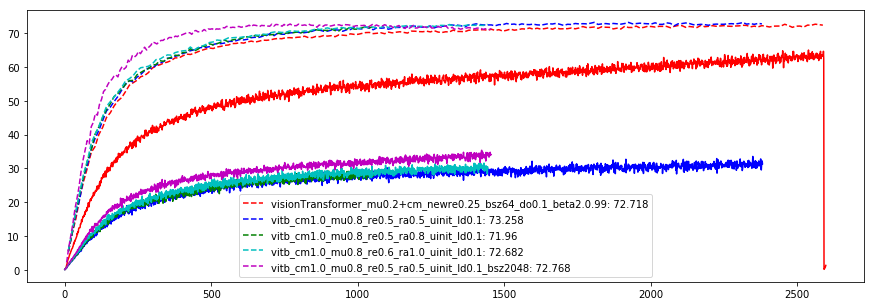

In [178]:
jobs = [
    ("visionTransformer_mu0.2+cm_newre0.25_bsz64_do0.1_beta2.0.99", 'r'),
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1", 'b'),

    ("vitb_cm1.0_mu0.8_re0.5_ra0.8_uinit_ld0.1", 'g'),
    ("vitb_cm1.0_mu0.8_re0.6_ra1.0_uinit_ld0.1", 'c'),
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1_bsz2048", 'm'),
] 
plot(jobs)

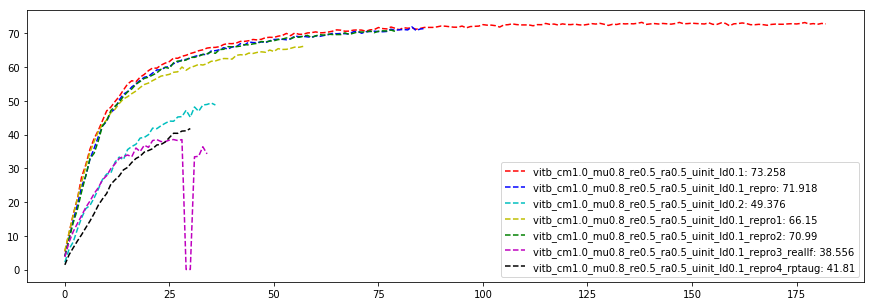

In [193]:
jobs = [
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1", 'r'),
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1_repro", 'b'),
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.2", 'c'),
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1_repro1", 'y'),
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1_repro2", 'g'),
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1_repro3_reallf", 'm'),
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1_repro4_rptaug", 'k'),
] 
# plot(jobs)
plot(jobs, False)

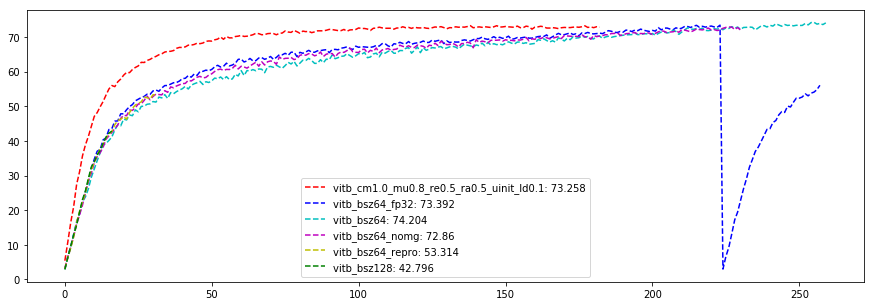

In [27]:
jobs = [
    ("vitb_cm1.0_mu0.8_re0.5_ra0.5_uinit_ld0.1", 'r'),
    ("vitb_bsz64_fp32", 'b'),
    
    ("vitb_bsz64", 'c'),
    ("vitb_bsz64_nomg", 'm'),
    ("vitb_bsz64_repro", 'y'),
    ("vitb_bsz128", 'g'),
#     ("vitb_bsz64_b299", 'y'),
#     ("vitb_bsz64_bias", 'y'),

] 
# plot(jobs)
plot(jobs, False)

In [114]:
import numpy as np                                                             
import os
import sys
import matplotlib.pyplot as plt

root = "/checkpoint/qiantong/fl_experiments/vision_tr/"

def plot(jobs, baseline="vitb"):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,15))

    for job in jobs:
        job_name = job[0]
        job_color = job[1]

        train_x = []
        train_y = []
        lr = []
        dev_x = []
        dev_y = []

        cnt = 0
        with open(root + job_name + "/qiantong.err") as f:
            for line in f:
                if not "Epoch" in line:
                    continue

                cnt += 1

                if "Validation Top1 Error (%):" in line:
                    valid_acc = float(line.split(":")[-1].strip())
                    dev_x.append(cnt)
                    dev_y.append(valid_acc)
                    continue

                train_acc = float(line.split(":")[-5].strip())
                train_x.append(cnt)
                train_y.append(train_acc)
                lr.append(float(line.split(":")[-7].strip()))

            ax1.plot(train_x, train_y, job_color, label=job_name)
            ax2.plot(train_x, lr, job_color, label=job_name)
            dev_x = list(range(len(dev_x)))
            
            
        max_y = max(dev_y)
        ax3.plot(dev_x, dev_y, job_color + '--', label=job_name + ": " + str(max_y))
    
    baseline_map = {
        "vitb" : '/checkpoint/gab/experiments/35484148/log.txt',
        "vits" : '/checkpoint/qiantong/experiments/36188077/log.txt',
        "vitt" : '/checkpoint/qiantong/experiments/36188965/log.txt',
    }
    
    with open(baseline_map[baseline]) as f:
        lines = f.readlines()
        N = len(lines)
        x = list(range(int(300)))
        y = []
        y_train = []
        lr = []
        for line in lines:
            dic = eval(line)
            y.append(dic["test_acc1"])
            y_train.append(dic["train_loss"])
            lr.append(dic["train_lr"])
        ax1.plot([int(i * 13) for i in x], y_train, 'k', label="pytorch_deit_base")
        ax2.plot([int(i * 13) for i in x], lr, 'k', label="pytorch_deit_base")
        ax3.plot([i for i in x], y, 'k--', label="pytorch_deit_base" + ": " + str(max(y)))
        
    ax1.legend()   
    ax1.set_xlabel('updates')
    ax1.set_ylabel('train loss')

    ax2.legend()
    ax2.set_xlabel('updates')
    ax2.set_ylabel('lr')

    ax3.legend()
    ax3.set_xlabel('epoch')
    ax3.set_ylabel('test acc')

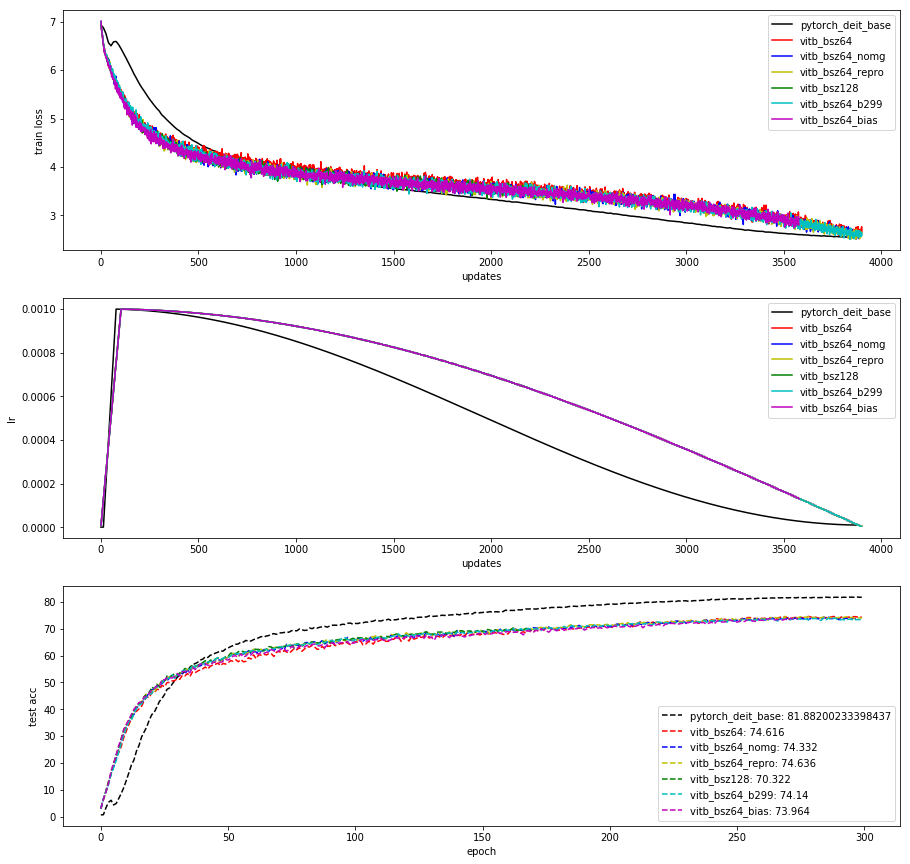

In [155]:
jobs = [
    ("vitb_bsz64", 'r'),
    ("vitb_bsz64_nomg", 'b'),
    
    ("vitb_bsz64_repro", 'y'),
    ("vitb_bsz128", 'g'),
    ("vitb_bsz64_b299", 'c'),
    ("vitb_bsz64_bias", 'm'),
#     ("vitb_bsz64_bias_tn", 'k'),
] 
plot(jobs)


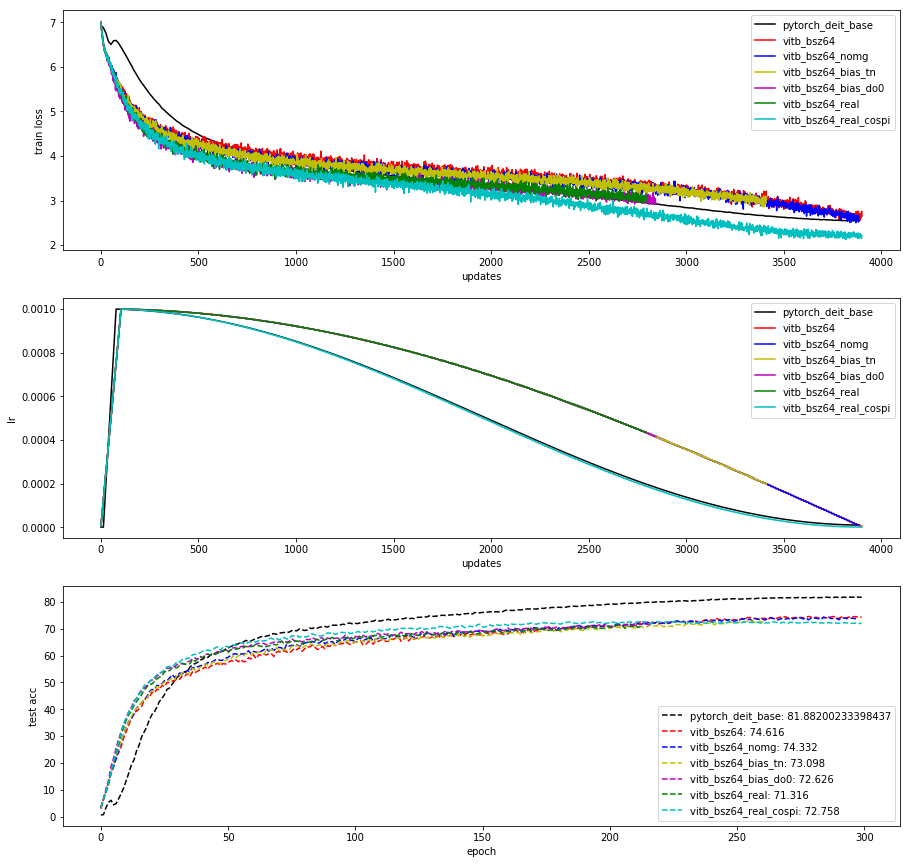

In [248]:
jobs = [
    ("vitb_bsz64", 'r'),
    ("vitb_bsz64_nomg", 'b'),
    
    ("vitb_bsz64_bias_tn", 'y'),
    ("vitb_bsz64_bias_do0", 'm'),
    ("vitb_bsz64_real", 'g'),
    ("vitb_bsz64_real_cospi", 'c'),
] 
plot(jobs)

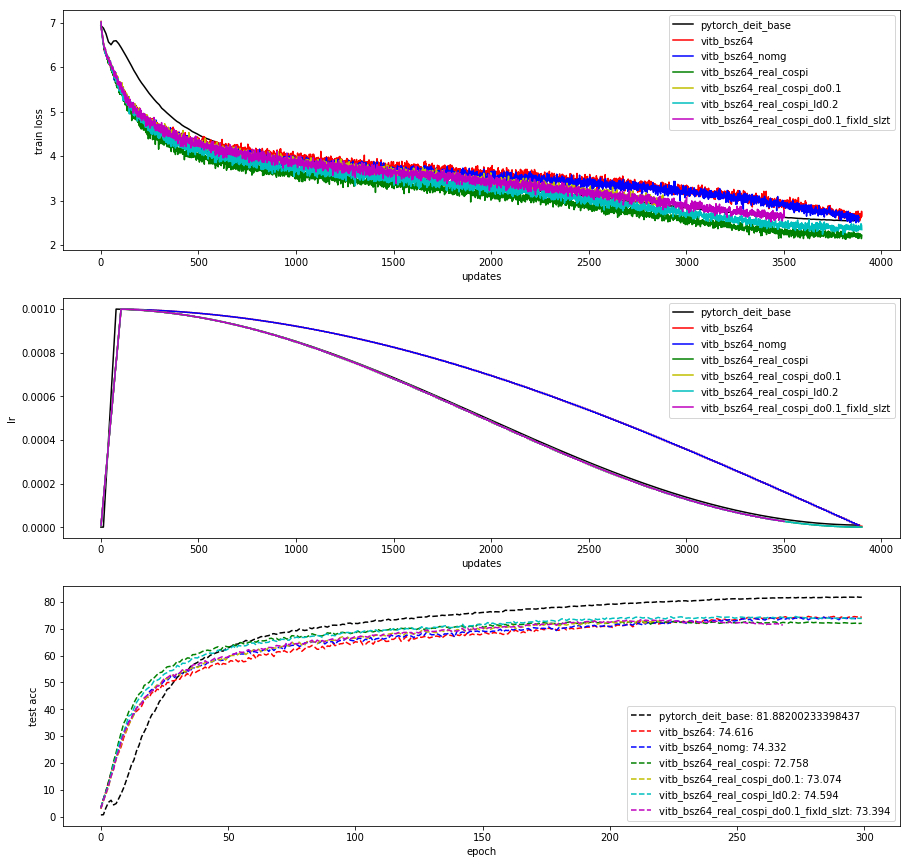

In [258]:
jobs = [
    ("vitb_bsz64", 'r'),
    ("vitb_bsz64_nomg", 'b'),
    
    ("vitb_bsz64_real_cospi", 'g'),
    ("vitb_bsz64_real_cospi_do0.1", 'y'),
    ("vitb_bsz64_real_cospi_ld0.2", 'c'),
    ("vitb_bsz64_real_cospi_do0.1_fixld_slzt", 'm'),
] 
plot(jobs)

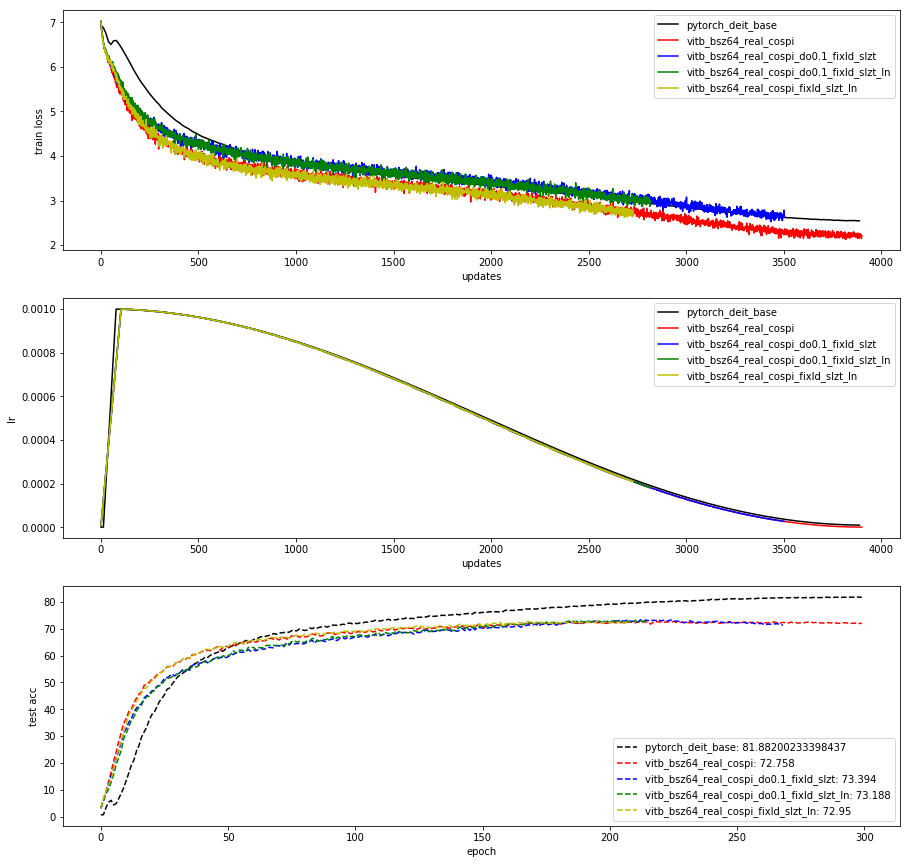

In [250]:
jobs = [
    ("vitb_bsz64_real_cospi", 'r'),
    ("vitb_bsz64_real_cospi_do0.1_fixld_slzt", 'b'),
    
    ("vitb_bsz64_real_cospi_do0.1_fixld_slzt_ln", 'g'),
    ("vitb_bsz64_real_cospi_fixld_slzt_ln", 'y'),

] 
plot(jobs)

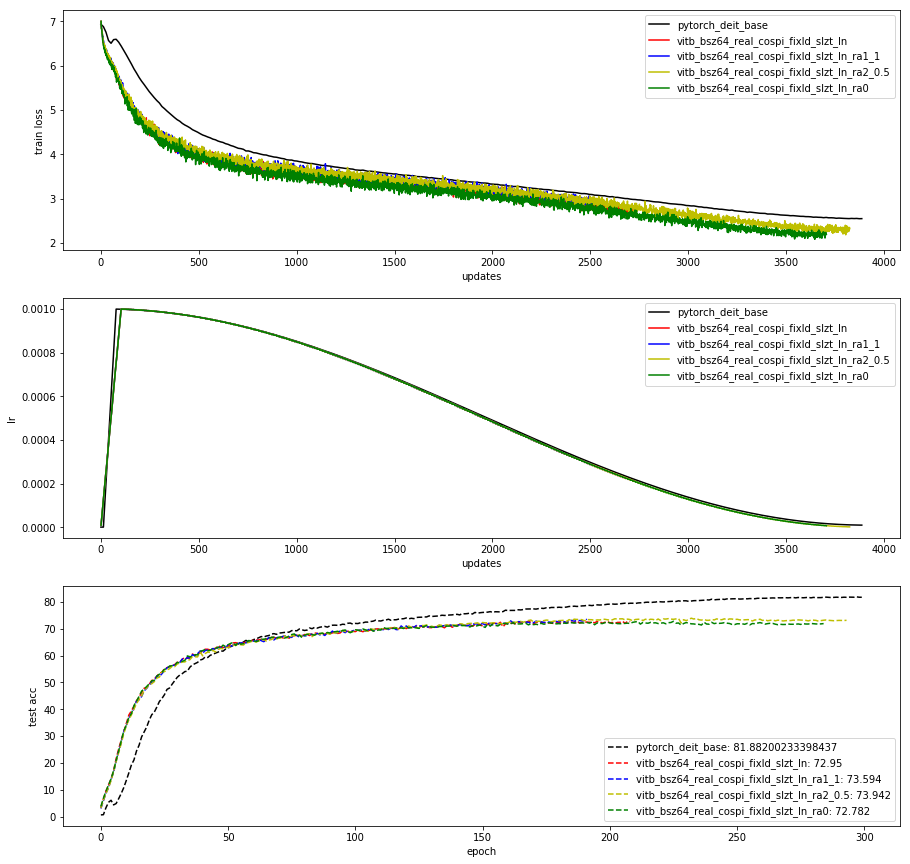

In [251]:
jobs = [
    ("vitb_bsz64_real_cospi_fixld_slzt_ln", 'r'),
    
    ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra1_1", 'b'),
    ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra2_0.5", 'y'),
    ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra0", 'g'),
#     ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra1_1_newln", 'm'),
#     ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra2_0.5_newld_repaug", 'c'),
#     ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra1_1_newld_repaug1", 'k'),
] 
plot(jobs)

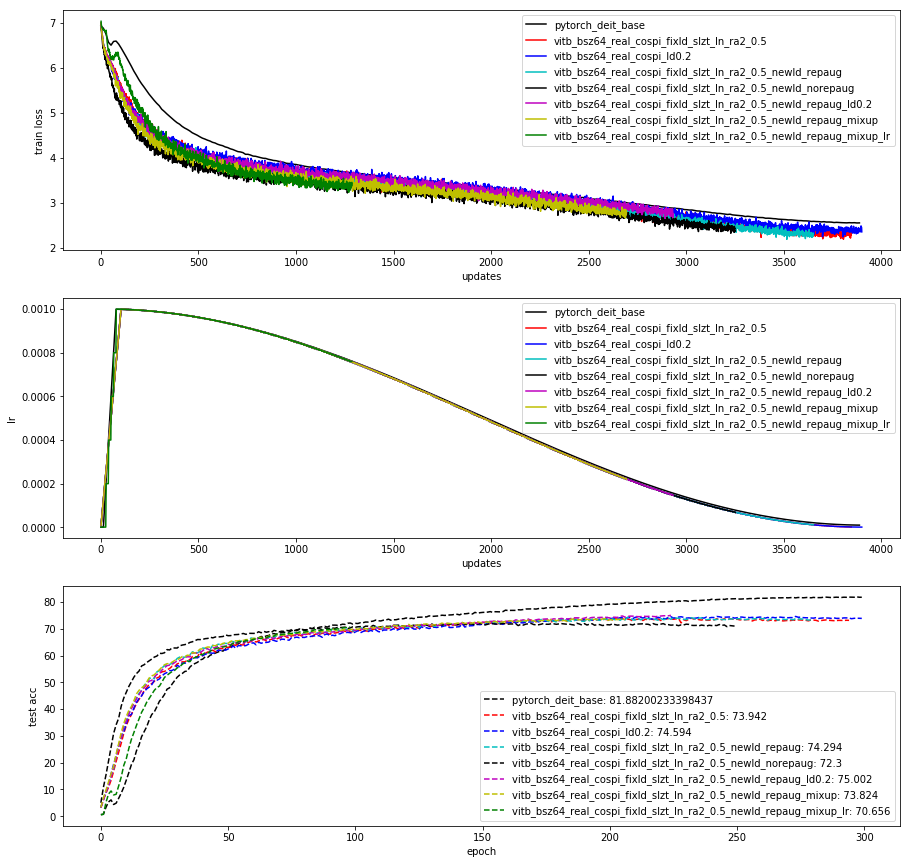

In [294]:
jobs = [
    ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra2_0.5", 'r'),
    ("vitb_bsz64_real_cospi_ld0.2", 'b'),
    
    ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra2_0.5_newld_repaug", 'c'),
    ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra2_0.5_newld_norepaug", 'k'),
    ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra2_0.5_newld_repaug_ld0.2", 'm'),
    ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra2_0.5_newld_repaug_mixup", 'y'),
    ("vitb_bsz64_real_cospi_fixld_slzt_ln_ra2_0.5_newld_repaug_mixup_lr", 'g'),
] 
plot(jobs)

In [2214]:
import numpy as np                                                             
import os
import sys
import matplotlib.pyplot as plt

root = "/checkpoint/qiantong/fl_experiments/vision_tr/"

def plot(jobs, baseline="vitb"):
#     fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,15))
    fig, (ax1, ax3) = plt.subplots(2, figsize=(15,10))

    for job in jobs:
        job_name = job[0]
        job_color = job[1]

        train_x = []
        train_y = []
        lr = []
        dev_x = []
        dev_y = []

        cnt = 0
        with open(root + job_name + "/qiantong.err") as f:
            for line in f:
                if not "Epoch" in line:
                    continue


                if "Validation Top1 Error (%):" in line:
                    valid_acc = float(line.split(":")[-1].strip())
                    dev_x.append(cnt)
                    dev_y.append(valid_acc)
                    continue

                train_acc = float(line.split(":")[20].strip())
                train_x.append(cnt)
                train_y.append(train_acc)
                lr.append(float(line.split(":")[18].strip()))

                cnt += 1
                
            ax1.plot(train_x, train_y, job_color, label=job_name)
            for i in range(len(train_x)):
                if i % 24 == 0:
                    ax1.axvline(i, 0, 7, c='gray', linewidth=0.5)

#             ax2.plot(train_x, lr, job_color, label=job_name)
            dev_x = list(range(len(dev_x)))
            
            
        max_y = max(dev_y)
        ax3.plot(dev_x, dev_y, job_color + '--', label=job_name + ": " + str(max_y))
    
    baseline_map = {
        "vitb" : '/checkpoint/gab/experiments/35484148/log.txt',
        "vitb_repro" : '/checkpoint/qiantong/experiments/37655732/log.txt',
        "vitb_diffseed" : '/checkpoint/qiantong/experiments/38200366/log.txt',
        "vitb_diffseed1" : '/checkpoint/qiantong/experiments/38270325/log.txt',
        "vitb_diffseed2" : '/checkpoint/qiantong/experiments/38286921/log.txt',
        "vits" : '/checkpoint/qiantong/experiments/36618459/log.txt',
        "vitt" : '/checkpoint/qiantong/experiments/36618460/log.txt',
        "vitt_diffseed" : '/checkpoint/qiantong/experiments/38343279/log.txt',
        "vitt_nore_noregaug" : '/checkpoint/qiantong/experiments/38617411/log.txt',
        "noaug": '/checkpoint/qiantong/experiments/36264140/log.txt',
        "noaug+mix": '/checkpoint/qiantong/experiments/36737114/log.txt',
        "noaug+re": '/checkpoint/qiantong/experiments/36737115/log.txt',
        "noaug+re0": '/checkpoint/qiantong/experiments/36887799/log.txt',
        "noaug+re0.5": '/checkpoint/qiantong/experiments/36887800/log.txt',
        "noaug+ra": '/checkpoint/qiantong/experiments/36737116/log.txt',
#         "noaug+repaug": '/checkpoint/qiantong/experiments/36240218/log.txt',
        "noaug+repaug": '/checkpoint/qiantong/experiments/36341360/log.txt',
        "noaug+repaug+mix": '/checkpoint/qiantong/experiments/36296876/log.txt',
        "noaug+repaug+re": '/checkpoint/qiantong/experiments/36297222/log.txt',
        "noaug+repaug+ra": '/checkpoint/qiantong/experiments/36297223/log.txt',
        "noaug+mix+re": '/checkpoint/qiantong/experiments/37553453/log.txt',
        "noaug+mix+ra": '/checkpoint/qiantong/experiments/37553455/log.txt',
        "noaug+re+ra": '/checkpoint/qiantong/experiments/37553456/log.txt',

        "noaug+repaug+mix+re": '/checkpoint/qiantong/experiments/37589482/log.txt',
        "noaug+repaug+mix+ra": '/checkpoint/qiantong/experiments/37589487/log.txt',
        "noaug+repaug+re+ra": '/checkpoint/qiantong/experiments/37589488/log.txt',
        "noaug+mix+re+ra": '/checkpoint/qiantong/experiments/37589489/log.txt',
    }
    
    with open(baseline_map[baseline]) as f:
        lines = f.readlines()
        N = len(lines)
        x = list(range(N))
        y = []
        y_train = []
        lr = []
        for line in lines:
            dic = eval(line)
            y.append(dic["test_acc1"])
            y_train.append(dic["train_loss"])
            lr.append(dic["train_lr"])
        ax1.plot([int(11 + i * 12) for i in x], y_train, 'k', label="pytorch_deit_base")
#         ax2.plot([int(11 + i * 12) for i in x], lr, 'k', label="pytorch_deit_base")
        ax3.plot([i for i in x], y, 'k--', label="pytorch_deit_base" + ": " + str(max(y)))
        
    ax1.legend()   
    ax1.set_xlabel('updates')
    ax1.set_ylabel('train loss')

#     ax2.legend()
#     ax2.set_xlabel('updates')
#     ax2.set_ylabel('lr')

    ax3.legend()
    ax3.set_xlabel('epoch')
    ax3.set_ylabel('test acc')
#     ax3.set_ylim(60,85)

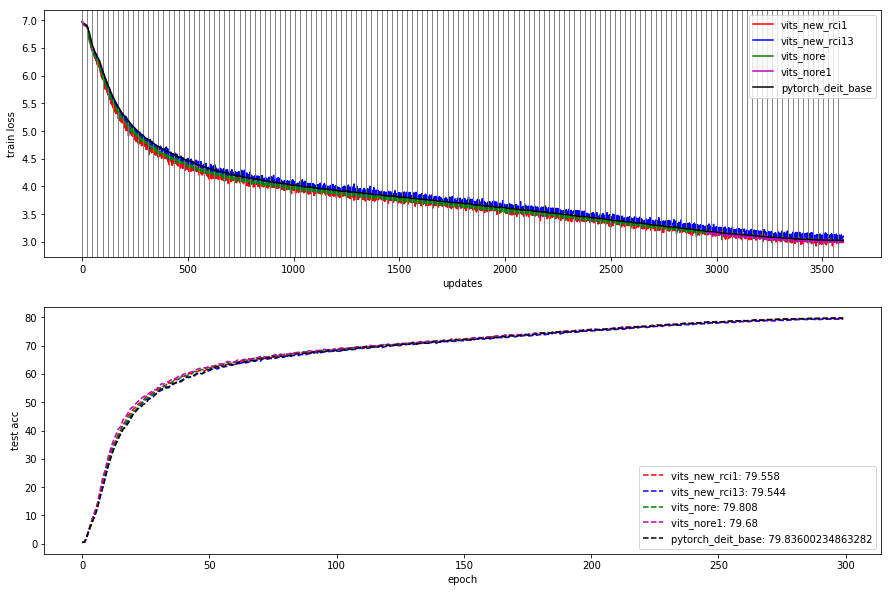

In [1740]:
jobs = [
#     ("vits_bsz64_swc1", 'r'),
#     ("vits_bsz64_new_test1", 'b'),
#     ("vits_bsz64_new_test2", 'c'),
#     ("vits_bsz64_new_test3", 'r'),
#     ("vits_bsz64_new_test4", 'r'),
#     ('vits_bsz64_new_test_do0.1', 'g'),
#     ('vits_new', 'r'),
#     ('vits_new_rci', 'r'),
    ('vits_new_rci1', 'r'),
#     ('vits_new_rci2', 'g'),
#     ('vits_new_rci7', 'b'),
#     ('vits_new_rci8', 'g'),
#     ('vits_new_rci9', 'c'),
    ('vits_new_rci13', 'b'),
#     ('vits_new_rci_tnstd0.01', 'g'),
    ('vits_nore', 'g'),
    ('vits_nore1', 'm'),
] 
plot(jobs, 'vits')

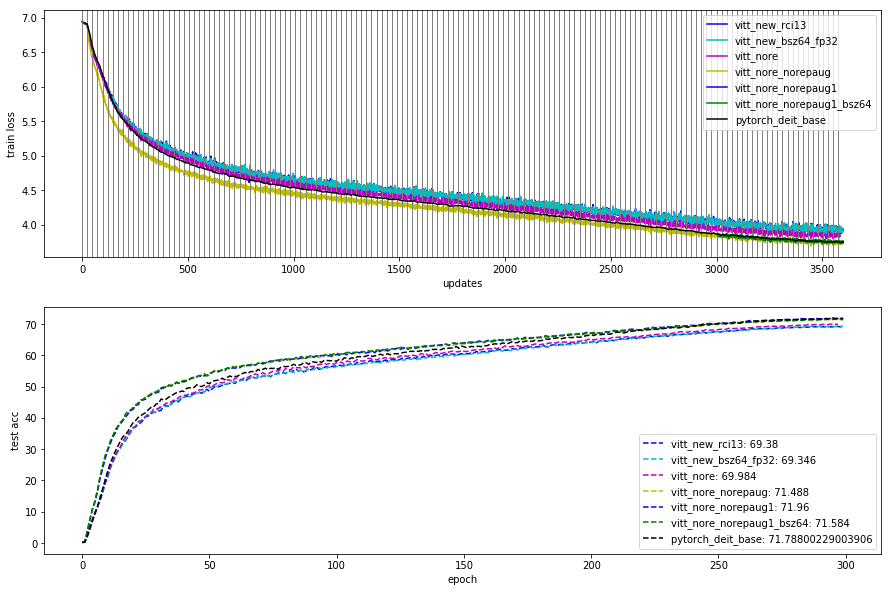

In [2249]:
jobs = [
#     ("vitt_bsz128", 'r'),
#     ("vitt_new_flinit", 'r'),
#     ("vitt_new_rci", 'r'),
#     ("vitt_new_rci1", 'c'),
#     ("vitt_new_rci2", 'y'),
#     ("vitt_new_rci3", 'm'),
#     ("vitt_new_rci7", 'b'),
#     ("vitt_new_rci8", 'g'),
#     ("vitt_new_rci9", 'c'),
    ("vitt_new_rci13", 'b'),
#     ("vitt_new_rci_tnstd0.01", 'g'),
    ("vitt_new_bsz64_fp32", 'c'),
#     ("vitt_new_bsz128_fp32", 'm'),
#     ("vitt_new1", 'g'),    
    ("vitt_nore", 'm'),    
    ("vitt_nore_norepaug", 'y'),    
    ("vitt_nore_norepaug1", 'b'),  
    ("vitt_nore_norepaug1_bsz64", 'g'),
#     ("vitt_newnew_noaug_bsz128", 'm'),
] 
plot(jobs, 'vitt')

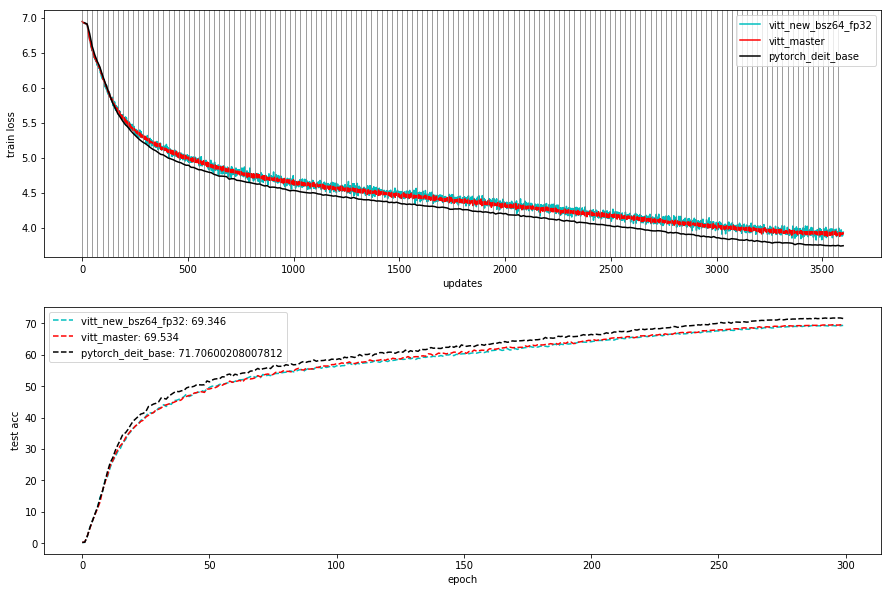

In [2074]:
jobs = [
    ("vitt_new_bsz64_fp32", 'c'),
#     ("vitt_newnew", 'b'),
#     ("vitt_newnew_master", 'r'),
    ("vitt_master", 'r'),
] 
plot(jobs, 'vitt_diffseed')

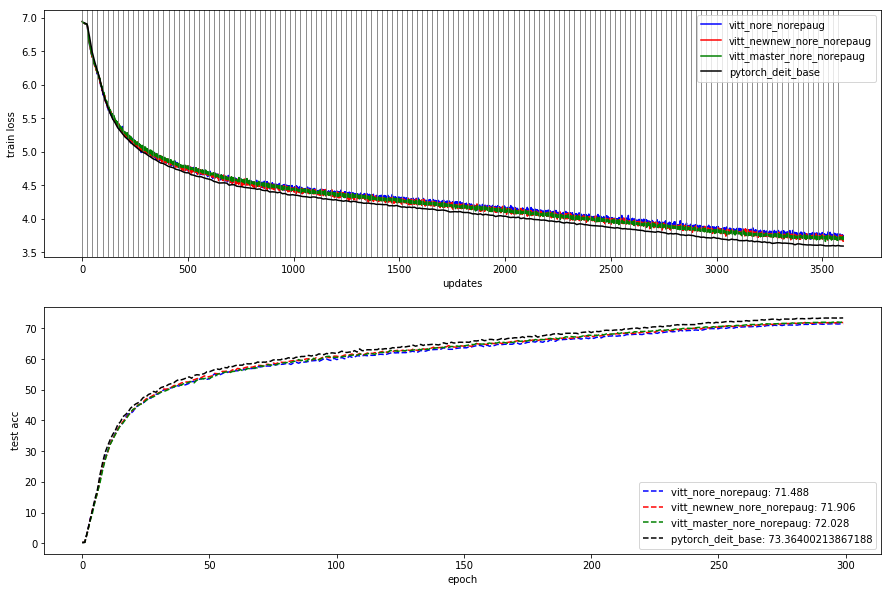

In [2216]:
jobs = [
    ("vitt_nore_norepaug", 'b'),
    ("vitt_newnew_nore_norepaug", 'r'),
    ("vitt_master_nore_norepaug", 'g'),
    
] 
plot(jobs, 'vitt_nore_noregaug')

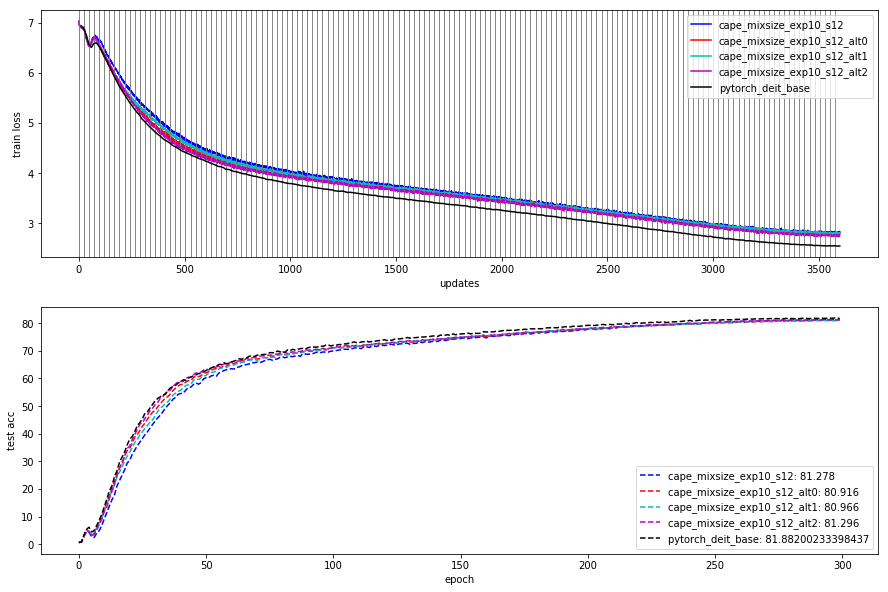

In [2248]:
jobs = [
#     ("vitb_bsz64_do0.1_new_test_newra_cm_re", 'r'),
#     ("vitb_bsz64_do0.1_new_test_newra_cm_re0.5", 'b'),
#     ("vitb_bsz64_new_test_newra_cm", 'b'),
#     ("vitb_bsz64_do0.1_new_test_newra_cm_nomix", 'b'),
#     ("vitb_bsz64_do0.1_new_test_newra_cm_nore", 'm'),
#     ("vitb_bsz64_do0.1_new_test_newra_cm_nora", 'y'),
#     ("vitb_bsz64_do0.1_new_test_newra_cm_re1", 'g'),
#     ("vitb_bsz64_do0.1_new_test_newra_cm_re0.5_scale", 'g'),
#     ("vitb_bsz64_new_test_newra1_cm_re0.5_scale", 'c'),
    
#     ("vitb_bsz64_do0.1_new_test_newra1_cm_re0.5_scale", 'm'),
#     ("vitb_new_do0.1_re0.5", 'r'),
#     ("vitb_new_do0.1_strong", 'b'),
#     ("vitb_new_strong", 'c'),
#     ("vitb_new_do0.1_ptinit", 'g'),
    
#     ("vitb_new_do0.1", 'r'),
#     ("vitb_new", 'b'),
#     ("vitb_new_do0.1_rci", 'r'),
#     ("vitb_new_rci", 'b'),
#     ("vitb_new_do0.1_rci1", 'g'),
#     ("vitb_new_rci1", 'r'),
#     ("vitb_new_do0.1_rci2", 'm'),
#     ("vitb_new_rci2", 'y'),
#     ("vitb_new_rci3", 'r'),
#     ("vitb_new_rci4", 'g'),
#     ("vitb_new_rci6", 'b'),
#     ("vitb_new_rci7", 'g'),
#     ("vitb_new_rci8", 'c'),
#     ("vitb_new_rci9", 'y'),
#     ("vitb_new_rci11", 'y'), ## PT weight + do0.1
#     ("vitb_new_rci12", 'b'), ## PT weight + do0
#     ("vitb_new_rci_norastd", 'c'),
    
#     ("vitb_new_do0.1_newgelu", 'c'),
#     ("vitb_new_do0.1_fp32", 'm'),
    
#     ("vitb_new_do0.1_ptinit1", 'g'),
    
#     ("vitb_new_rci5", 'r'), # 81.5
#     ("vitb_new_rci_tnstd0.01", 'm'), # 81.2
#     ("vitb_new_rci_seed42", 'g'),
#     ("vitb_new_rci_seed43", 'c'),
    
#     ("vitb_new_rci13", 'r'), ## FL weight + af_rand_seed
    
#     ("vitb_new_rci_seed41", 'b'),
#     ("vitb_new_rci_seed41_1", 'g'),
#     ("vitb_new_rci_seed41_2", 'm'),
#     ("vitb_new_rci_seed41_3", 'c'),
#     ('vitb_new_rci_seed41_transrand', 'y'),
#     ('vitb_new_rci_seed41_transrand_light', 'r'),
#     ('vitb_new_rci_seed41_transrand_light_mix', 'm'),
#     ('vitb_new_rci_seed41_ptind', 'b'),
#     ('vitb_new_rci_seed47_ptind', 'g'),
#     ('vitb_new_rci_seed47_ptind_harder', 'm'),
#     ('vitb_new_rci_seed47_ptind_lessreg', 'c'),
#     ('vitb_new_rci_seed47_ptind_do0.1', 'y'),
#     ('vitb_new_rci_seed47_ptind_ld0.12', 'm'),
#     ('vitb_new_rci_seed47_ptind_newmix', 'b'),
#     ('vitb_new_rci_seed47_ptind_ld0.2', 'y'),
#     ('vitb_new_rci_seed47_ptind_ld0.15', 'm'),
#     ('vitb_new_rci_seed47_ptind_newnew', 'm'),
#     ('vitb_new_rci_seed47_ptind_newnew1', 'c'),
    
    
#     ('vitb_master', 'r'),
#     ('vitb_master_neweq', 'b'),
#     ('vitb_master_th6', 'g'),
#     ('vitb_master_th6_lessra_seed47', 'r'),
#     ('vitb_master_th6_lessra_seed139', 'c'),
#     ('vitb_master_th6_lessra', 'y'),
    
#     ('vitb_master_s4399', 'b'),
#     ('vitb_master_s513', 'g'),
#     ('vitb_master_s139', 'c'),
#     ('vitb_master_s47', 'm'),
#     ('vitb_master_s47_new1', 'g'),
#     ('vitb_master_s47_new_eq', 'r'),
#     ('vitb_master_s47_new_rotate', 'b'),
#     ('vitb_master_s29_new_rotate', 'm'),
#     ('vitb_master_s47_new_rotate1', 'y'),
#     ('vitb_master_s47_new_rotate_cmbug', 'c'),
#     ('vitb_master_s47_new_rotate_cmbug1', 'g'),
#     ('vitb_master_s47_new2', 'r'),
#     ('vitb_master_s47_new2_sameseed', 'b'),
#     ('vitb_master_s1', 'y'),
#     ('vitb_tatiana_basline', 'g'),
    
#     ('cape_mixsize', 'g'),
#     ('cape_mixsize_s12', 'c'),
#     ('cape_mixsize_exp10', 'r'),
    ('cape_mixsize_exp10_s12', 'b'),
#     ('cape_mixsize_s12_ld0', 'm'),
    
    ('cape_mixsize_exp10_s12_alt0', 'r'),
    ('cape_mixsize_exp10_s12_alt1', 'c'),
    ('cape_mixsize_exp10_s12_alt2', 'm'),
] 
plot(jobs)

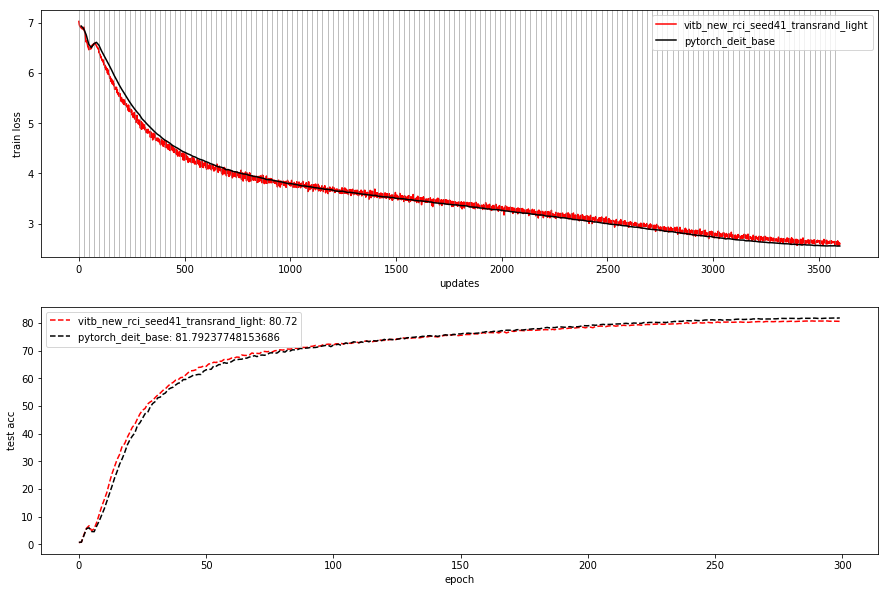

In [2220]:
jobs = [
    ('vitb_new_rci_seed41_transrand_light', 'r'),
] 
plot(jobs, 'vitb_repro')

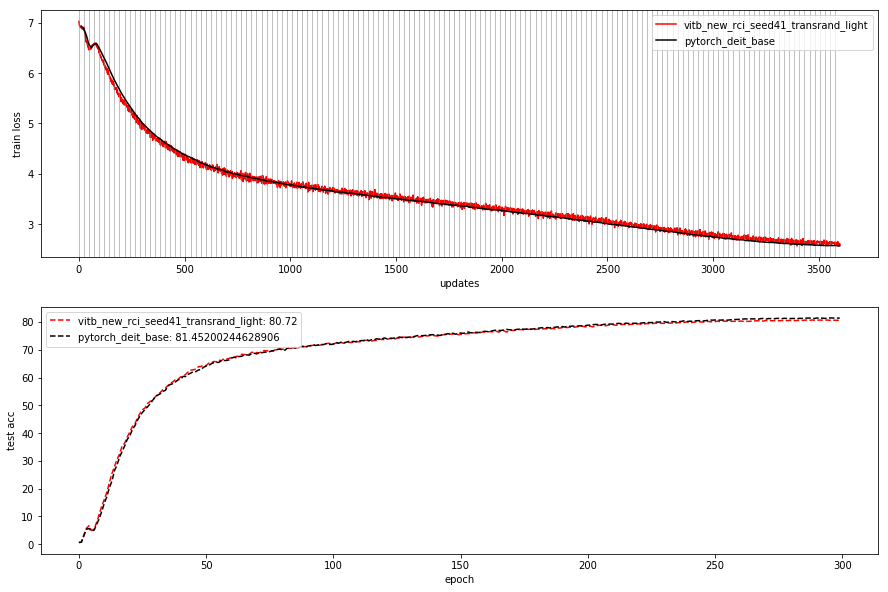

In [2059]:
jobs = [
    ('vitb_new_rci_seed41_transrand_light', 'r'),
] 
plot(jobs, 'vitb_diffseed')

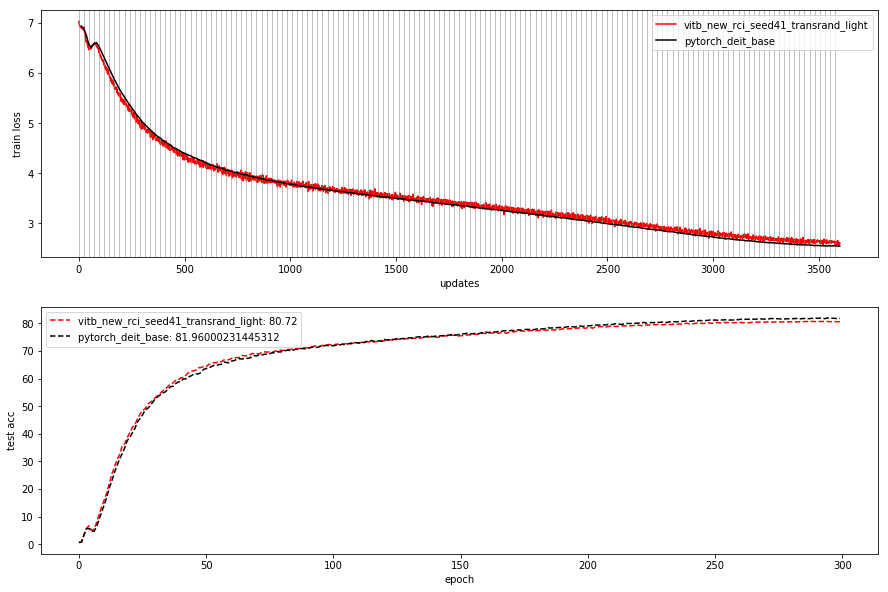

In [2060]:
jobs = [
    ('vitb_new_rci_seed41_transrand_light', 'r'),
] 
plot(jobs, 'vitb_diffseed1')

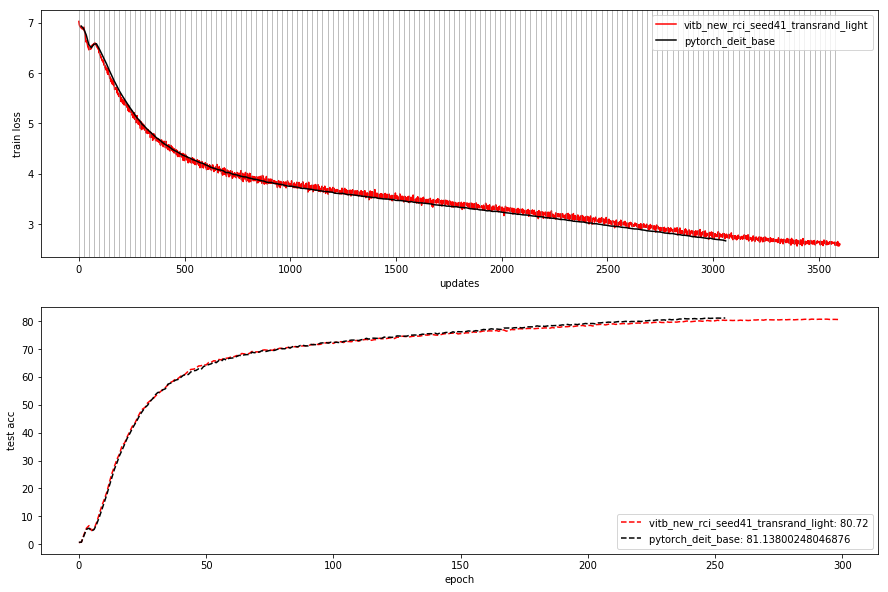

In [1933]:
jobs = [
    ('vitb_new_rci_seed41_transrand_light', 'r'),
] 
plot(jobs, 'vitb_diffseed2')

## ablation

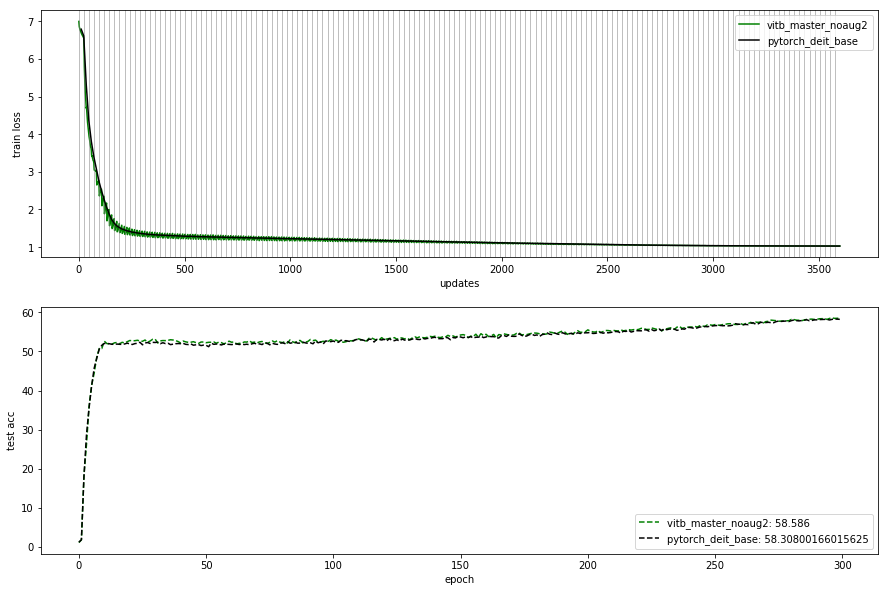

In [2019]:
jobs = [
#     ("vitb_bsz64_noaug", 'r'),
#     ("vitb_bsz64_noaug1", 'r'),
#     ("vitb_bsz64_noaug2", 'r'),
#     ("vitb_bsz64_noaug_ptinit", 'g'),
#     ("vitb_bsz64_noaug3", 'b'),
#     ("vitb_bsz64_noaug4", 'g'),
#     ("vitb_master_noaug", 'b'),
#     ("vitb_master_noaug1", 'b'),
    ("vitb_master_noaug2", 'g'),
] 
plot(jobs, 'noaug')

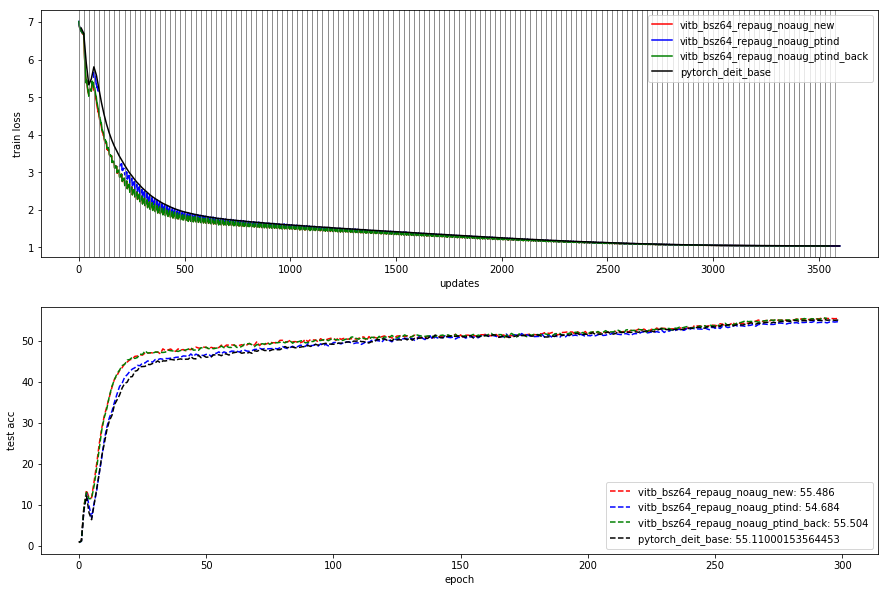

In [1822]:
jobs = [    
#     ("vitb_bsz64_repaug_noaug1", 'r'),
#     ("vitb_bsz64_repaug_noaug3", 'g'),
#     ("vitb_bsz64_repaug_noaug_ptinit", 'g'),
#     ("vitb_bsz64_repaug_noaug4", 'b'),
#     ("vitb_bsz64_repaug_noaug5", 'm'),
#     ("vitb_bsz64_repaug_noaug_new_ptinit", 'g'),
    
    ("vitb_bsz64_repaug_noaug_new", 'r'),
#     ("vitb_bsz64_repaug_noaug_new_shuffle1", 'c'),
#     ("vitb_bsz64_repaug_noaug_new_shuffle_scaleparam", 'b'),
#     ("vitb_bsz64_repaug_noaug_new_shuffle_scaleparam1", 'g'),
#     ("vitb_bsz64_repaug_noaug_new_shuffle_scaleparam2", 'm'),
#     ("vitb_bsz64_repaug_noaug_new_shuffle_scaleparam_limit", 'g'),
    ("vitb_bsz64_repaug_noaug_ptind", 'b'),
    ("vitb_bsz64_repaug_noaug_ptind_back", 'g'),
] 
plot(jobs, 'noaug+repaug')

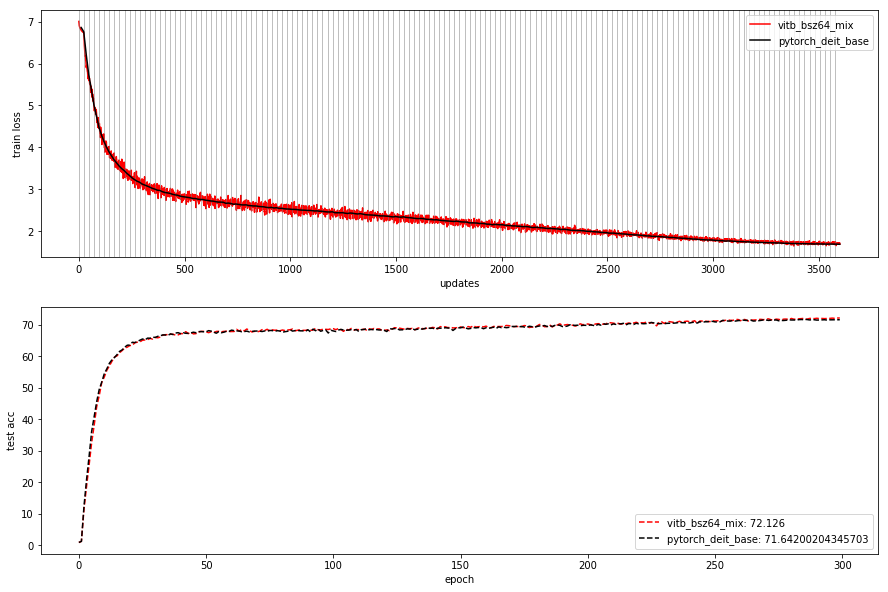

In [1823]:
jobs = [
    ("vitb_bsz64_mix", 'r'),
#     ("vitb_bsz64_mix_ptind", 'b'),
#     ("vitb_bsz64_mix_ptind_back", 'g')
] 
plot(jobs, 'noaug+mix')

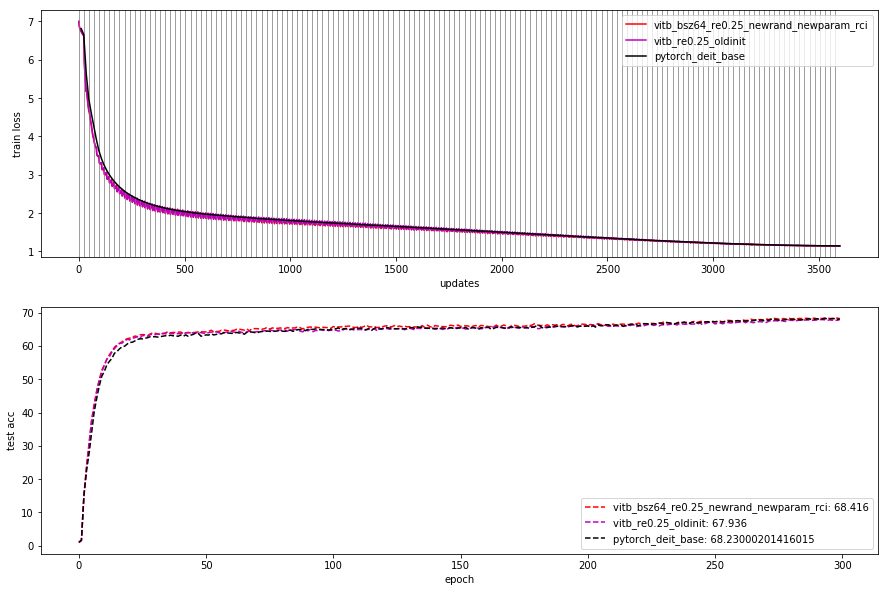

In [1526]:
jobs = [
#     ("vitb_bsz64_re0.25", 'r'),
#     ("vitb_bsz64_re0.25_newrand", 'b'),
#     ("vitb_bsz64_re0.25_newrand_newparam", 'g'),
    ("vitb_bsz64_re0.25_newrand_newparam_rci", 'r'),
#     ("vitb_re0.25", 'b'),
#     ("vitb_re0.25_1", 'g'),
    ("vitb_re0.25_oldinit", 'm'),
] 
plot(jobs, 'noaug+re')

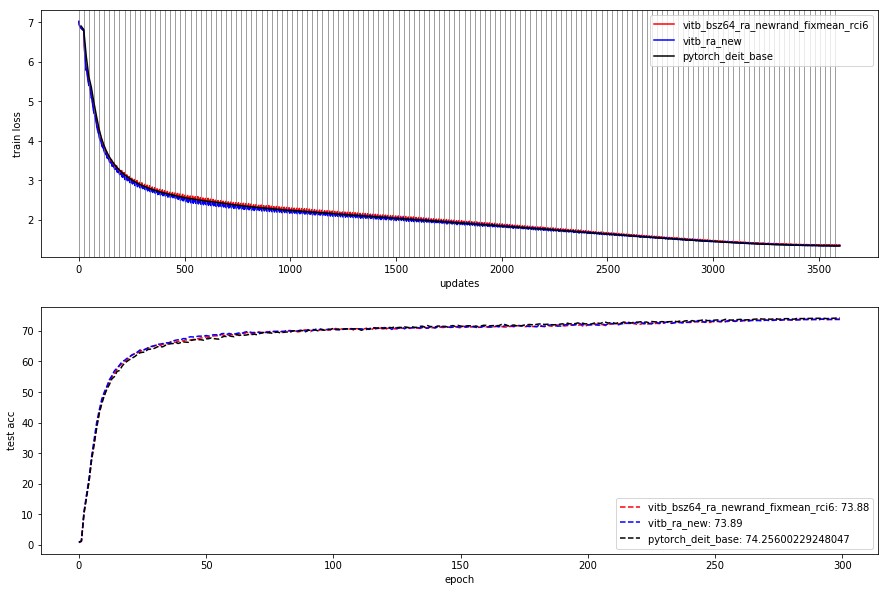

In [1533]:
jobs = [
#     ("vitb_bsz64_ra", 'r'),
#     ("vitb_bsz64_ra_newrand", 'b'),
#     ("vitb_bsz64_ra_newrand_fixmean", 'g'),
#     ("vitb_bsz64_ra_newrand_fixmean_rci", 'r'),
#     ("vitb_bsz64_ra_newrand_fixmean_rci1", 'r'),
#     ("vitb_bsz64_ra_newrand_fixmean_rci2", 'g'),
#     ("vitb_bsz64_ra_newrand_fixmean_rci3", 'b'),
#     ("vitb_bsz64_ra_newrand_fixmean_rci4", 'g'),
#     ("vitb_bsz64_ra_newrand_fixmean_rci5", 'c'),
    ("vitb_bsz64_ra_newrand_fixmean_rci6", 'r'),
#     ("vitb_ra", 'b'),
#     ("vitb_ra_1", 'g'),
#     ("vitb_ra_oldinit", 'c'),
    ("vitb_ra_new", 'b')
] 
plot(jobs, 'noaug+ra')

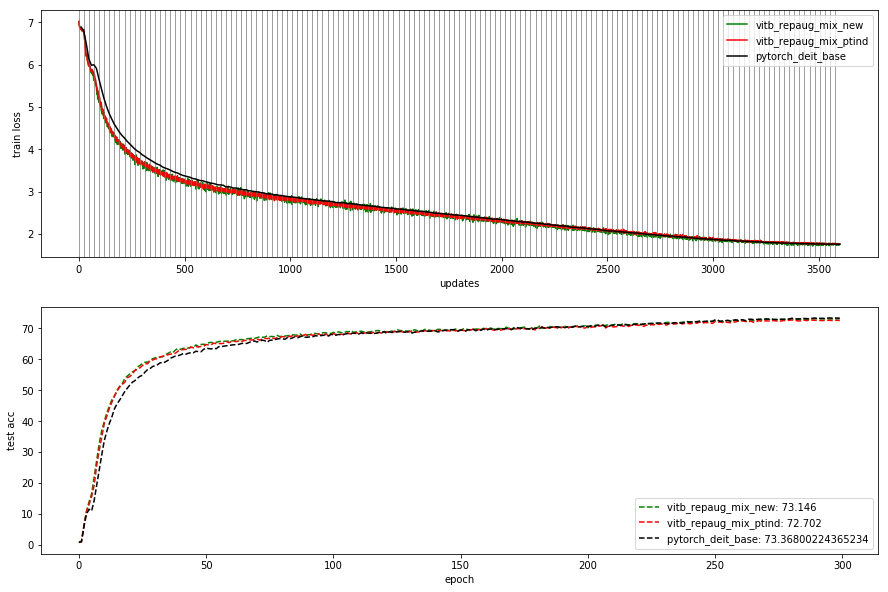

In [1824]:
jobs = [
#     ("vitb_bsz64_repaug_mix", 'r'),
#     ("vitb_bsz64_repaug_mix1", 'b'),
#     ("vitb_bsz64_repaug_mix3", 'r'),
#     ("vitb_bsz64_repaug_mix_ptinit", 'b'),
    ("vitb_repaug_mix_new", 'g'),
#     ("vitb_bsz64_mix", 'r'),
    ("vitb_repaug_mix_ptind", 'r'),

] 
plot(jobs, 'noaug+repaug+mix')

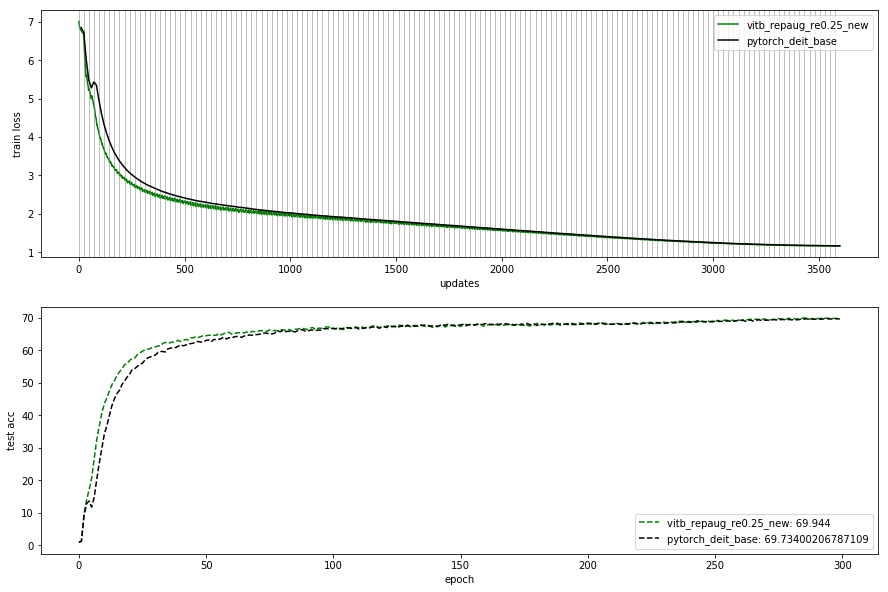

In [1492]:
jobs = [
#     ("vitb_bsz64_repaug_re0.25", 'r'),
#     ("vitb_bsz64_repaug_re0.25_ptinit", 'b'),
    ("vitb_repaug_re0.25_new", 'g'),
#     ("vitb_bsz64_re0.25_newrand_newparam_rci", 'r'),
] 
plot(jobs, 'noaug+repaug+re')

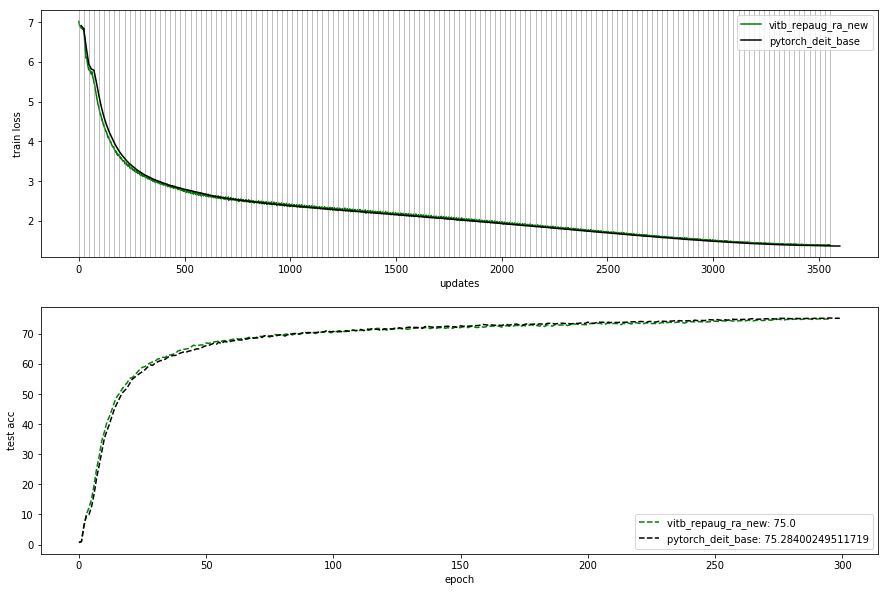

In [1493]:
jobs = [
#     ("vitb_bsz64_repaug_ra", 'r'),
#     ("vitb_bsz64_repaug_ra2x0.8", 'm'),
#     ("vitb_bsz64_repaug_ra1", 'b'),
    
#     ("vitb_bsz64_repaug_ra2", 'b'),
# #     ("vitb_bsz64_repaug_ra3", 'g'),
#     ("vitb_bsz64_repaug_ra4", 'c'),
#     ("vitb_bsz64_repaug_ra5", 'm'),
#     ("vitb_bsz64_repaug_ra6", 'g'),
#     ("vitb_bsz64_repaug_ra7", 'r'),
#     ("vitb_bsz64_repaug_ra_ptinit", 'b'),
    ("vitb_repaug_ra_new", 'g'),
#     ("vitb_bsz64_ra_newrand_fixmean_rci6", 'r'),

] 
plot(jobs, 'noaug+repaug+ra')

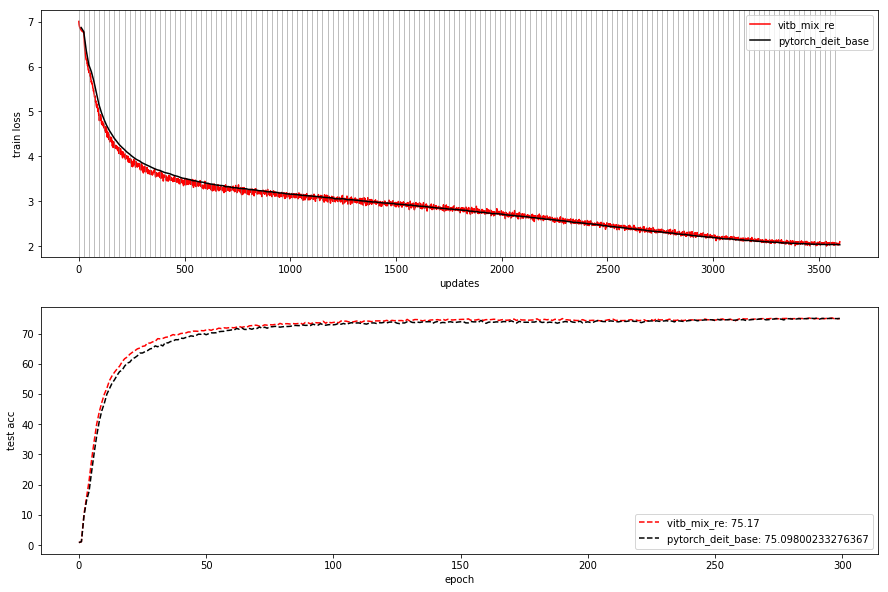

In [1494]:
jobs = [
    ("vitb_mix_re", 'r'),
] 
plot(jobs, 'noaug+mix+re')

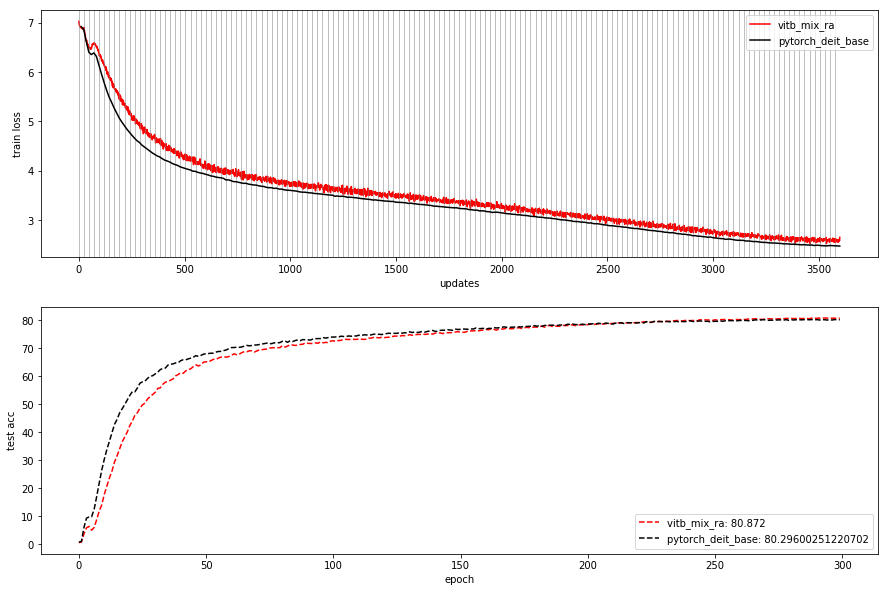

In [1755]:
jobs = [
    ("vitb_mix_ra", 'r'),
#     ("vitb_mix_ra_light", 'b'),
#     ("vitb_mix_ra_back", 'g'),
] 
plot(jobs, 'noaug+mix+ra')

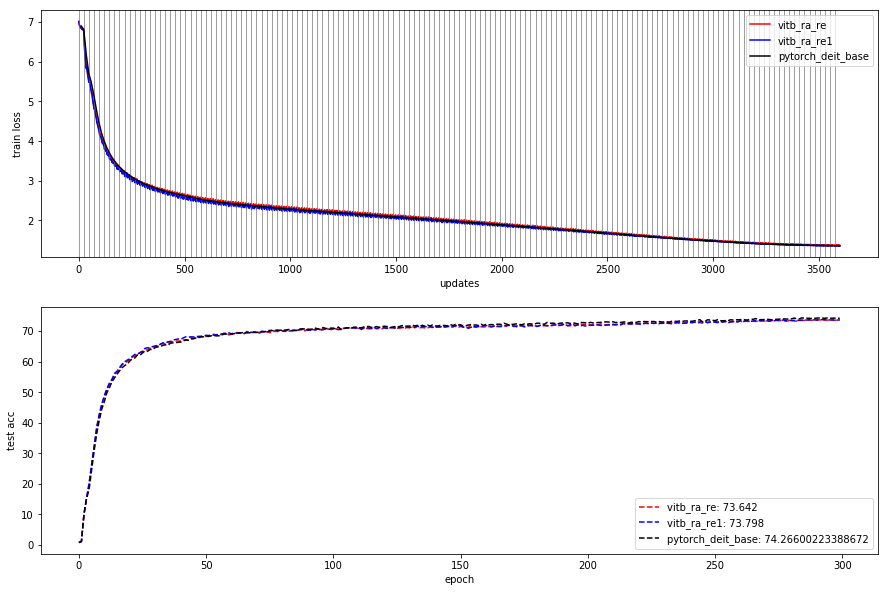

In [1592]:
jobs = [
    ("vitb_ra_re", 'r'),
    ("vitb_ra_re1", 'b'),
] 
plot(jobs, 'noaug+re+ra')

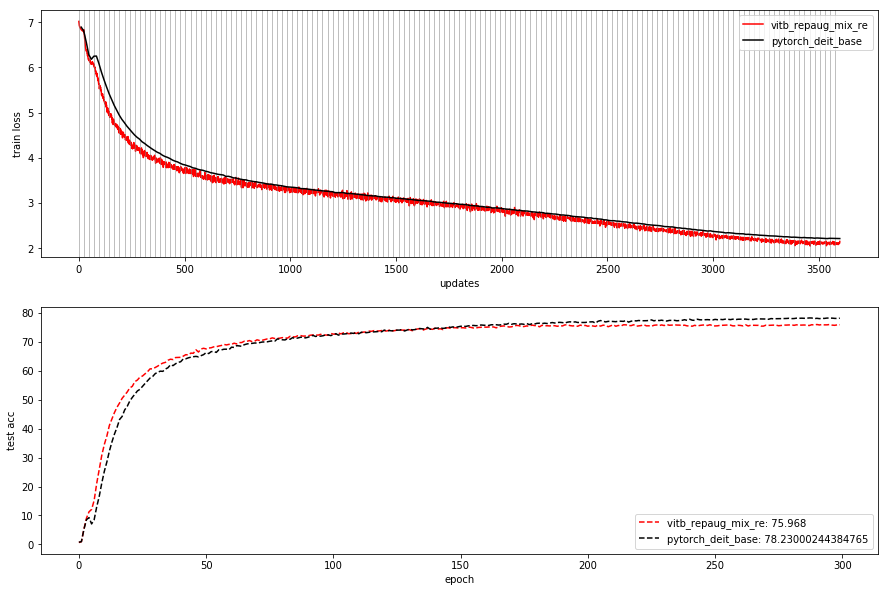

In [1497]:
jobs = [
    ("vitb_repaug_mix_re", 'r'),
] 
plot(jobs, 'noaug+repaug+mix+re')

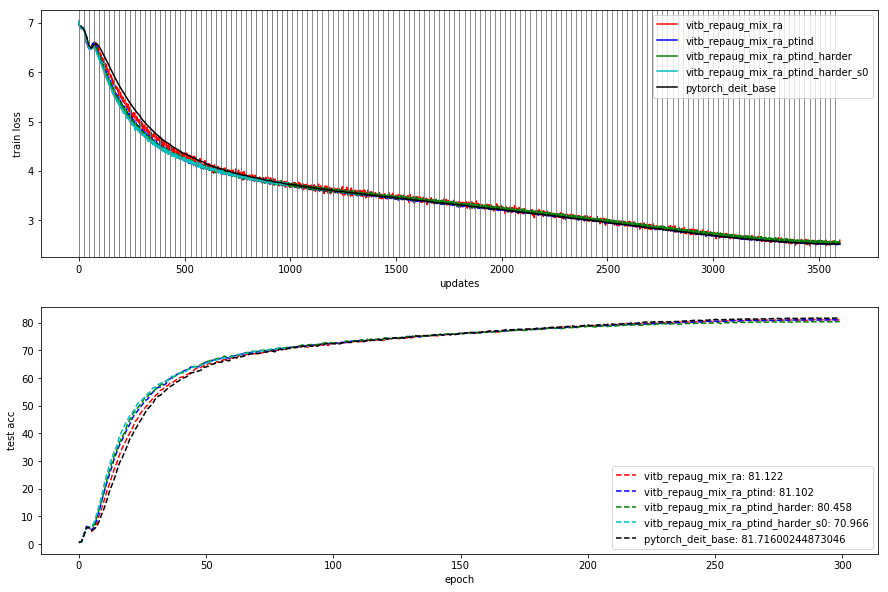

In [1825]:
jobs = [
    ("vitb_repaug_mix_ra", 'r'),
#     ("vitb_repaug_mix_ra_new", 'm'),
#     ("vitb_repaug_mix_ra_new1", 'c'),
    ("vitb_repaug_mix_ra_ptind", 'b'),
    ("vitb_repaug_mix_ra_ptind_harder", 'g'),
    ("vitb_repaug_mix_ra_ptind_harder_s0", 'c'),
] 
plot(jobs, 'noaug+repaug+mix+ra')

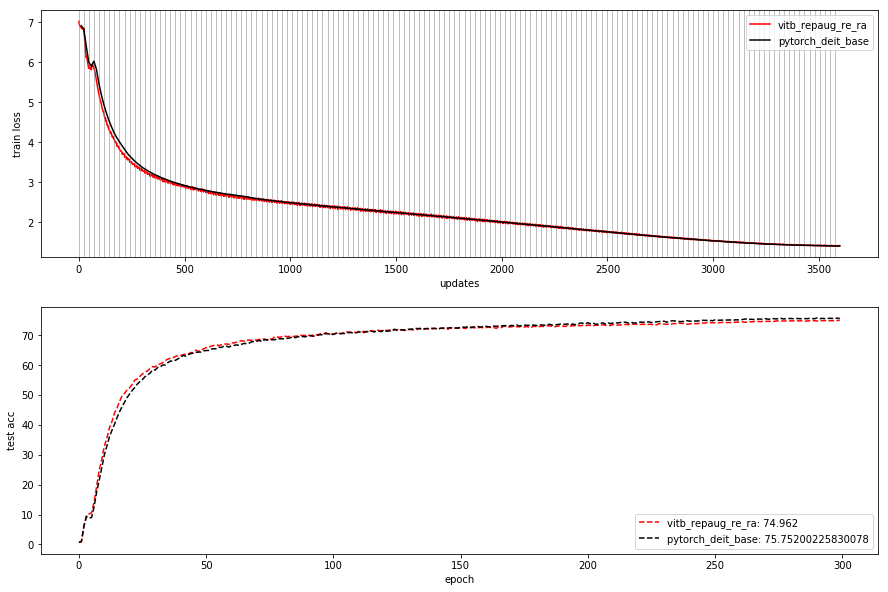

In [1499]:
jobs = [
    ("vitb_repaug_re_ra", 'r'),
] 
plot(jobs, 'noaug+repaug+re+ra')

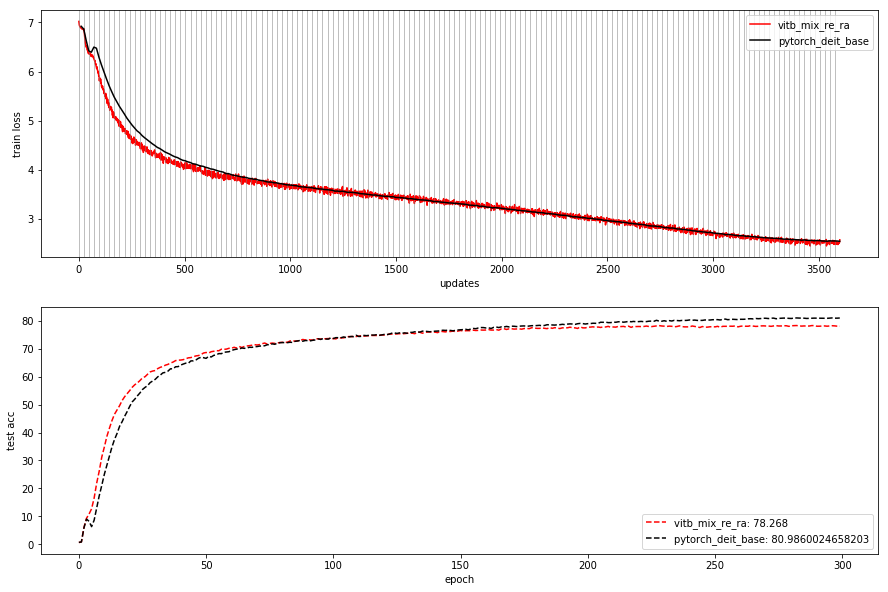

In [1500]:
jobs = [
    ("vitb_mix_re_ra", 'r'),
] 
plot(jobs, 'noaug+mix+re+ra')

In [284]:
!wc -l /private/home/qiantong/tmp/log

10563 /private/home/qiantong/tmp/log


In [290]:
c1 = 0
c0 = 0
with open('/private/home/qiantong/tmp/log') as f:
    for line in f:
        for c in line.strip():
            if c == '0':
                c0 += 1
            elif c == '1':
                c1 += 1
            else:
                print(line)
                print('wtf')
                
print(c0)       
print(c1)       
print(float(c0)/(c0 + c1))

5568
1841
0.7515184235389392


In [324]:
indices = [ele for ele in range(5) for i in range(3)]
print(indices)

[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]


In [325]:
a = indices[1:15:2]
print(a)

[0, 1, 1, 2, 3, 3, 4]


In [675]:
data = []
with open('/private/home/qiantong/tmp/log') as f:
    for line in f:
        data.append(float(line.strip()))

(array([2064., 1994., 2005., ..., 1998., 1943., 1966.]),
 array([3.70000000e+01, 4.29533598e+05, 8.59030195e+05, ...,
        2.14662403e+09, 2.14705353e+09, 2.14748302e+09]),
 <a list of 5000 Patch objects>)

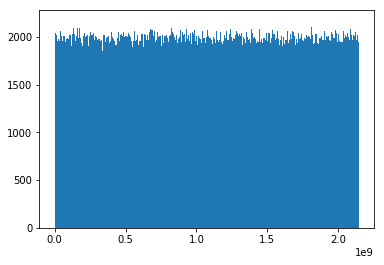

In [676]:
plt.hist(data, bins=5000)

In [677]:
print(min(data))
print(max(data))


37.0
2147483025.0


In [715]:
x = []
y = []
maskx = []
masky = []

with open('/private/home/qiantong/tmp/log_re') as f:
    for line in f:
        sp = line.strip().split()
        x.append(int(sp[0]))
        y.append(int(sp[1]))
        maskx.append(int(sp[2]))
        masky.append(int(sp[3]))

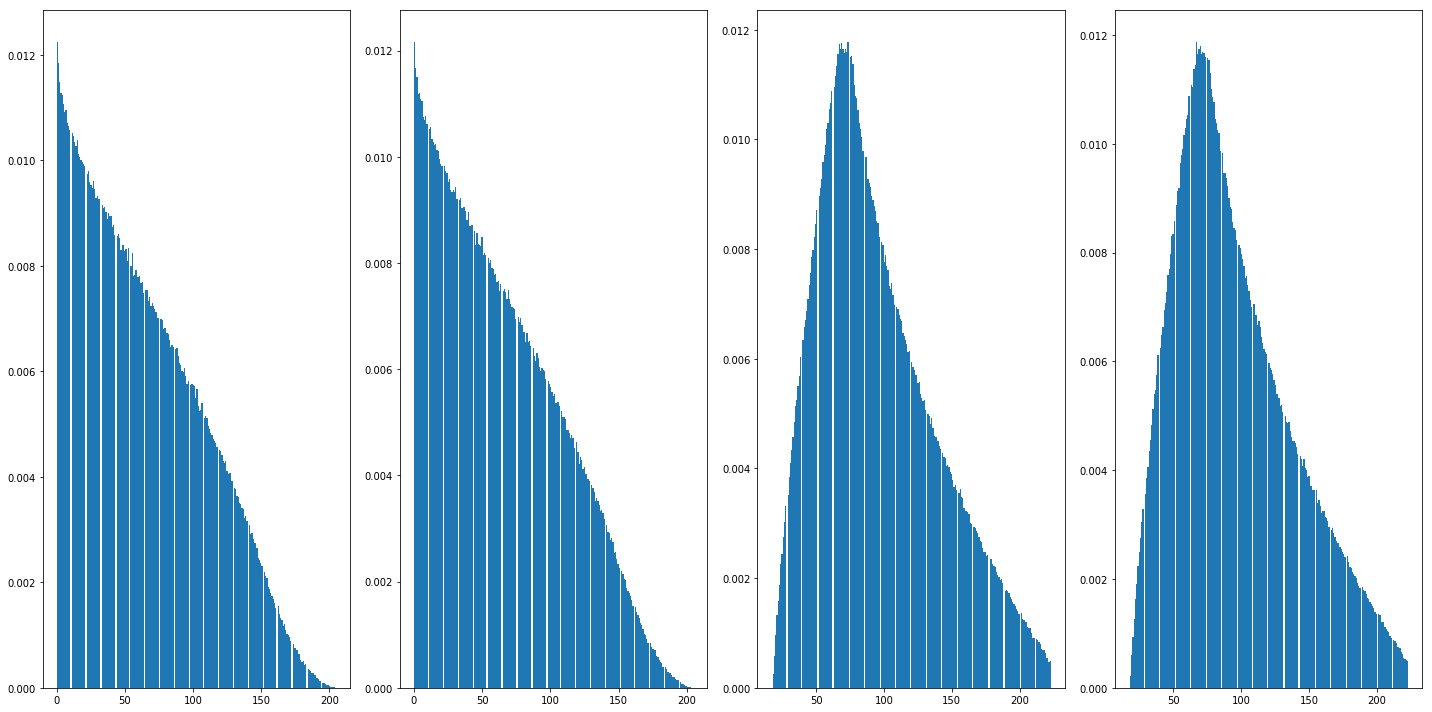

In [716]:
fig, axs = plt.subplots(1, 4, sharey=False, tight_layout=True, figsize=(20,10))

for i, data in enumerate([x, y, maskx, masky]):
    axs[i].hist(data, 224, alpha=1, normed=True)
#     plt.legend()

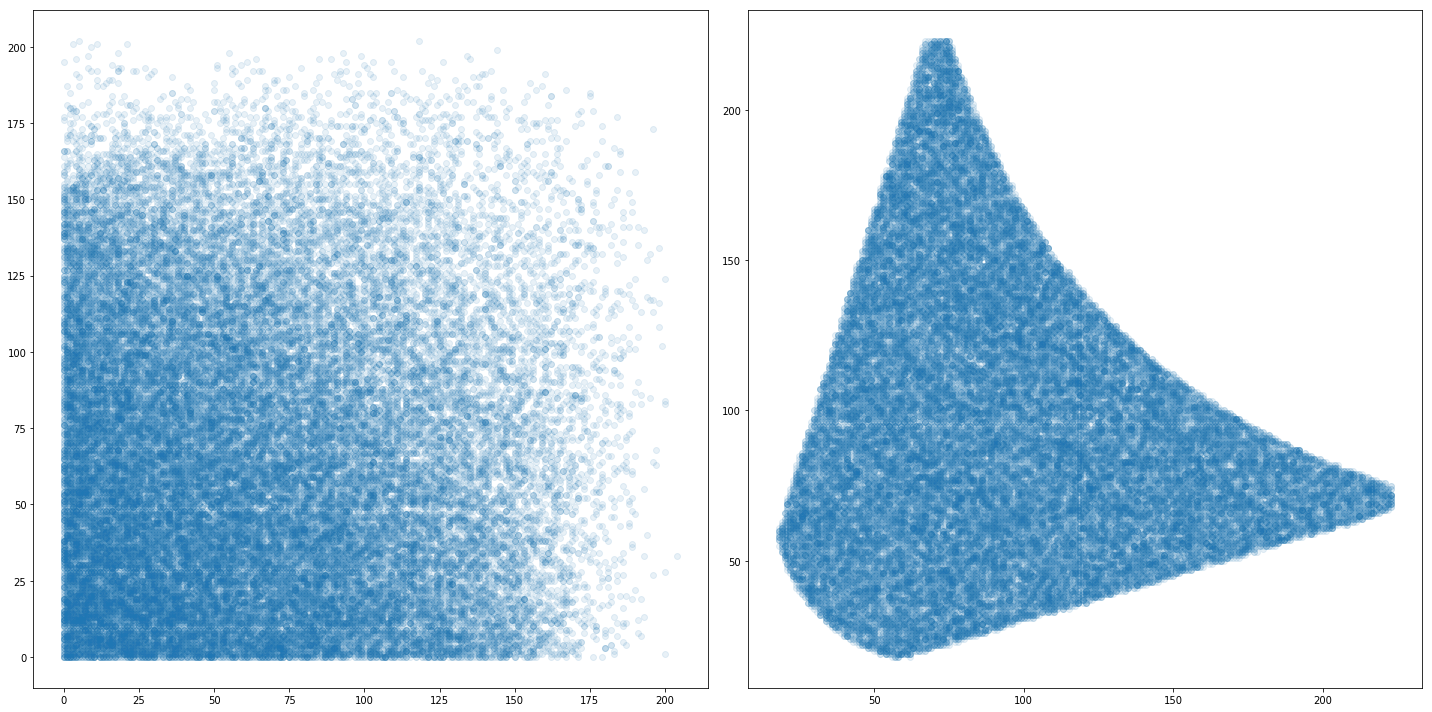

In [718]:
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True, figsize=(20,10))

ntop = 50000
axs[0].scatter(x[:ntop], y[:ntop], alpha=0.1)
axs[1].scatter(maskx[:ntop], masky[:ntop], alpha=0.1)

In [1004]:
import math

epoch = 98

lr = 1e-5 + 0.5 * (1e-3 - 1e-5) * (math.cos(epoch / 300 * math.pi) + 1)
print(lr)

0.0007614233696396995


(array([1.01800468, 0.95400439, 0.96100442, 0.99500458, 0.9780045 ,
        1.0010046 , 0.97500449, 0.96800445, 1.02800473, 1.0430048 ,
        1.02400471, 0.96400443, 1.03200475, 1.04500481, 0.9780045 ,
        0.99500458, 0.98200452, 1.04700482, 0.99400457, 0.95500439,
        1.03100474, 1.02400471, 1.01500467, 1.0430048 , 0.98500453,
        1.01300466, 1.0000046 , 0.96700445, 0.98300452, 1.00700463,
        0.97200447, 1.02000469, 1.06300489, 1.00600463, 0.99400457,
        0.95800441, 0.99400457, 0.90300415, 1.02700472, 1.09100502,
        1.03600477, 0.98900455, 0.95800441, 0.9560044 , 1.01500467,
        1.01600467, 0.95500439, 0.99400457, 0.99300457, 0.94700436,
        1.01600467, 1.07500495, 1.02500472, 1.03100474, 1.01400466,
        1.01500467, 1.00200461, 0.99100456, 1.00500462, 1.01500467,
        0.96200443, 0.99800459, 1.02400471, 0.96800445, 0.99000455,
        0.97600449, 0.96200443, 1.02300471, 1.05700486, 0.9790045 ,
        0.97300448, 1.01200466, 1.00900464, 0.98

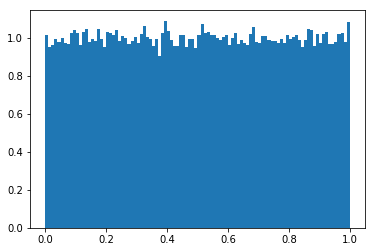

In [1919]:
data = []

with open('/private/home/qiantong/tmp/a.log') as f:
    for line in f:
        data.append(float(line.strip()))
        
plt.hist(data, 100, alpha=1, normed=True)

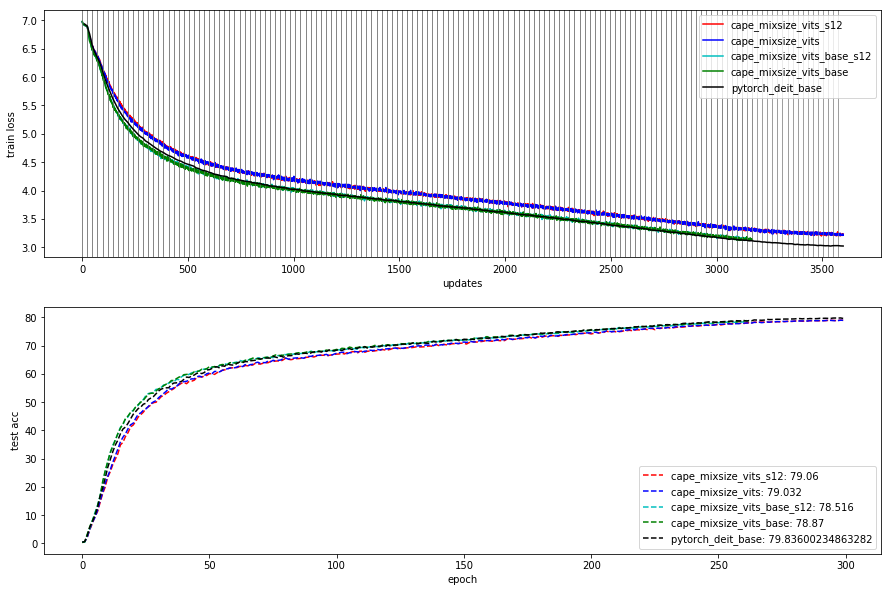

In [2252]:
jobs = [
    ("cape_mixsize_vits_s12", 'r'),
    ("cape_mixsize_vits", 'b'),
    ("cape_mixsize_vits_base_s12", 'c'),
    ("cape_mixsize_vits_base", 'g'),
] 
plot(jobs, 'vits')

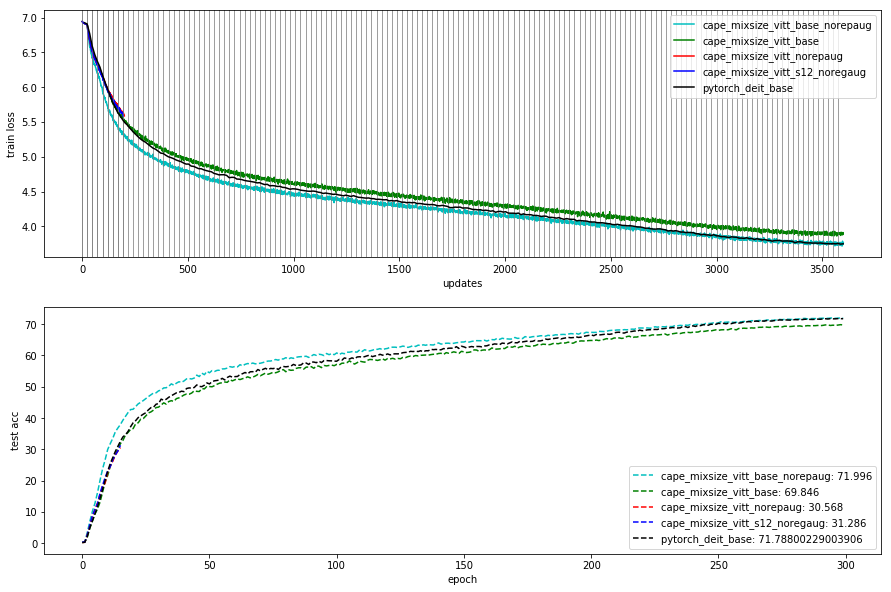

In [2255]:
jobs = [
#     ("cape_mixsize_vitt_s12", 'r'),
#     ("cape_mixsize_vitt", 'b'),
    ("cape_mixsize_vitt_base_norepaug", 'c'),
    ("cape_mixsize_vitt_base", 'g'),
    
    ("cape_mixsize_vitt_norepaug", 'r'),
    ("cape_mixsize_vitt_s12_noregaug", 'b'),
] 
plot(jobs, 'vitt')

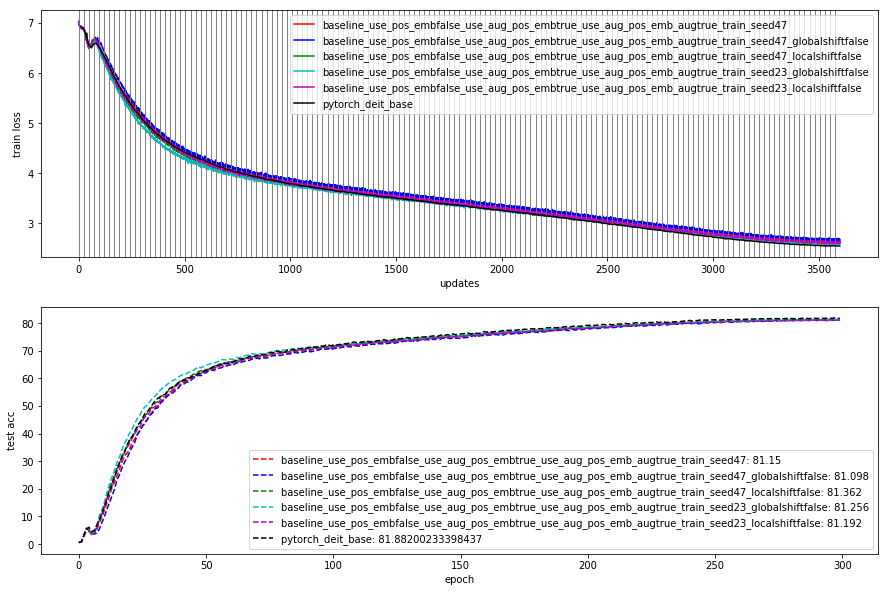

In [2275]:
jobs = [
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed47", 'r'),
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed47_globalshiftfalse", 'b'),
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed47_localshiftfalse", 'g'),
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed23_globalshiftfalse", 'c'),
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed23_localshiftfalse", 'm'),
] 
plot(jobs, 'vitb')

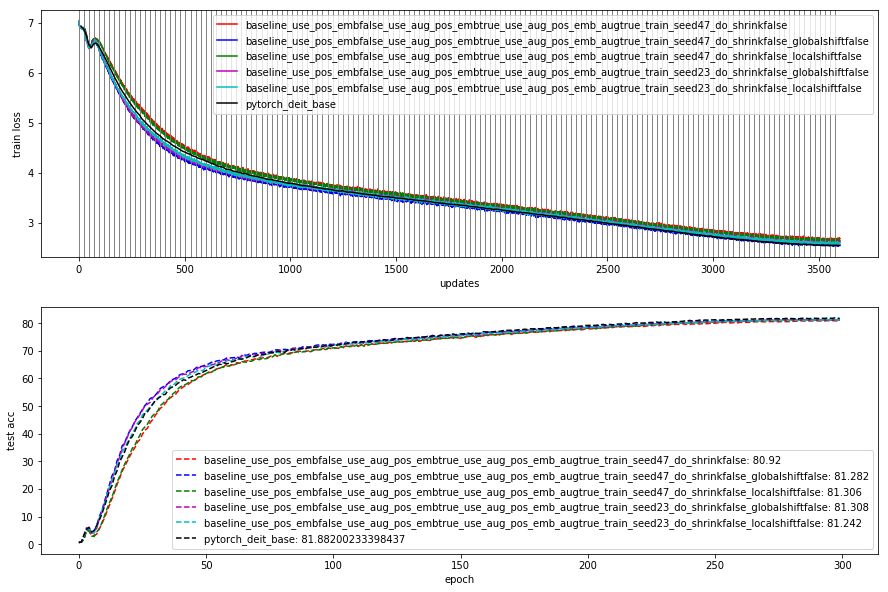

In [2276]:
jobs = [
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed47_do_shrinkfalse", 'r'),
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed47_do_shrinkfalse_globalshiftfalse", 'b'),
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed47_do_shrinkfalse_localshiftfalse", 'g'),
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed23_do_shrinkfalse_globalshiftfalse", 'm'),
    ("baseline_use_pos_embfalse_use_aug_pos_embtrue_use_aug_pos_emb_augtrue_train_seed23_do_shrinkfalse_localshiftfalse", 'c'),
] 
plot(jobs, 'vitb')

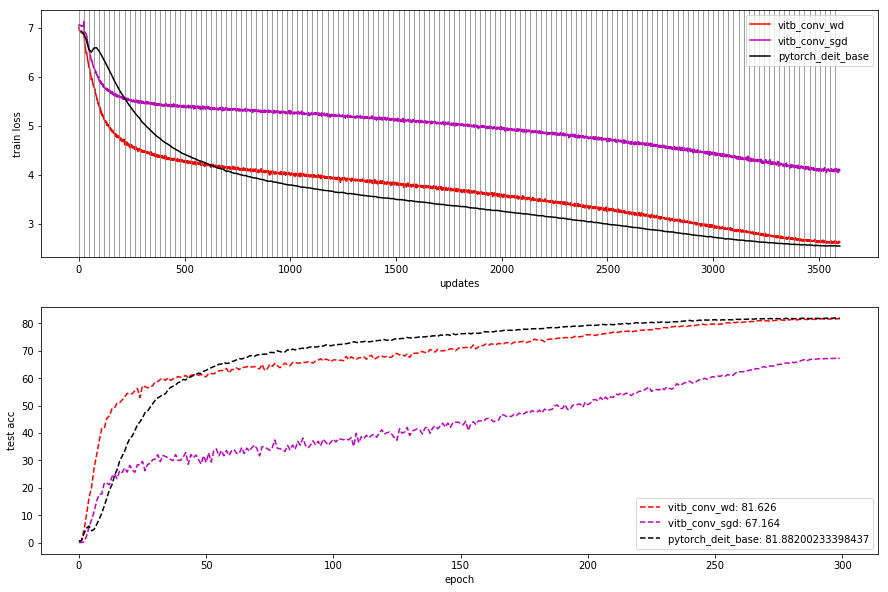

In [2302]:
jobs = [
#     ("vitb_conv", 'r'),
#     ("vitb_conv_wd0.1", 'c'),
    ("vitb_conv_wd", 'r'),
#     ("vitb_conv_wd_e400", 'g'),
#     ("vitb_conv_wd_e400_n4", 'b'),
    ("vitb_conv_sgd", 'm'),
]
plot(jobs, 'vitb')